##UPLOAD -> An Image Containing Handwritings

In [ ]:
# Run on colab
paragraph_data = {
    '3': [(0,2),(3,9),(10,20),(21,28)],
    '4':[(0,31)],
    '5':[(0,14),(15,21),(22,30)],
    '6':[(0,28)],
    '7':[(0,26)],
    '8':[(0,27)],
    '9': [(0,27)],
    '10': [(0,5),(6,11),(12,24)],
    '11': [(0,25)],
    '12': [(0,25)],
    '13':[(0,26)],
    '14': [(0,12),(13,15),(16,23)],
    '15': [(0,23)],
    '16': [(0,2),(3,28)],
    '17': [(0,6),(7,10),(11,27)],
    '18': [(0,2),(3,6),(7,16),(17,19),(20,28)],
    '19': [(0,26)],
    '20': [(0,2),(3,8),(9,28)],
    '21': [(0,8),(9,12),(13,26)],
    '22': [(0,21),(22,25)],
    '23': [(0,11),(12,26)],
    '24': [(0,8),(9,12),(13,25)],
    '25': [(0,25)],
    '26': [(0,9),(10,12),(13,24)],
    '27': [(0,16),(17,24)],
    '28': [(0,7),(8,24)]
}
key = 28
import pickle

**Upload a single document image** from your device after running this cell. The image should contain handwritten lines and words which will be segmented and shown in the following cells...

In [ ]:
#select image from bw_imgs_init/
import os
from google.colab import files
from google.colab.patches import cv2_imshow
path15 = "/content/1_1.jpg"
if os.path.exists(path15) == True:
  !rm 1_1.jpg

uploaded_image = files.upload()

Saving 28.jpg to 28.jpg


In [ ]:
import pickle
with open('sample_data/ref_map.pkl', 'rb') as file:
      ref_map = pickle.load(file)

In [ ]:
line_length_data = {}

for k in range(3,30):
  for i in range(len(ref_map[k])):
    len_ = len(ref_map[k])
    if ref_map[k][i] == '':
      ref_map[k][i-1] = ref_map[k][i-1]+"#@"

    if i == len_ - 1:
      ref_map[k][i] = ref_map[k][i]+"#@"

  while '' in ref_map[k]:
    ref_map[k].remove('')

for k in range(3,30):
  line_length_data[k] = []

for k in range(3,30):
  temp1 = ref_map[k]
  lengths = []
  for t in temp1:
    x = t.replace('#@','')
    lengths.append(len(x))

  l = max(lengths)

  for i in range(len(temp1)):
    x = temp1[i].replace('#@','')
    l1 = len(x)
    if "#@" in temp1[i] and l1<0.8*l:
      line_length_data[k].append(l1/l)
    else:
      line_length_data[k].append(-1)



In [ ]:
"""
func(pts, mean, outliers, diff)
	add = []
	sub = []
	for o in outliers
		if dist>mean
			add.append((o,ceil(dist/mean))

		elif dist<mean:
			sub.append(o)


flag = 1
	if add
		for i in len(add)
			if lower_bound == i


				create pt dist/mean times each seperated by mean


	if sub

		for i in len(sub)
			if upper_bound == i
				remove that line

"""

'\nfunc(pts, mean, outliers, diff)\n\tadd = []\n\tsub = []\n\tfor o in outliers\n\t\tif dist>mean\n\t\t\tadd.append((o,ceil(dist/mean))\n\n\t\telif dist<mean:\n\t\t\tsub.append(o)\n\n\nflag = 1\n\tif add\n\t\tfor i in len(add)\n\t\t\tif lower_bound == i\n\n\n\t\t\t\tcreate pt dist/mean times each seperated by mean\n\n\n\tif sub\n\n\t\tfor i in len(sub)\n\t\t\tif upper_bound == i\n\t\t\t\tremove that line\n\n'

In [ ]:
img = list(uploaded_image.keys())
given_img_lbl = str(img[0])
img1 = '1_1.jpg'

old_name = '/content/'+ given_img_lbl
new_name = "/content/" + img1
os.rename(old_name, new_name)

img2 = '/content/'+img1
print("Image path: ",img2)

Image path:  /content/1_1.jpg


#**Defining Functions, Importing Libraries, Deleting Directory Contents**

##Importing necessary libraries...

In [ ]:
from os.path import join
import numpy as np
import operator
import cv2
import fnmatch
import matplotlib.pyplot as plt
import PIL
from PIL import Image
import glob
import imutils
from math import *
from scipy.stats import mode
from distutils.dir_util import copy_tree
from IPython.display import Image
from google.colab.patches import cv2_imshow
import PIL.Image
import os.path
import shutil

##Removing previous files and folders from their directories in New run...

In [ ]:
# Removing previous files and folders from their directories....
x = os.listdir("/content")
for i in x:
  if i.endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif', 'JPG', 'JPEG', 'PNG')) == True:
    img_label = i.split('.')[0]
    final_path = "/content/"+img_label
    if os.path.exists(final_path) == True:
      shutil.rmtree(final_path)
      # temp = "/content/"+i
      # os.remove(temp)

for j in x:
  if j.endswith('.zip') == True:
    !rm -rf /content/final_results.zip

path1 = "/content/DSkew"
if os.path.exists(path1) == True:
  shutil.rmtree(path1)
path2 = "/content/HaughLine_Affine"
if os.path.exists(path2) == True:
  shutil.rmtree(path2)
path3 = "/content/Rotated_line_by_HaughLine_Affine"
if os.path.exists(path3) == True:
  shutil.rmtree(path3)
path4 = "/content/final_line_segmentation"
if os.path.exists(path4) == True:
  shutil.rmtree(path4)
path5 = "/content/final_word_segmentation"
if os.path.exists(path5) == True:
  shutil.rmtree(path5)
path6 = "/content/initial_line_segmantation"
if os.path.exists(path6) == True:
  shutil.rmtree(path6)
path7 = "/content/sorted_Word_detection"
if os.path.exists(path7) == True:
  shutil.rmtree(path7)
path8 = "/content/sorted_line_after_1st_detection"
if os.path.exists(path8) == True:
  shutil.rmtree(path8)
path9 = "/content/yolov5/runs"
if os.path.exists(path9) == True:
  shutil.rmtree(path9)
path11 = "/content/2nd line detection for rotated images"
if os.path.exists(path11) == True:
  shutil.rmtree(path11)
path12 = "/content/2nd line detection for rotated images (labels)"
if os.path.exists(path12) == True:
  shutil.rmtree(path12)
path13 = "/content/Original line images"
if os.path.exists(path13) == True:
  shutil.rmtree(path13)
path14 = "/content/model"
if os.path.exists(path14) != True:
  '''Downloading the model into CoLab temporary directory'''
  !mkdir /content/model
  !wget -P /content/model/ 'https://huggingface.co/crusnic/BN-DRISHTI/resolve/main/models/line_model_best.pt'
  !wget -P /content/model/ 'https://huggingface.co/crusnic/BN-DRISHTI/resolve/main/models/word_model_best.pt'

##YoloV5 Setup...

In [ ]:
path = "/content/yolov5"
if os.path.exists(path) == False:
  !git clone https://github.com/ultralytics/yolov5  # clone repo
  %cd yolov5
  %pip install -qr requirements.txt  # install dependencies

  import torch
  from IPython.display import Image, clear_output  # to display images

  clear_output()
  print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

  %cd /content/
else:
  print("Yolo requirements are already exists!")


Yolo requirements are already exists!


##Unzipping files...

Defining a function to copy the dataset into colab local directory (for faster execution).

In [ ]:
def file_unzip(zip_file):
  !unzip $zip_file -d "/content"

##Sort line name of given list...

Defining a function to sort a list containing the name of images to visualize them serially.

In [ ]:
def line_sort(lines):
    sort_lines = {}
    for line in lines:
        img_lb = line.split('.')[0]
        lb = [int(i) for i in img_lb.split('_')]
        new_lb = [ '0'+str(r) if r<10 else str(r) for r in lb]
        if len(new_lb)==3:
            items = int(new_lb[0]+new_lb[1]+new_lb[2])
        if len(new_lb)==4:
            items = int(new_lb[0]+new_lb[1]+new_lb[2]+new_lb[3])
        sort_lines[items] = line
    # print(sort_lines)
    sort_lines = dict(sorted(sort_lines.items()))
    new_lines = list(sort_lines.values())
    return new_lines

##Showing All Transitions...

Defining a function to draw images by iteration of a given directory.

In [ ]:
def show_transitions(f_name):
  filename = f_name
  crop_line = os.listdir(filename)
  crop_lines = line_sort(crop_line)
  print(crop_lines)
  j = 1
  for i in crop_lines:
    print("Line no:",j)
    print("Image name:: ",i)
    im = filename + "/" + i
    crop_img = cv2.imread(im)

    width = crop_img.shape[1]
    height = crop_img.shape[0]
    print("Width, height: ",width, height)

    plot_fig(crop_img)
    j = j + 1

Defining a function to plot figures.

In [ ]:
def plot_fig(img, size = 15):
  plt.figure(figsize=(size, size))
  plt.imshow(imutils.opencv2matplotlib(img))
  plt.show()

Defining a function to visually compare results of annotations and predictions of each line image by plotting them one after another.

In [ ]:

# def show_transitions_by_comparing(filename, gt_source_path, name1, name2):
def show_transitions_by_comparing(filename, name2):
    crop_line = os.listdir(filename)
    crop_lines = line_sort(crop_line)
    print("Cropped Line images: ",crop_lines)
    print()
    j = 1
    for i in crop_lines:
      print("Line no:",j)
      print("Image name:: ",i)
      im = filename + "/" + i
      crop_img = cv2.imread(im)

      width = crop_img.shape[1]
      height = crop_img.shape[0]

      # # print("Annotated Line or GroundTruth ->")
      # print(name1)
      # # img_gd = gt_line_img_dir + i
      # img_gd = gt_source_path + i
      # img_gd1 = cv2.imread(img_gd)
      # plot_fig(img_gd1)

      # print("Predicted Line ->")
      print(name2)
      plot_fig(crop_img)
      print()
      j = j + 1

In [ ]:
def show_transitions_by_comparing_1(filename, gt_source_path, name1, name2):
    crop_line = os.listdir(filename)
    crop_lines = line_sort(crop_line)
    print("Cropped Line images: ",crop_lines)
    print()
    j = 1
    for i in crop_lines:
      print("Line no:",j)
      print("Image name:: ",i)
      im = filename + "/" + i
      crop_img = cv2.imread(im)

      width = crop_img.shape[1]
      height = crop_img.shape[0]

      # print("Annotated Line or GroundTruth ->")
      print(name1)
      # img_gd = gt_line_img_dir + i
      img_gd = gt_source_path + i
      img_gd1 = cv2.imread(img_gd)
      plot_fig(img_gd1)

      # print("Predicted Line ->")
      print(name2)
      plot_fig(crop_img)
      print()
      j = j + 1

##Drawing bounding box...

Defining a function to draw bounding boxes on images with their given labels.

In [ ]:
"""
def draw_BB(img_path, label_path, flag):
  img = cv2.imread(img_path)
  dh, dw, _ = img.shape

  lb = open(label_path, 'r')
  data = lb.readlines()
  lb.close()

  for dt in data:
    if flag == 0:
      _, x, y, w, h = map(float, dt.split(' '))
    else:
      _, x, y, w, h, conf = map(float, dt.split(' '))
    l = int((x - w / 2) * dw)
    r = int((x + w / 2) * dw)
    t = int((y - h / 2) * dh)
    b = int((y + h / 2) * dh)
    if flag == 0:
      cv2.rectangle(img, (l, t), (r, b), (0, 250, 0), 2)
    else:
      cv2.rectangle(img, (l, t), (r, b), (0, 0, 250), 2)

  # plot_fig(img)
  return img
"""



import cv2

import numpy as np

def find_outliers(data, m):
    # Calculate the first and third quartiles (Q1 and Q3)
    mean = sum(data)//len(data)
    q1, q3 = np.percentile(data, [25, 75])

    # Calculate the interquartile range (IQR)
    iqr = q3 - q1

    # Define the lower and upper bounds for outliers
    lower_bound = q1 - m * iqr
    upper_bound = q3 + m * iqr

    # Identify outliers
    outlier_indexes = [i for i, value in enumerate(data) if value < lower_bound or value > upper_bound]
    non_outlier_indexes = [i for i, value in enumerate(data) if i not in outlier_indexes]
    #outliers = [value for value in data if value < lower_bound or value > upper_bound]

    return outlier_indexes, non_outlier_indexes


"""
func(pts, mean, outliers, diff)
	add = []
	sub = []
	for o in outliers
		if dist>mean
			add.append((o,ceil(dist/mean))

		elif dist<mean:
			sub.append(o)



	if add
		for i in len(add)
			if lower_bound == i


				create pt dist/mean times each seperated by mean


	if sub

		for i in len(sub)
			if upper_bound == i
				remove that line

"""
line_data = line_length_data[key]
import math
def fix(pts, mean, outliers, n, add_flag):
  max_r = 0
  for p in pts:
    r = p['og-coords'][-1][0]
    if r>max_r:
      max_r = r

  print('MAX_R', max_r)
  add = []
  sub = []

  for o in outliers:
    if o[0]>mean:
      add.append([o,o[0]//mean])

    elif o[0]<mean:
      sub.append(o)


  """
  t1 = len(add)
  t2 = len(sub)
  t3 = t1 - t2
  err_factor = diff_ - t3
  distribution = err_factor//t1

  for i in range(len(add)):
    add[i][-1]-=distribution
  """
  print('LOOOK AT ADD', add)
  print('LOOOK AT SUB', sub)

  if len(sub)>0:
    for s in sub:
      for i in range(len(pts)):
        if i == s[2]:
          pts.pop(i)
          if len(add)>0:
            for j in range(len(add)):
              if add[j][0][-1]>j:
                add[j][0][1]-=1
                add[j][0][-1]-=1
          break
  new_diff = n - len(pts)

  print('NEW DIFF', new_diff)
  final_pts = []
  if len(add)>0 and new_diff>0:
    min_ = min(len(add),new_diff)
    add = sorted(add, key=lambda x: x[0][0], reverse = True)
    add = add[:min_]
    additional_lines = 0
    for a in add:
      additional_lines+=a[-1]
    temp = additional_lines - new_diff
    factor = temp//new_diff
    for i in range(len(add)):
      add[i][-1]-=factor

    print('ADD',add)
    print('SUB',sub)
    for i in range(len(pts)):
      final_pts.append(pts[i])
      for a in add:
        if i == a[0][-1]:
          for j in range(a[1]):
            my = final_pts[-1]['y-coord'] + mean
            l = final_pts[-1]['og-coords'][0][0]
            r = final_pts[-1]['og-coords'][1][0]
            dw = final_pts[-1]['coordinates'][1][0]
            new_pt = {'coordinates': [(0, my), (dw, my)],'og-coords':[(l, my), (r, my)], 'count':None, 'y-coord':my, 'flag':True}
            final_pts.append(new_pt)

        if len(final_pts) == n:
          break
  """
  elif len(add) == 0 and new_diff>0:
    if add_flag == 0:
      pre = []
      print('IN NEW IF')
      my = pts[0]['y-coord']
      l = pts[0]['og-coords'][0][0]
      r = pts[0]['og-coords'][1][0]
      dw = pts[0]['coordinates'][1][0]
      for _ in range(new_diff):
        my = my - mean
        new_pt = {'coordinates': [(0, my), (dw, my)],'og-coords':[(l, my), (r, my)], 'count':None, 'y-coord':my, 'flag':True}
        pre.append(new_pt)

      pre = pre[::-1]
      final_pts = pre + pts

    else:
      post = []
      print('IN NEW IF')
      my = pts[-1]['y-coord']
      l = pts[-1]['og-coords'][0][0]
      r = pts[-1]['og-coords'][1][0]
      dw = pts[-1]['coordinates'][1][0]
      for _ in range(new_diff):
        my = my + mean
        new_pt = {'coordinates': [(0, my), (dw, my)],'og-coords':[(l, my), (r, my)], 'count':None, 'y-coord':my, 'flag':True}
        post.append(new_pt)

      #pre = pre[::-1]
      final_pts = pts + post




  elif len(add)>0 and new_diff>0:
    pre = []
    my = pts[0]['y-coord']
    for a in add:
        for j in range(a[1]):
          my = my - mean
          l = final_pts[-1]['og-coords'][0][0]
          r = final_pts[-1]['og-coords'][1][0]
          dw = final_pts[-1]['coordinates'][1][0]
          new_pt = {'coordinates': [(0, my), (dw, my)],'og-coords':[(l, my), (r, my)], 'count':None, 'y-coord':my, 'flag':True}
          pre.append(new_pt)


    pre = pre[::-1]
    final_pts = pre + pts

  """

  if len(final_pts)>0:
    return final_pts, n, max_r

  else:

    if len(pts)!=n:
      new_diff = n - len(pts)
      post = []
      my = pts[-1]['y-coord']
      l = pts[-1]['og-coords'][0][0]
      r = pts[-1]['og-coords'][1][0]
      dw = pts[-1]['coordinates'][1][0]
      for _ in range(new_diff):
        my = my + mean
        new_pt = {'coordinates': [(0, my), (dw, my)],'og-coords':[(l, my), (r, my)], 'count':None, 'y-coord':my, 'flag':True}
        post.append(new_pt)

      #pre = pre[::-1]
      final_pts = pts + post
      return final_pts, n, max_r


    return pts, n, max_r


def fix2(pts, mean, diff):
  ref = pts[0]
  pre_pts = []
  final_pts = []
  for _ in diff:
    my = ref['y-coord']
    my = my - mean
    l = ref['og-coords'][0][0]
    r = ref['og-coords'][1][0]
    dw = ref['coordinates'][1][0]
    new_pt = {'coordinates': [(0, my), (dw, my)],'og-coords':[(l, my), (r, my)], 'count':None, 'y-coord':my, 'flag':True}
    pre_pts.append(new_pt)


  final_pts = pre_pts + pts

  return final_pts


def preprocess(pts, m):
    distances = []
    for i in range(1,len(pts)):
      t1 = pts[i-1]
      t2 = pts[i]

      dist = abs(t2['y-coord'] - t1['y-coord'])

      distances.append([dist,i,i-1])

    print('DISTANCES', distances)
    data = [d[0] for d in distances]
    outliers, non_outliers = find_outliers(data, m)

    look_at_this = []
    others = []
    for o in outliers:
      look_at_this.append(distances[o])
    for o in non_outliers:
      others.append(distances[o])

    list_ = [o[0] for o in others]
    mean = sum(list_)//len(list_)

    print('MEAN', mean)
    print('LOOK AT THIS', look_at_this)

    return look_at_this, mean



def draw_BB(img_path, label_path, flag, diff, new_flag, idxs):
    cnt = 0
    img = cv2.imread(img_path)
    dh, dw, _ = img.shape

    lb = open(label_path, 'r')
    data = lb.readlines()
    lb.close()
    pts = []
    for idx, dt in enumerate(data, start=1):
        if flag == 0:
            _, x, y, w, h = map(float, dt.split(' '))
        else:
            _, x, y, w, h, conf = map(float, dt.split(' '))
        l = int((x - w / 2) * dw)
        r = int((x + w / 2) * dw)
        t = int((y - h / 2) * dh)
        b = int((y + h / 2) * dh)

        mx = (l+r)//2
        my = (t+b)//2



        """
        if flag == 0:
            cv2.rectangle(img, (l, t), (r, b), (0, 250, 0), 1)
        else:
            cv2.rectangle(img, (l, t), (r, b), (0, 0, 250), 1)
        """

        """
        if flag == 0:
              cv2.line(img, (0, my), (dw, my), (0, 250, 0), 1)
            else:
              cv2.line(img, (0, my), (dw, my), (0, 250, 0), 1)

        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img, str(cnt), (dw//2, my), font, 0.25, (0, 0, 0), 1, cv2.LINE_AA)
        cnt+=1
        """

        # Display index only for odd numbers and bounding boxes in the right column
        if r > 0.75*dw:
            pts.append({'coordinates': [(0, my), (dw, my)],'og-coords':[(l, my), (r, my)], 'count':cnt, 'y-coord':my, 'flag':True})


    #pts = sorted(pts, key=lambda x: x['y-coord'])

    for m in [2.5, 2.75, 3]:
      print()
      print('M ', m)
      print()

      look_at_this, mean = preprocess(pts,m)
      final_pts = []

      if new_flag == 1:

        if len(look_at_this)>0 or len(pts)!=diff:
          print('IN THE RIGHT PLACEEEEEEEE')
          c = 0
          while c<10:
            pts, n, max_r = fix(pts, mean, look_at_this, diff, 0)
            look_at_this, mean = preprocess(pts,m)
            c+=1

          final_pts = pts





          print('DIFF BETWEEN FIRST AND LAST ',abs(final_pts[0]['y-coord'] - final_pts[-1]['y-coord']))
          """
          distances = []
          for i in range(1,len(init_pts)):
            t1 = init_pts[i-1]
            t2 = init_pts[i]

            dist = abs(t2['y-coord'] - t1['y-coord'])

            distances.append([dist,i,i-1])

          print('FINAL DISTANCES', distances)

          nums = []

          for i in range(len(distances)):
            nums.append(distances[i][0])

          m1 = sum(nums)//len(nums)

          ri = []
          for i in range(len(nums)):
            if nums[i]>2*m1 or nums[i]<m1//2:
              ri.append(i)

          for r in ri:
            nums.append(r)

          mean_ = sum(nums)//len(nums)

          idxs = idxs[::-1]
          my = init_pts[-1]['y-coord']
          l = init_pts[-1]['og-coords'][0][0]
          r = init_pts[-1]['og-coords'][1][0]
          dw = init_pts[-1]['coordinates'][1][0]
          final_pts.append(init_pts[-1])
          count = 1
          for tup in idxs:
            t1, t2 = tup[::-1]
            if t1 == len(init_pts)-1:
              t1 = t1 - 1
            for t in range(t1,t2-1,-1):
              #my = init_pts[t]['y-coord']
              if count == 0:
                new_my = int(my - 1.5*mean_)
              else:
                new_my = my - mean_
              final_pts.append({'coordinates': [(0, new_my), (dw, new_my)],'og-coords':[(l, new_my), (r, new_my)], 'count':cnt, 'y-coord':new_my, 'flag':True})
              my = final_pts[-1]['y-coord']
              count+=1

            count = 0

          final_pts = final_pts[::-1]
          print(final_pts)
          """
        if len(look_at_this) == 0 or n == diff:
          final_pts = pts
          break

      else:
        final_pts = pts
        break



    print("FINAL_PTS_LEN ", len(final_pts))
    return_pts = []
    for p in final_pts:
      og_coords = p['og-coords']

      if line_data[cnt]!=-1:
        l, my = og_coords[0]
        r, my = og_coords[1]

        r = int(l + (max_r -l)*line_data[cnt])

        og_coords = [(l,my),(r,my)]

      return_pts.append(og_coords)

      with open(f'points_data/test_pts{key}.pkl', 'wb') as file:
        pickle.dump(return_pts, file)

      if flag == 0:
        cv2.line(img, og_coords[0], og_coords[1], (250, 0, 0), 1)
      else:
        cv2.line(img, og_coords[0], og_coords[1], (250, 0, 0), 1)


      font = cv2.FONT_HERSHEY_SIMPLEX
      cv2.putText(img, str(cnt), (og_coords[0][0], og_coords[0][1]), font, 0.25, (0, 0, 0), 1, cv2.LINE_AA)
      cnt+=1










    return img


#**Detecting lines with YOLO** (Upload the given trained Line Model weights on your drive and assign its directory to the --weights directory.)

Defining a function where we pass necessary attributes to detect lines by YOLO.

In [ ]:
# Yolo Detection...
def yolo_detection(img_path, img_size, conf):
  # %cd yolov5
  !python /content/yolov5/detect.py --weights /content/model/line_model_best.pt --img $img_size --conf $conf --source $img_path --save-conf --save-txt

##Sorting & Filtering lines & words ( labels ) after their 1st detection...

Defining a function to sort and filter -

* lines based on their y-axis's attribute and confidence, respectively.
* words based on their x-axis's attribute and width, respectively.  




In [ ]:
class Line_sort:
    def __init__(self, txt_files, txt_loc, sort_label, flag):
        self.txt_files = txt_files
        self.txt_loc = txt_loc
        self.sort_label = sort_label
        self.flag = flag
        self.read_file()

    def read_file(self):
        files = self.txt_files
        # os.mkdir('/content/sorted_line_after_1st_detection')
        os.mkdir(self.sort_label)
        for file in files:
            txt_file = []
            file_loc = self.txt_loc+file
            with open(file_loc, 'r' , encoding='utf-8',errors='ignore') as lines:
                for line in lines:
                    token = line.split()

                    _, x, y, w, h, conf = map(float, line.split(' '))
                    # print("width -> ",w)
                    # print("confidence -> ",conf)
                    if self.flag == 0: # 1st line detection lavel
                      if w > 0.50 and conf < 0.50:
                        continue
                      else:
                        txt_file.append(token)
                    else: # Word detection lavel
                      # if w > 0.50:
                      #   continue
                      # else:
                        txt_file.append(token)

            if self.flag == 0: # 1st line detection lavel
               sorted_txt_file = sorted(txt_file, key=operator.itemgetter(2))
            else: # Word detection lavel
               sorted_txt_file = sorted(txt_file, key=operator.itemgetter(1))

            # lenght = len(sorted_txt_file[0])
            self.file_write(sorted_txt_file, file)

    def file_write(self,txt_file, file_name):
        # loc = '/content/sorted_line_after_1st_detection/'+file_name
        loc = self.sort_label+file_name
        with open(loc, 'w') as f:
            c=0
            for line in txt_file:
                for l in line:
                    c+=1
                    if c == len(line):
                        f.write('%s' % l)
                    else:
                        f.write('%s ' % l)
                f.write("\n")
                c=0


In [ ]:
def sort_detection_label(txt_loc, sort_label, flag):
  txt_files = os.listdir(txt_loc)
  obj = Line_sort(txt_files, txt_loc, sort_label, flag)


##1st Line Segment from Sorted line ( labels ) after 1st detection...

Defining a function to segment lines with YOLO's 1st line detection where we take full document image's width for a line if detected lines width ranges between 50% to 80%; otherwise, the lines are segmented as per detection.

In [ ]:
def line_segmantation_1(img, img_lb, label, segmented_img_path, flag = 0):
# def line_segmantation_1(img, img_lb, flag = 0):
  pred_lb = os.listdir(label)
  print(pred_lb)
  pred_lb2 = str(pred_lb[0])
  pred_lb3 = label + pred_lb[0]

  dir = segmented_img_path
  # dir = "/content/initial_line_segmantation"
  os.mkdir(dir)
  img1 = cv2.imread(img)
  dh, dw, _ = img1.shape
  txt_lb = open(pred_lb3, 'r')
  txt_lb_data = txt_lb.readlines()
  txt_lb.close()
  img_lb2 = img_lb.split('.')[0]

  k=1
  for dt in txt_lb_data:
      if flag != 0:
        _, x, y, w, h = map(float, dt.split(' '))
      else:
        _, x, y, w, h, conf = map(float, dt.split(' '))

      if w > 0.50 and w < 0.80 and flag == 0:
        x = 0.5
        w = 1.0
      l = int((x - w / 2) * dw)
      r = int((x + w / 2) * dw)
      t = int((y - h / 2) * dh)
      b = int((y + h / 2) * dh)

      crop = img1[t:b, l:r]
      cv2.imwrite("{}/{}_{}.jpg".format(dir, img_lb2, k), crop)
      k += 1


#**Rotation**

##DSkew by HaughLine...

Defining functions to do necessary preprocessing and calculating a line image's dimension skew (DSkew) using Probabilistic Hough Line Transform (PHT). And correcting it by using the Affine Transform if the DSkew angle detected by PHT is more than 0; otherwise, keep the image without DSkew by setting the DSkew angle as 0.  

In [ ]:
class ImgCorrect():
    def __init__(self, img):
        self.img = img
        self.h, self.w, self.channel = self.img.shape
        # print("Original images h & w -> | w: ",self.w, "| h: ",self.h)
        if self.w <= self.h:
            self.scale = 700 / self.w
            self.img = cv2.resize(self.img, (0, 0), fx=self.scale, fy=self.scale, interpolation=cv2.INTER_NEAREST)
        else:
            self.scale = 700 / self.h
            self.img = cv2.resize(self.img, (0, 0), fx=self.scale, fy=self.scale, interpolation=cv2.INTER_NEAREST)
        print("Resized Image by Padding and Scaling:")
        plot_fig(self.img)
        self.gray = cv2.cvtColor(self.img, cv2.COLOR_BGR2GRAY)

    def img_lines(self):
        print("Gray Image:")
        plot_fig(self.gray)
        ret, binary = cv2.threshold(self.gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
        # cv2.imshow("bin",binary)
        print("Inverse Binary:")
        plot_fig(binary)
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))  # rectangular structure
        # print("Kernel for dialation:")
        # print(kernel)
        binary = cv2.dilate(binary, kernel)  # dilate
        print("Dilated Binary:")
        plot_fig(binary)
        edges = cv2.Canny(binary, 50, 200)
        print("Canny edged detection:")
        plot_fig(edges)

        # print("Edge 1: ")
        # cv2.imshow("edges", edges)

        self.lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 100, minLineLength=100, maxLineGap=20)
        # print(self.lines)
        if self.lines is None:
            print("Line segment not found")
            return None

        lines1 = self.lines[:, 0, :]  # Extract as 2D
        # print(lines1)
        imglines = self.img.copy()
        for x1, y1, x2, y2 in lines1[:]:
            cv2.line(imglines, (x1, y1), (x2, y2), (0, 255, 0), 3)
        print("Probabilistic Hough Lines:")
        plot_fig(imglines)
        return imglines

    def search_lines(self):
      lines = self.lines[:, 0, :]  # extract as 2D

      number_inexist_k = 0
      sum_pos_k45 = number_pos_k45 = 0
      sum_pos_k90 = number_pos_k90 = 0
      sum_neg_k45 = number_neg_k45 = 0
      sum_neg_k90 = number_neg_k90 = 0
      sum_zero_k = number_zero_k = 0

      for x in lines:
          if x[2] == x[0]:
              number_inexist_k += 1
              continue
          #print(degrees(atan((x[3] - x[1]) / (x[2] - x[0]))), "pos:", x[0], x[1], x[2], x[3], "Slope:",(x[3] - x[1]) / (x[2] - x[0]))
          degree = degrees(atan((x[3] - x[1]) / (x[2] - x[0])))
          # print("Degree or Slope of detected lines : ",degree)
          if 0 < degree < 45:
              number_pos_k45 += 1
              sum_pos_k45 += degree
          if 45 <= degree < 90:
              number_pos_k90 += 1
              sum_pos_k90 += degree
          if -45 < degree < 0:
              number_neg_k45 += 1
              sum_neg_k45 += degree
          if -90 < degree <= -45:
              number_neg_k90 += 1
              sum_neg_k90 += degree
          if x[3] == x[1]:
              number_zero_k += 1

      max_number = max(number_inexist_k, number_pos_k45, number_pos_k90, number_neg_k45,number_neg_k90, number_zero_k)
      # print("Num of lines in different Degree range ->")
      # print("Not a Line: ",number_inexist_k, "| 0 to 45: ",number_pos_k45, "| 45 to 90: ",number_pos_k90, "| -45 to 0: ",number_neg_k45, "| -90 to -45: ",number_neg_k90, "| Line where y1 equals y2 :",number_zero_k)

      if max_number == number_inexist_k:
          return 90
      if max_number == number_pos_k45:
          return sum_pos_k45 / number_pos_k45
      if max_number == number_pos_k90:
          return sum_pos_k90 / number_pos_k90
      if max_number == number_neg_k45:
          return sum_neg_k45 / number_neg_k45
      if max_number == number_neg_k90:
          return sum_neg_k90 / number_neg_k90
      if max_number == number_zero_k:
          return 0

    def rotate_image(self, degree):
        """
        Positive angle counterclockwise rotation
        :param degree:
        :return:
        """
        # print("degree:", degree)
        if -45 <= degree <= 0:
            degree = degree  # #negative angle clockwise
        if -90 <= degree < -45:
            degree = 90 + degree  # positive angle counterclockwise
        if 0 < degree <= 45:
            degree = degree  # positive angle counterclockwise
        if 45 < degree <= 90:
            degree = degree - 90  # negative angle clockwise
        print("DSkew angle: ", degree)

        # degree = degree - 90
        height, width = self.img.shape[:2]
        heightNew = int(width * fabs(sin(radians(degree))) + height * fabs(
            cos(radians(degree))))  # This formula refers to the previous content
        widthNew = int(height * fabs(sin(radians(degree))) + width * fabs(cos(radians(degree))))
        # print("Height :",height)
        # print("Width :",width)
        # print("HeightNew :",heightNew)
        # print("WidthNew :",widthNew)

        matRotation = cv2.getRotationMatrix2D((width / 2, height / 2), degree, 1)  # rotate degree counterclockwise
        # print("Mat Rotation (Before): ",matRotation)
        matRotation[0, 2] += (widthNew - width) / 2
        # Because after rotation, the origin of the coordinate system is the upper left corner of the new image, so it needs to be converted according to the original image
        matRotation[1, 2] += (heightNew - height) / 2
        # print("Mat Rotation (After): ",matRotation)

        # Affine transformation, the background color is filled with white
        imgRotation = cv2.warpAffine(self.img, matRotation, (widthNew, heightNew), borderValue=(255, 255, 255))

        # Padding
        pad_image_rotate = cv2.warpAffine(self.img, matRotation, (widthNew, heightNew), borderValue=(0, 255, 0))
        plot_fig(pad_image_rotate)

        return imgRotation

def dskew(line_path, img):
    img_loc = line_path + img
    im = cv2.imread(img_loc)

    # Padding
    bg_color = [255, 255, 255]
    pad_img = cv2.copyMakeBorder(im,100,100,100,100,cv2.BORDER_CONSTANT,value=bg_color)

    imgcorrect = ImgCorrect(pad_img)
    lines_img = imgcorrect.img_lines()
    # print(type(lines_img))

    if lines_img is None:
        rotate = imgcorrect.rotate_image(0)
    else:
        degree = imgcorrect.search_lines()
        rotate = imgcorrect.rotate_image(degree)


    return rotate


## HoughLine and Affine Transform...

Defining functions to do necessary preprocessing and calculating the skew of an image's main handwritten line using Standard Hough Line Transform (SHT). And correcting it by using Affine Transform if the skew angle detected by SHT is more than 0; otherwise, send the image for DSkew.

In [ ]:
rotate_line = "/content/Rotated_line_by_HaughLine_Affine/"
# os.mkdir(rotate_line)

rotate_line_Dskew = "/content/DSkew/"
# os.mkdir(rotate_line_Dskew)

rotate_line_Haughline = "/content/HaughLine_Affine/"
# os.mkdir(rotate_line_Haughline)

exception = []

# Degree conversion
def DegreeTrans(theta):
    res = theta / np.pi * 180
    # print(res)
    return res

# Rotate the image degree counterclockwise (original size)
def rotateImage(src, degree):
    # The center of rotation is the center of the image
    h, w = src.shape[:2]
    # Calculate the two-dimensional rotating affine transformation matrix
    RotateMatrix = cv2.getRotationMatrix2D((w / 2.0, h / 2.0), degree, 1)
    # print("Rotate Matrix: ")
    # print(RotateMatrix)

    # Affine transformation, the background color is filled with GREEN so that the rotation can be easily understood
    rotate1 = cv2.warpAffine(src, RotateMatrix, (w, h), borderValue=(0, 255, 0))
    plot_fig(rotate1)
    # Affine transformation, the background color is filled with white
    rotate = cv2.warpAffine(src, RotateMatrix, (w, h), borderValue=(255, 255, 255))

    # Padding
    bg_color = [255, 255, 255]
    pad_image_rotate = cv2.copyMakeBorder(rotate,100,100,100,100,cv2.BORDER_CONSTANT,value=bg_color)

    return pad_image_rotate

# Calculate angle by Hough transform
def CalcDegree(srcImage,canny_img):
    lineimage = srcImage.copy()
    lineimg = srcImage.copy()
    # Detect straight lines by Hough transform
    # The fourth parameter is the threshold, the greater the threshold, the higher the detection accuracy
    try:
        lines = cv2.HoughLines(canny_img, 1, np.pi / 180, 200)
        # print("HoughLines: ")
        # cv2_imshow(lines)
        # Due to different images, the threshold is not easy to set, because the threshold is set too high, so that the line cannot be detected, the threshold is too low, the line is too much, the speed is very slow
        theta_sum = 0
        rho_sum = 0
        sum_x1 = sum_x2 = sum_y1 = sum_y2 = 0
        # Draw each line segment in turn
        for i in range(len(lines)):
            for rho, theta in lines[i]:
                # print("theta:", theta, " rho:", rho)
                a = np.cos(theta)
                b = np.sin(theta)
                x0 = a * rho
                y0 = b * rho
                x1 = int(round(x0 + 1000 * (-b)))
                y1 = int(round(y0 + 1000 * a))
                x2 = int(round(x0 - 1000 * (-b)))
                y2 = int(round(y0 - 1000 * a))
                # print("a: ",a, " b: ",b, " x0: ",x0, " y0: ",y0, " x1: ",x1, " y1: ",y1, " x2: ",x2, " y2: ",y2)
                # Only select the smallest angle as the rotation angle
                sum_x1+=x1
                sum_x2+=x2
                sum_y1+=y1
                sum_y2+=y2
                rho_sum += rho
                theta_sum += theta
                cv2.line(lineimage, (x1, y1), (x2, y2), (0, 0, 255), 1, cv2.LINE_AA)


        print("HoughLines: ")
        plot_fig(lineimage)
        print()

        pt1 = (sum_x1//len(lines), sum_y1//len(lines))
        pt2 = (sum_x2//len(lines), sum_y2//len(lines))

        # print("Sum of thetas: ",theta_sum)
        # print("lines: ",lines)
        average = theta_sum / len(lines)
        # print("Avg. Theta: ",average)
        angle = DegreeTrans(average) - 90
        # print("Avg. Angle: ",angle)
        print("Skewed Angle: ",angle)
        average_rho = rho_sum / len(lines)
        # print("Avg. rho: ",average_rho)

        # print(pt1,pt2)
        print('Draw best fit line with full:')
        # h, w = lineimg.shape[:2]
        # pt2 = (w,h)
        # print("Cordinates of the best fit line: ",pt1,pt2)
        cv2.line(lineimg, pt1, pt2, (0,0,255), 2)
        plot_fig(lineimg)
        # cv2_imshow(lineimg)

        return angle
    except:
        angle = 0.0
        return angle

def ready_for_rotate(line_path, img):
    print()
    print("Image :: ",img)
    img_loc = line_path + img
    image = cv2.imread(img_loc)

    org_width = image.shape[1]
    org_height = image.shape[0]

    img1 = image
    im_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    print("Gray Image: ")
    plot_fig(im_gray)

    edges = cv2.Canny(im_gray,50,150,apertureSize=3)
    print("Canny Image: ")
    plot_fig(edges)

    degree = CalcDegree(image,edges)

    if degree == 0.0:
        rotate = dskew(line_path, img)
        print("Rotated Image by DSkew: ")
        plot_fig(rotate)
        print()

        filename1 = rotate_line_Dskew + img
        cv2.imwrite(filename1, rotate)
        filename = rotate_line + img
        cv2.imwrite(filename, rotate)
    else:
        rotate = rotateImage(image, degree)
        print("Rotated Image by Houghline Affine transform: ")
        plot_fig(rotate)
        print()

        filename2 = rotate_line_Haughline + img
        cv2.imwrite(filename2, rotate)
        filename = rotate_line + img
        cv2.imwrite(filename, rotate)


In [ ]:
def rotate_lines(first_detection):
  line_path = first_detection
  line_dir = line_sort(os.listdir(line_path))
  print(line_dir)

  for img in line_dir:
      ready_for_rotate(line_path, img)


#**Final Line Segmentation**

##Find undetected image in Yolo 2nd detection...

Defining a function to get those images that are not getting 2nd YOLO detection for their low dimension and putting those images with the final segmented images.  

In [ ]:
undetected_images_path = []

def find_undetected_images(img, label):
  # img_path = "/content/Rotated_line_by_HaughLine_Affine/"
  img_path = img
  # detect_lb_path = "/content/yolov5/runs/detect/exp2/labels/"
  detect_lb_path = label
  undetect_img_path = "/content/final_line_segmentation/"

  def take_valid_img(images):
      image = []
      valid_img_ext = ["jpg", "JPG", "jpeg", "JPEG", "png", "PNG"]
      for img in images:
          try:
              ext = img.split('.')[1]
              if ext not in valid_img_ext :
                  continue
              else:
                  image.append(img)
          except:
              continue
      return image

  img1 = os.listdir(img_path)
  img = take_valid_img(img1)
  detect_lb = os.listdir(detect_lb_path)

  def find_undetect_img(img,detect_lb):
      img_lb = [im.split('.')[0] for im in img]
      dt_lb = [dt.split('.')[0] for dt in detect_lb]
      undt_lb = list(set(img_lb).difference(dt_lb))
      undetect_img = []
      detect_img = []
      for lb in undt_lb:
          for im in img:
              im_lb = im.split('.')[0]
              if lb == im_lb:
                  undetect_img.append(im)
              else:
                  detect_img.append(im)
      print("Undetect image: ",undetect_img)
      write_image(undetect_img)

  def write_image(undt_img):
      for im in undt_img:
          filename = undetect_img_path+im
          img = cv2.imread(img_path+im)
          cv2.imwrite(filename,img)
          undetected_images_path.append(filename)

  find_undetect_img(img,detect_lb)


## 2nd Line Segmentation after Rotation...

Defining a function to select the main handwritten line from line images followed by segmenting it using YOLO's 2nd line detection.

In [ ]:
def crop_image(bb_data, destination, image, img_lb, dh, dw):
    x = float(bb_data[1])
    y = float(bb_data[2])
    w = float(bb_data[3])
    h = float(bb_data[4])

    # x = 0.5
    # w  = 1.0
    l = int((x - w / 2) * dw)
    r = int((x + w / 2) * dw)
    t = int((y - h / 2) * dh)
    b = int((y + h / 2) * dh)

    crop = image[t:b, l:r]
    filename = destination+img_lb
    cv2.imwrite(filename,crop)
    print("Segmented successfully!\n")

def line_segmantation_2(img, img_path, label, label_path, segmented_img_path):
  dir = segmented_img_path
  print("Image path -> ",img_path)
  img1 = cv2.imread(img_path)
  dh, dw, _ = img1.shape
  txt_lb = open(label_path, 'r')
  txt_lb_data = txt_lb.readlines()
  txt_lb.close()
  img_name = img

  max_w = 0
  data1 = []
  for line in txt_lb_data:
      token = line.split()
      data1.append(token)

  if len(data1)==1:
      bb_data = data1[0]
      wdth = float(bb_data[3])
      if wdth>0.4:
          crop_image(bb_data,dir,img1,img_name,dh,dw,)
      else:
          filename = dir+img_name
          cv2.imwrite(filename,img1)
  elif len(data1)==2:
      bb_data1 = data1[0]
      bb_data2 = data1[1]
      w1 = float(bb_data1[3])
      w2 = float(bb_data2[3])
      c1 = float(bb_data1[5])
      c2 = float(bb_data2[5])
      if w1 <= 0.5 and w2 <= 0.5:
        if c1 >= 0.8 and c2 >= 0.8:
          sorted_bb_data = sorted(data1, key=operator.itemgetter(5))
          bb_data = sorted_bb_data[-1]
          crop_image(bb_data,dir,img1,img_name,dh,dw,)
        else:
          filename = dir+img_name
          cv2.imwrite(filename,img1)
      else:
        sorted_bb_data = sorted(data1, key=operator.itemgetter(3))
        bb_data = sorted_bb_data[-1]
        crop_image(bb_data,dir,img1,img_name,dh,dw,)
  elif len(data1)==3:
      sorted_bb_data = sorted(data1, key=operator.itemgetter(2))
      bb_data = sorted_bb_data[1]
      crop_image(bb_data,dir,img1,img_name,dh,dw,)
  else:
      sorted_bb_data = sorted(data1, key=operator.itemgetter(3))
      bb_data = sorted_bb_data[-1]
      crop_image(bb_data,dir,img1,img_name,dh,dw,)



#**Word Segmentation**

Defining a function to segment the words of line images by using YOLO's word detection.

In [ ]:
def word_segmentation(line_images, word_labels):
  line_img = os.listdir(line_images)
  word_label = os.listdir(word_labels)
  print(line_img)
  print(word_label)

  for i in word_label:
    for j in line_img:
      fn_i = i.split(".")
      fn_j = j.split(".")
      if fn_i[0] ==  fn_j[0]:
        # print("yes")
        dir = "/content/final_word_segmentation/"+fn_i[0]
        os.mkdir(dir)

        img = cv2.imread(line_images + j)
        dh, dw, _ = img.shape
        txt_lb = open(word_labels + i, 'r')
        txt_lb_data = txt_lb.readlines()
        txt_lb.close()
        img_lb = fn_i[0]

        k=1
        for dt in txt_lb_data:
            # _, x, y, w, h = map(float, dt.split(' '))
            _, x, y, w, h, conf = map(float, dt.split(' '))
            l = int((x - w / 2) * dw)
            r = int((x + w / 2) * dw)
            t = int((y - h / 2) * dh)
            b = int((y + h / 2) * dh)
            if w > 0.50:
                continue
            crop = img[t:b, l:r]
            cv2.imwrite("{}/{}_{}.jpg".format(dir, img_lb, k), crop)
            k += 1


#**Calculating IoU, DR, RA, FM by comparing Sorted line (labels) and GroundTruth**

In [ ]:
def arrange_img_gt_pred_labels(images, gt, pred):
    images_lables = {}
    for i in range(len(images)):
        img_lb = images[i].split('.')[0]
        value = []
        for j in range(len(pred)):
            pred_lb = pred[j].split(".")[0]
            if img_lb == pred_lb:
                value.append(pred[j])
                break
        for k in range(len(gt)):
            gt_lb = gt[k].split(".")[0]
            if img_lb == gt_lb:
                value.append(gt[k])
                break
        if len(value)==2:
            images_lables[images[i]] = value
    return images_lables

In [ ]:
# Convert Yolo format to Pascal voc format
def yolo_to_voc(width, height, x, y, w, h):
    xmax = int((x * width) + (w * width) / 2.0)
    xmin = int((x * width) - (w * width) / 2.0)
    ymax = int((y * height) + (h * height) / 2.0)
    ymin = int((y * height) - (h * height) / 2.0)
    return (xmin, ymin, xmax, ymax)

In [ ]:
# take all Ground truth image shape in a list
def get_img_shape(image_path,images):
    img_shape = []
    for im in images:
        shape = []
        img_path = image_path+im
        img = cv2.imread(img_path)
        dh,dw,_ = img.shape
        shape.append(dh)
        shape.append(dw)
        img_shape.append(shape)
    return img_shape

In [ ]:
'''
    This function takes the predicted bounding box and ground truth bounding box and
    return the IoU ratio
'''
def calc_iou(gt_bbox,pred_bbox):

    x_topleft_gt, y_topleft_gt, x_bottomright_gt, y_bottomright_gt = gt_bbox
    #print(x_topleft_gt, y_topleft_gt, x_bottomright_gt, y_bottomright_gt)

    x_topleft_p, y_topleft_p, x_bottomright_p, y_bottomright_p = pred_bbox

    if (x_topleft_gt > x_bottomright_gt) or (y_topleft_gt > y_bottomright_gt):
        raise AssertionError("Ground Truth Bounding Box is not correct")
    if (x_topleft_p > x_bottomright_p) or (y_topleft_p > y_bottomright_p):
        raise AssertionError("Predicted Bounding Box is not correct", x_topleft_p, x_bottomright_p, y_topleft_p,y_bottomright_gt)

    # if the GT bbox and predcited BBox do not overlap then iou=0

    # If bottom right of x-coordinate  GT  bbox is less than or above the top left of x coordinate of  the predicted BBox
    if (x_bottomright_gt < x_topleft_p):
        return 0.0

    # If bottom right of y-coordinate  GT  bbox is less than or above the top left of y coordinate of  the predicted BBox
    if (y_bottomright_gt < y_topleft_p):
        return 0.0

    # If bottom right of x-coordinate  GT  bbox is greater than or below the bottom right  of x coordinate of  the predcited BBox
    if (x_topleft_gt > x_bottomright_p):
        return 0.0

    # If bottom right of y-coordinate  GT  bbox is greater than or below the bottom right  of y coordinate of  the predcited BBox
    if (y_topleft_gt > y_bottomright_p):
        return 0.0

    GT_bbox_area = (x_bottomright_gt - x_topleft_gt + 1) * (y_bottomright_gt - y_topleft_gt + 1)
    Pred_bbox_area = (x_bottomright_p - x_topleft_p + 1) * (y_bottomright_p - y_topleft_p + 1)

    x_top_left = np.max([x_topleft_gt, x_topleft_p])
    y_top_left = np.max([y_topleft_gt, y_topleft_p])
    x_bottom_right = np.min([x_bottomright_gt, x_bottomright_p])
    y_bottom_right = np.min([y_bottomright_gt, y_bottomright_p])

    intersection_area = (x_bottom_right - x_top_left + 1) * (y_bottom_right - y_top_left + 1)

    union_area = (GT_bbox_area + Pred_bbox_area - intersection_area)

    return intersection_area / union_area

In [ ]:
def save_result(iou_thr, file_name, per_img_result, final_iou, avg_dr, avg_ra, FM):
    #file = '/content/overall_result.txt'
    with open(file_name, 'w') as f:
        for result in per_img_result:
            for res in result:
                f.write("%s  " %res)
            f.write('\n')
        f.write('\nOverall IoU score @{} = {} \nDetection Rate(Recall)/DR= {} \nRecognition Rate(Precision)/RA = {} \nFinal Performance(f1 score)/FM = {} \n'.format(iou_thr, final_iou,avg_dr,avg_ra,FM))

In [ ]:
"""
  This function take images, Ground truth labels, and Predicted labels then calculate IOU value,
  Detection Rate(Recall), Recognition Rate(Precision), Final Performance(f1 score)
"""
def multiple_image_result(file_path, iou_thr, image_gt_pred_data, image_shape, gt_path, pred_path):
    avg_iou = []
    #print(iou_thr)
    DR = []
    RA = []
    per_img_result = []

    id = 0
    for key in image_gt_pred_data:

        gt_lb_path = gt_path + image_gt_pred_data[key][1]
        pred_lb_path = pred_path + image_gt_pred_data[key][0]

        # print(gt_lb_path)
        # print(pred_lb_path)

        fl = open(gt_lb_path, 'r')
        f2 = open(pred_lb_path, 'r')
        gt_lb_data = fl.readlines()
        pred_lb_data = f2.readlines()
        fl.close()
        f2.close()

        height = image_shape[id][0]
        width = image_shape[id][1]
        # print(height,width)

        all_gt_lb = []
        all_pred_lb = []

        for dt in gt_lb_data:
            class_id, x, y, w, h = map(float, dt.split(' '))
            new_label = list(yolo_to_voc(width, height, x, y, w, h))
            all_gt_lb.append(new_label)

        for dt in pred_lb_data:
            class_id, x, y, w, h, conf = map(float, dt.split(' '))
            new_label = list(yolo_to_voc(width, height, x, y, w, h))
            all_pred_lb.append(new_label)

        ious = []
        for ipb, pred_box in enumerate(all_pred_lb):
            for igb, gt_box in enumerate(all_gt_lb):
                iou = calc_iou(gt_box, pred_box)
                if iou > iou_thr:
                    ious.append(iou)

        o2o_per_img = len(ious)
        N_per_img = len(all_gt_lb)
        M_per_img = len(all_pred_lb)

        per_img_iou = 0
        if N_per_img != 0:
            per_line_iou = 0
            for i in range(len(ious)):
                per_line_iou += ious[i]
            per_img_iou = per_line_iou / N_per_img
            avg_iou.append(per_img_iou)
        else:
            avg_iou.append(per_img_iou)

        dr_per_img = o2o_per_img / N_per_img
        ra_per_img = o2o_per_img / M_per_img

        DR.append(dr_per_img)
        RA.append(ra_per_img)

        result = []
        result.append("image="+key)
        result.append("o2o="+str(o2o_per_img))
        result.append("N="+str(N_per_img))
        result.append("M="+str(M_per_img))
        result.append("iou="+str(per_img_iou))
        per_img_result.append(result)
        id+=1
    #print(id)
    avg_sum_iou = 0
    for i in range(len(avg_iou)):
        avg_sum_iou += avg_iou[i]

    avg_sum_dr = 0
    for i in range(len(DR)):
        avg_sum_dr += DR[i]

    avg_sum_ra = 0
    for i in range(len(RA)):
        avg_sum_ra += RA[i]

    # print(avg_sum_iou,type(avg_sum_iou),len(avg_iou))
    # print(avg_sum_dr,len(DR))
    # print(avg_sum_ra,len(RA))

    final_iou = avg_sum_iou / len(avg_iou)
    avg_dr = avg_sum_dr / len(DR)
    avg_ra = avg_sum_ra / len(RA)

    if avg_dr==0.0 and avg_ra==0.0:
        FM = 0.00
    else:
        FM = ((2 * avg_dr) * avg_ra) / (avg_ra + avg_dr)

    print("For {} IoU Score :: {}".format(iou_thr,final_iou))
    print("Detection Rate(Recall) :: {}".format(avg_dr))
    print("Recognition Rate(Precision) :: {}".format(avg_ra))
    print("Final Performance(f1 score) :: {}".format(FM))
    print()

    file_name = file_path + "overall_result_@"+str(iou_thr)+".txt"
    save_result(iou_thr, file_name, per_img_result, final_iou, avg_dr, avg_ra, FM)

In [ ]:
# this function read data for given path and call the other function which is showing our test result
def read_data(file_path, image_path, gt_path, pred_path):

    image_data = os.listdir(image_path)
    gt_label_data = os.listdir(gt_path)
    pred_label_data = os.listdir(pred_path)


    image_gt_pred_data = arrange_img_gt_pred_labels(image_data, gt_label_data, pred_label_data)
    #print(image_gt_pred_data)

    images = list(image_gt_pred_data.keys())
    #print(images)

    image_shape = get_img_shape(image_path,images)
    #print(image_shape)

    custom_tresh = [0.50, 0.70, 0.80, 0.85, 0.90]
    for thr in custom_tresh:
        multiple_image_result(file_path, thr, image_gt_pred_data, image_shape, gt_path, pred_path)

#**Main ( Transition ) Starts from here**

##Given input document image...

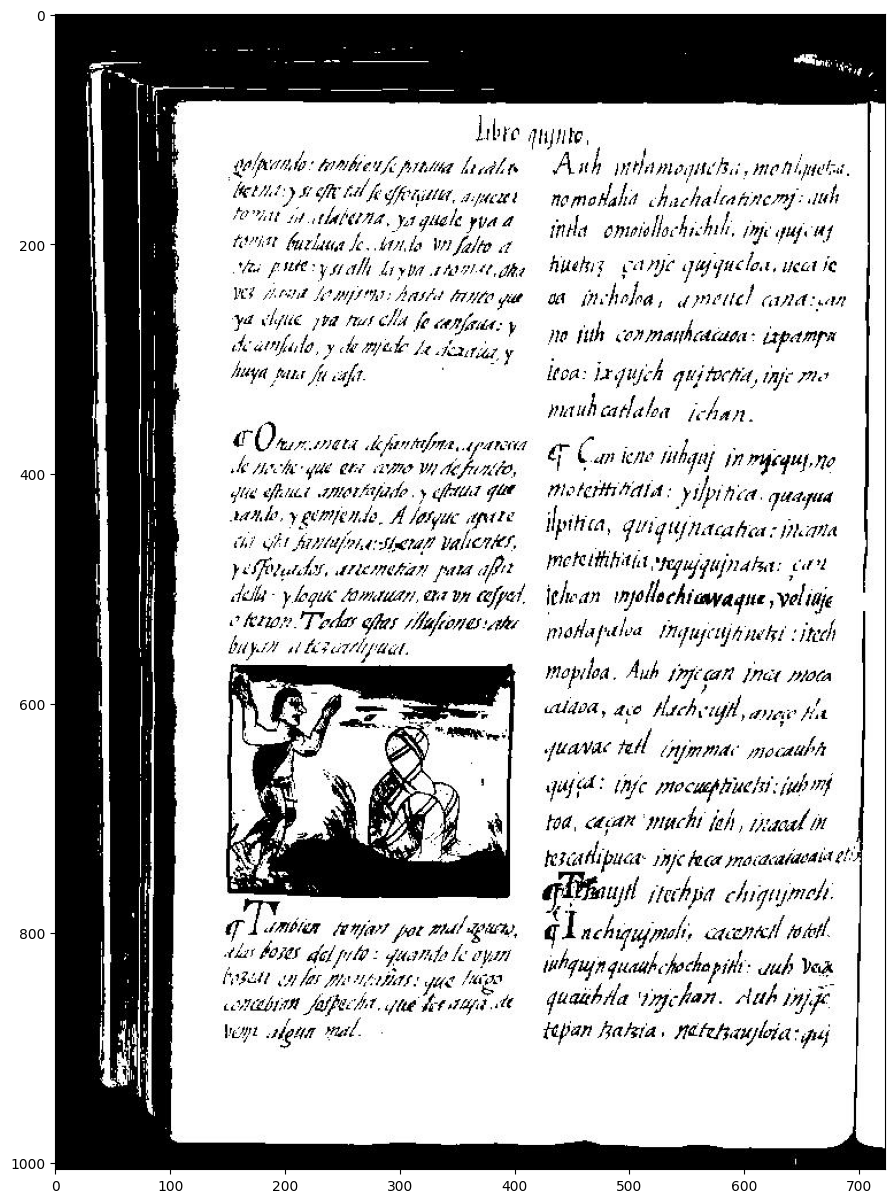

In [ ]:
# Making final folder...
img_lbl = img1.split('.')[0]
final_dir = '/content/' + img_lbl
os.mkdir(final_dir)

# Copying uploaded image to final folder...
to_dir = final_dir+"/Uploaded image"
os.mkdir(to_dir)
test_img = cv2.imread(img2)
cv2.imwrite(os.path.join(to_dir, img1),test_img)

# Showing uploaded image...
plot_fig(test_img)

Detecting 1st handwritten line of the given document by YOLO.

In [ ]:
# 1st detection...
img_path = img2
img_size = 640
conf = 0.30
yolo_detection(img_path, img_size, conf)

detect: weights=['/content/model/line_model_best.pt'], source=/content/1_1.jpg, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-283-g875d9278 Python-3.10.12 torch-2.1.0+cu121 CPU

Fusing layers... 
YOLOv5x summary: 444 layers, 86173414 parameters, 0 gradients, 203.8 GFLOPs
image 1/1 /content/1_1.jpg: 640x480 52 lines, 3206.5ms
Speed: 3.4ms pre-process, 3206.5ms inference, 1.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov5/runs/detect/exp
1 labels saved to yolov5/runs/detect/exp/labels


Displaying the 1st handwritten line detection of the given document image.

First Yolo detection :::
Image path :  /content/yolov5/runs/detect/exp/1_1.jpg


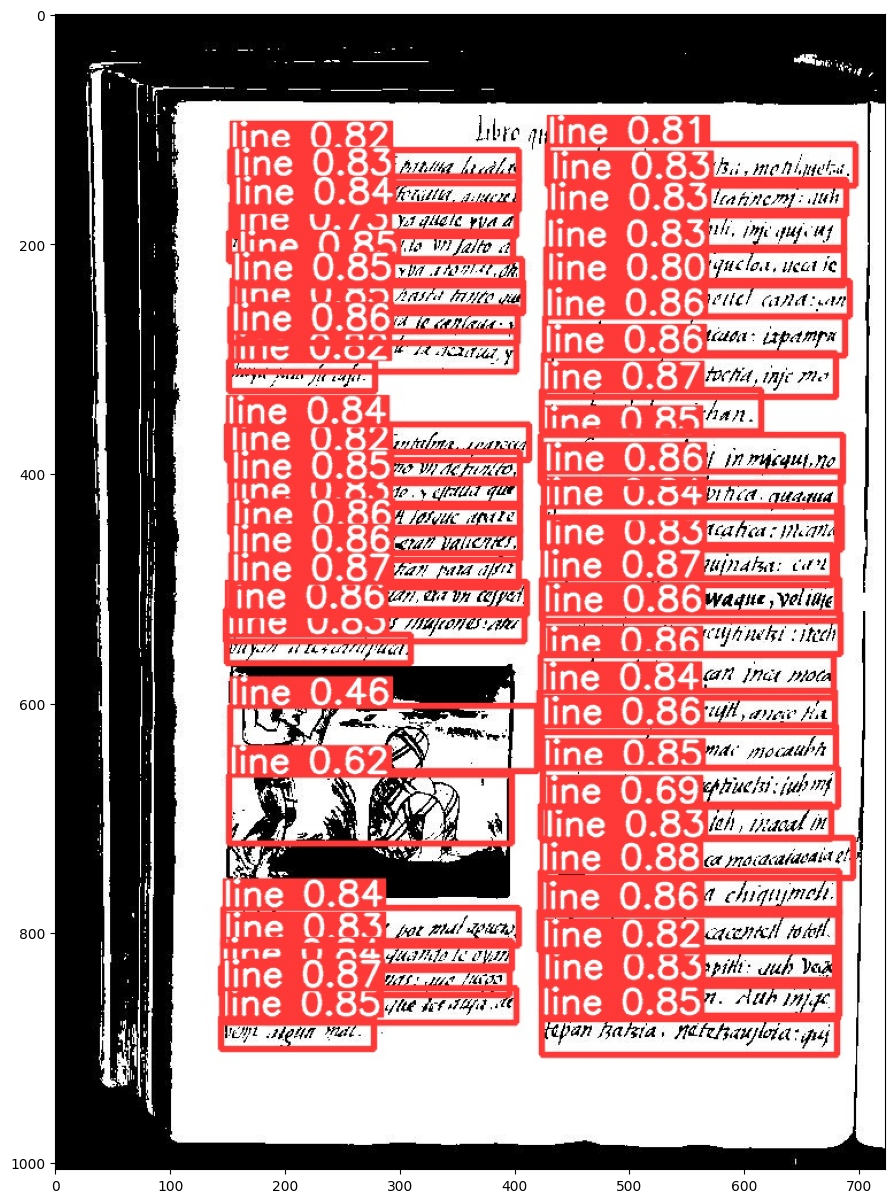

In [ ]:
# Showing 1st Detection result...
first_det = "/content/yolov5/runs/detect/exp/"
x = os.listdir(first_det)
x.remove('labels')
org_img = first_det + x[0]
print("First Yolo detection :::")
print("Image path : ",org_img)
org_img1 = cv2.imread(org_img)
plot_fig(org_img1)

# Copying 1st detection Result...
to_dir = final_dir+"/1st line detection for uploaded image"
shutil.copytree(first_det, to_dir)

# Sorting Labels of 1st detection on the basis of y...
txt_loc = "/content/yolov5/runs/detect/exp/labels/"
new_sort_label = '/content/sorted_line_after_1st_detection/'
flag = 0
sort_detection_label(txt_loc, new_sort_label, flag)


##Displaying multiple images...


Displaying the document's line detection output, where -
* In the first row, we have the uploaded document and its 1st handwritten line detection by YOLO.
* In the second row, we have the annotated lines on the uploaded document and its final 1st handwritten line detection by YOLO.


M  2.5

DISTANCES [[28, 1, 0], [29, 2, 1], [31, 3, 2], [28, 4, 3], [32, 5, 4], [34, 6, 5], [31, 7, 6], [43, 8, 7], [31, 9, 8], [28, 10, 9], [28, 11, 10], [4, 12, 11], [30, 13, 12], [30, 14, 13], [38, 15, 14], [31, 16, 15], [30, 17, 16], [35, 18, 17], [30, 19, 18], [31, 20, 19], [31, 21, 20], [34, 22, 21], [27, 23, 22], [4, 24, 23], [29, 25, 24], [31, 26, 25]]
MEAN 30
LOOK AT THIS [[43, 8, 7], [4, 12, 11], [38, 15, 14], [4, 24, 23]]
IN THE RIGHT PLACEEEEEEEE
MAX_R 696
LOOOK AT ADD [[[43, 8, 7], 1], [[38, 15, 14], 1]]
LOOOK AT SUB [[4, 12, 11], [4, 24, 23]]
NEW DIFF 0
DISTANCES [[28, 1, 0], [29, 2, 1], [31, 3, 2], [28, 4, 3], [32, 5, 4], [34, 6, 5], [31, 7, 6], [43, 8, 7], [31, 9, 8], [28, 10, 9], [32, 11, 10], [30, 12, 11], [30, 13, 12], [38, 14, 13], [31, 15, 14], [30, 16, 15], [35, 17, 16], [30, 18, 17], [31, 19, 18], [31, 20, 19], [34, 21, 20], [27, 22, 21], [33, 23, 22], [31, 24, 23]]
MEAN 30
LOOK AT THIS [[43, 8, 7], [38, 14, 13]]
MAX_R 696
LOOOK AT ADD [[[43, 8, 7], 1], [[38, 14,

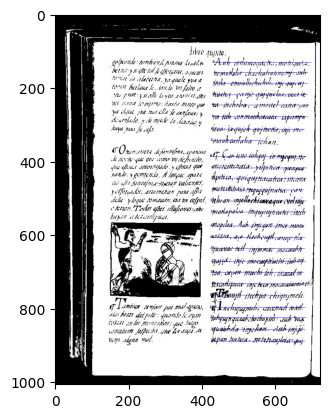

In [ ]:
# create figure
"""
fig = plt.figure(figsize=(40, 60))

# setting values to rows and column variables
rows = 2
columns = 2

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(test_img)
plt.title("\nUploaded Image\n",  fontsize=40)

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)

# showing image
plt.imshow(cv2.cvtColor(org_img1, cv2.COLOR_BGR2RGB))
plt.title("Initial Predicted Lines by YOLO\n", fontsize=40)

# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)


# # showing image
# flag = 0
# label_path = gt_line_dir + img1.split('.')[0] + ".txt"
# img_g = draw_BB(img_path, label_path, flag)
# plt.imshow(img_g)
# plt.title("\nAnnotated Lines\n",  fontsize=40)

# # Adds a subplot at the 4th position
# fig.add_subplot(rows, columns, 4)
"""
# showing image
flag = 1
label_path = "/content/sorted_line_after_1st_detection/" + img1.split('.')[0] + ".txt"
img_p = draw_BB(img_path, label_path, flag, paragraph_data[str(key)][-1][-1] + 1, 1, paragraph_data[str(key)])
#img_q = draw_BB('sample_data/in.jpg', label_path, flag, 29, 1, paragraph_data['5'])
#plt.imshow(cv2.cvtColor(img_p, cv2.COLOR_BGR2RGB))
#plt.title("Final Predicted Lines by YOLO\n", fontsize=40)
plt.imshow(cv2.cvtColor(img_p, cv2.COLOR_BGR2RGB))
#fig.add_subplot(rows, columns, 4)
#plt.imshow(cv2.cvtColor(img_q, cv2.COLOR_BGR2RGB))
#plt.title("Final Superimposed Lines\n", fontsize=40)



In [ ]:
img_pth = "/content/203_8/" + img1
cv2.imwrite(img_pth, img_p)

False

##1st Line segmentation results...

Displaying the 1st line segmentation output with the annotated line segmentation of the given document.

['1_1.txt']
Segmented Lines from 1st Yolo detection :::
Cropped Line images:  ['1_1_1.jpg', '1_1_2.jpg', '1_1_3.jpg', '1_1_4.jpg', '1_1_5.jpg', '1_1_6.jpg', '1_1_7.jpg', '1_1_8.jpg', '1_1_9.jpg', '1_1_10.jpg', '1_1_11.jpg', '1_1_12.jpg', '1_1_13.jpg', '1_1_14.jpg', '1_1_15.jpg', '1_1_16.jpg', '1_1_17.jpg', '1_1_18.jpg', '1_1_19.jpg', '1_1_20.jpg', '1_1_21.jpg', '1_1_22.jpg', '1_1_23.jpg', '1_1_24.jpg', '1_1_25.jpg', '1_1_26.jpg', '1_1_27.jpg', '1_1_28.jpg', '1_1_29.jpg', '1_1_30.jpg', '1_1_31.jpg', '1_1_32.jpg', '1_1_33.jpg', '1_1_34.jpg', '1_1_35.jpg', '1_1_36.jpg', '1_1_37.jpg', '1_1_38.jpg', '1_1_39.jpg', '1_1_40.jpg', '1_1_41.jpg', '1_1_42.jpg', '1_1_43.jpg', '1_1_44.jpg', '1_1_45.jpg', '1_1_46.jpg', '1_1_47.jpg', '1_1_48.jpg', '1_1_49.jpg', '1_1_50.jpg', '1_1_51.jpg', '1_1_52.jpg']

Line no: 1
Image name::  1_1_1.jpg
Predicted Line ->


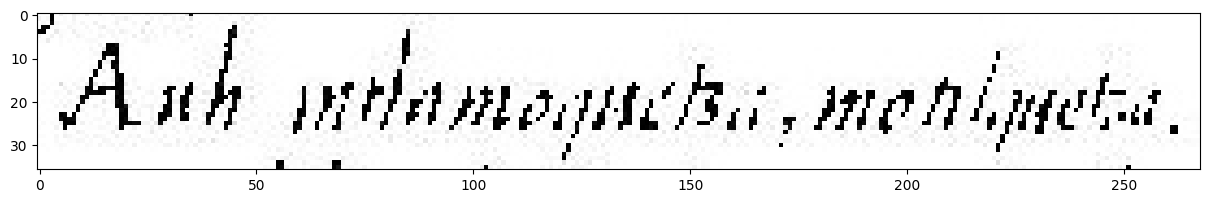


Line no: 2
Image name::  1_1_2.jpg
Predicted Line ->


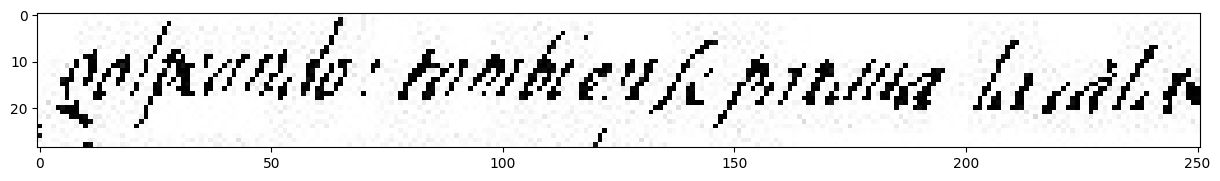


Line no: 3
Image name::  1_1_3.jpg
Predicted Line ->


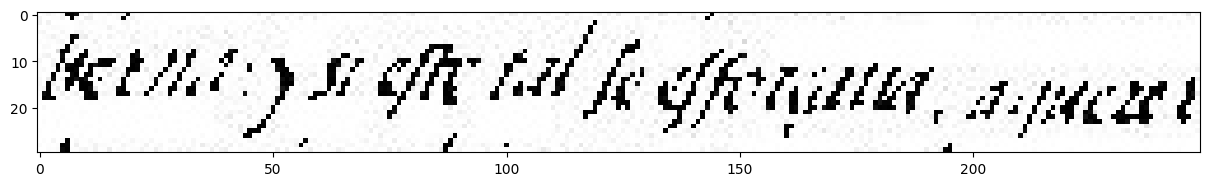


Line no: 4
Image name::  1_1_4.jpg
Predicted Line ->


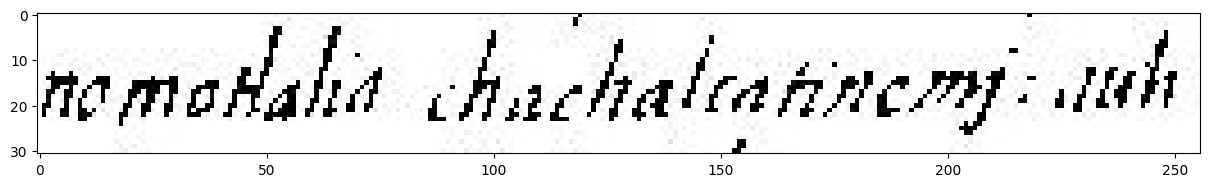


Line no: 5
Image name::  1_1_5.jpg
Predicted Line ->


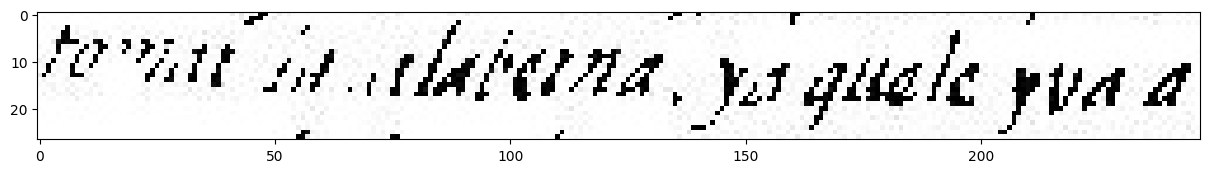


Line no: 6
Image name::  1_1_6.jpg
Predicted Line ->


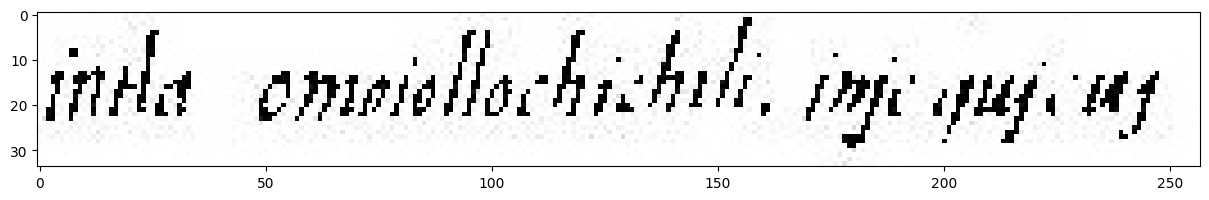


Line no: 7
Image name::  1_1_7.jpg
Predicted Line ->


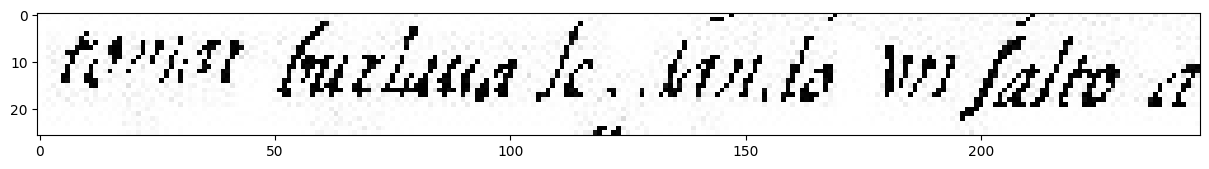


Line no: 8
Image name::  1_1_8.jpg
Predicted Line ->


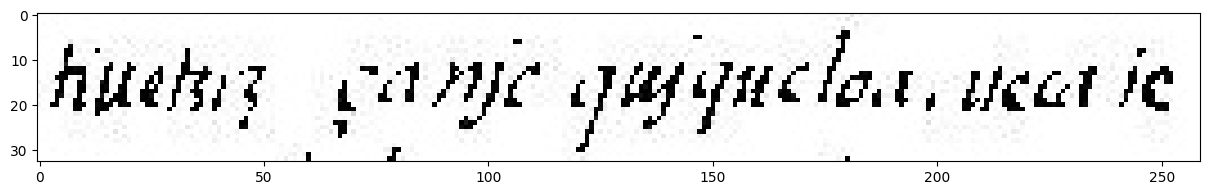


Line no: 9
Image name::  1_1_9.jpg
Predicted Line ->


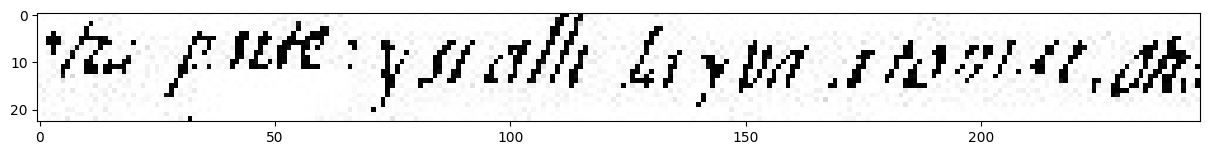


Line no: 10
Image name::  1_1_10.jpg
Predicted Line ->


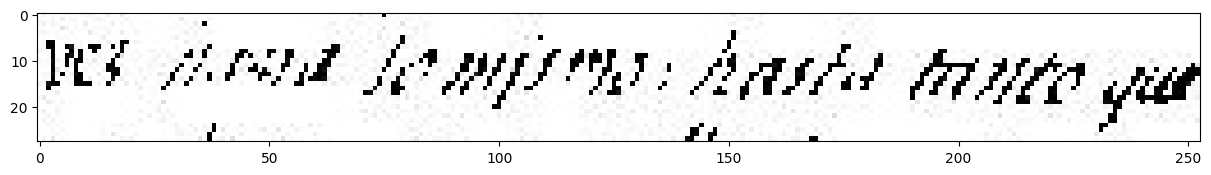


Line no: 11
Image name::  1_1_11.jpg
Predicted Line ->


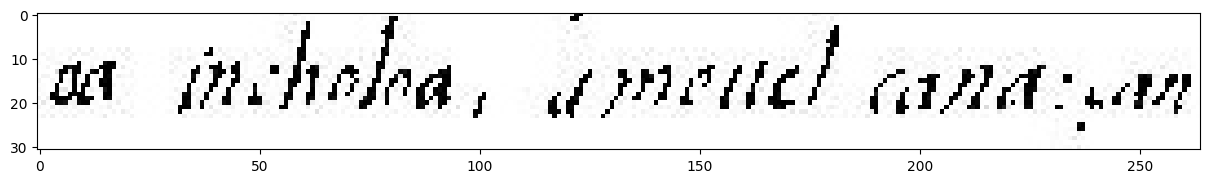


Line no: 12
Image name::  1_1_12.jpg
Predicted Line ->


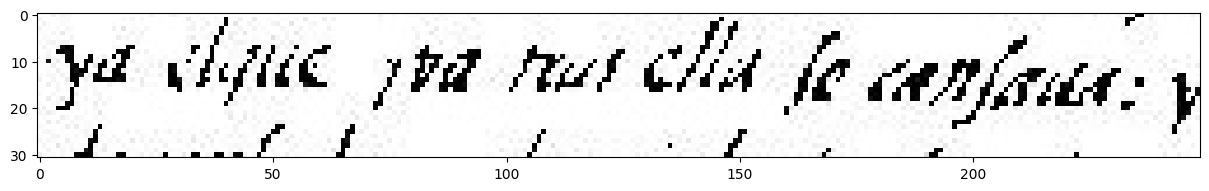


Line no: 13
Image name::  1_1_13.jpg
Predicted Line ->


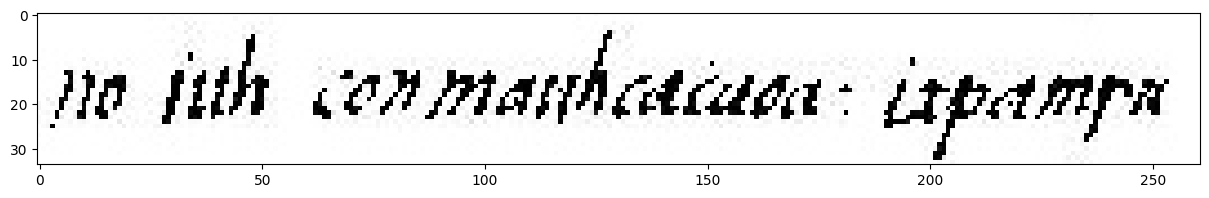


Line no: 14
Image name::  1_1_14.jpg
Predicted Line ->


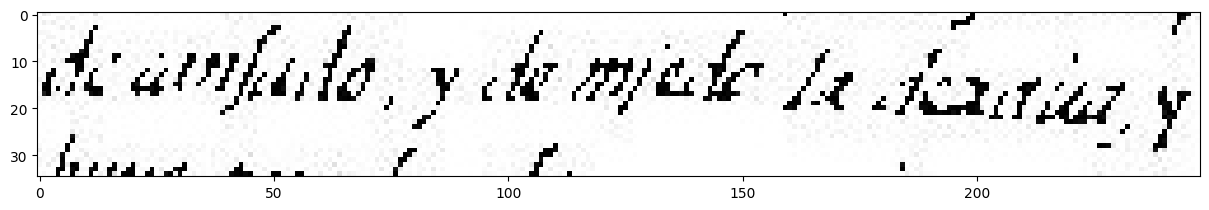


Line no: 15
Image name::  1_1_15.jpg
Predicted Line ->


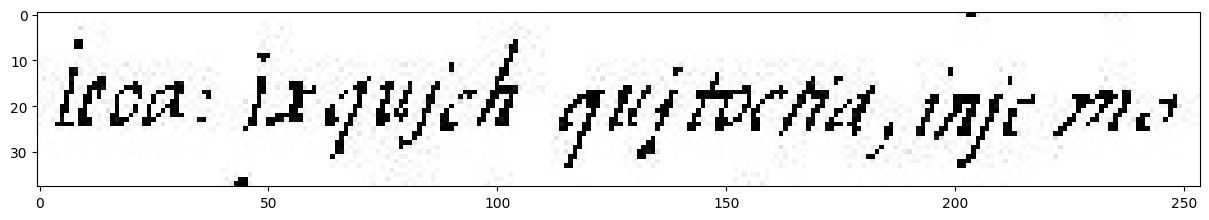


Line no: 16
Image name::  1_1_16.jpg
Predicted Line ->


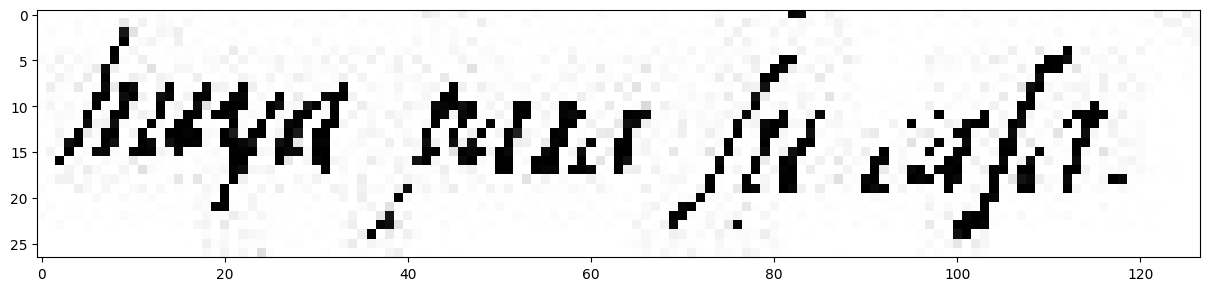


Line no: 17
Image name::  1_1_17.jpg
Predicted Line ->


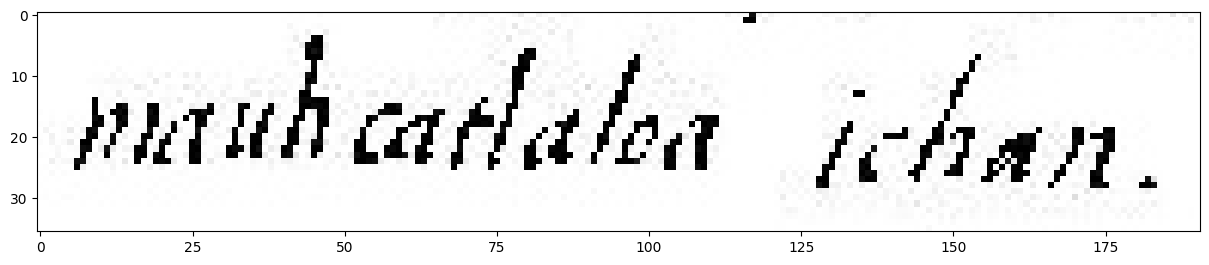


Line no: 18
Image name::  1_1_18.jpg
Predicted Line ->


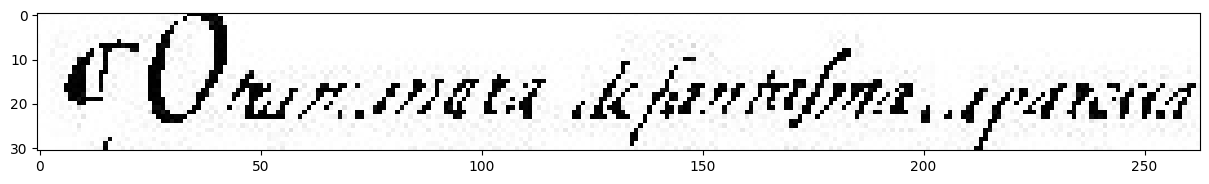


Line no: 19
Image name::  1_1_19.jpg
Predicted Line ->


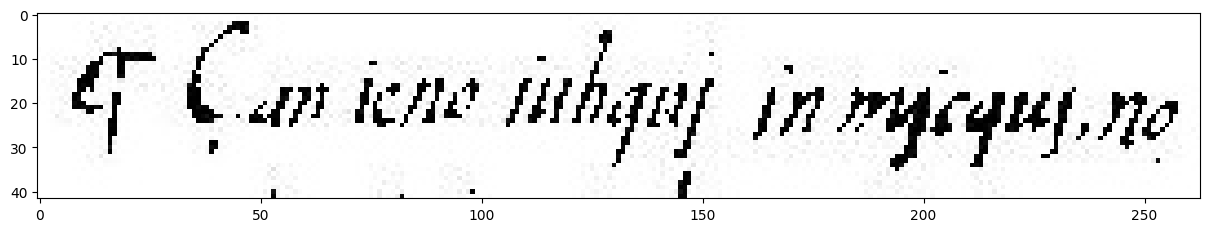


Line no: 20
Image name::  1_1_20.jpg
Predicted Line ->


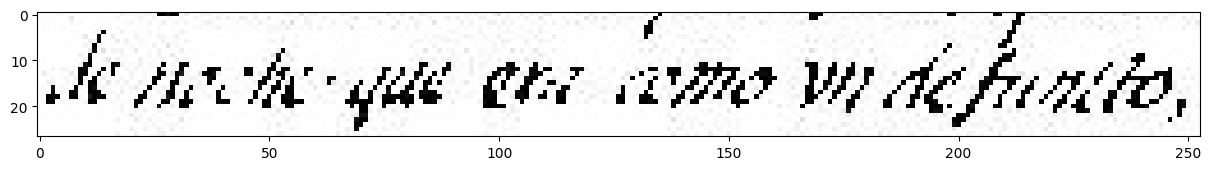


Line no: 21
Image name::  1_1_21.jpg
Predicted Line ->


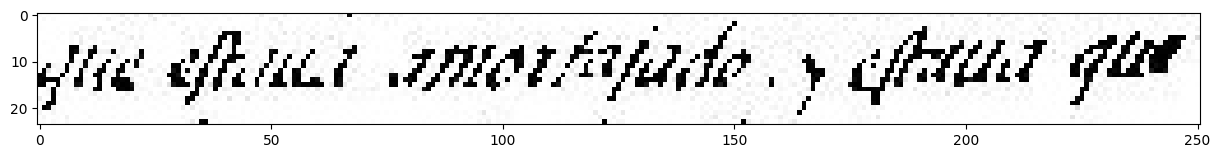


Line no: 22
Image name::  1_1_22.jpg
Predicted Line ->


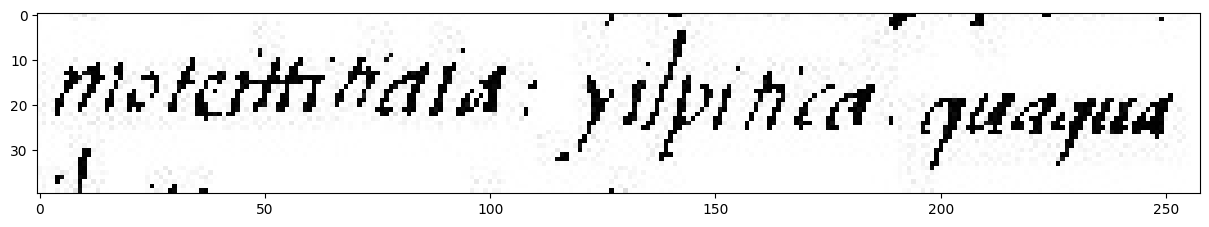


Line no: 23
Image name::  1_1_23.jpg
Predicted Line ->


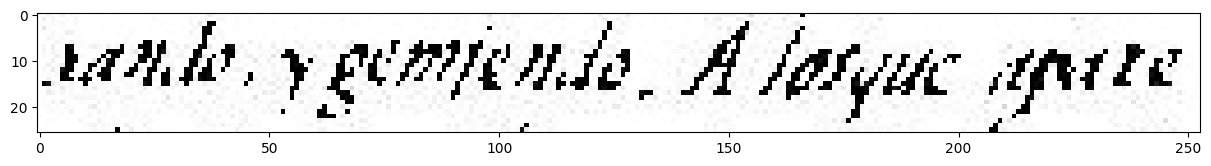


Line no: 24
Image name::  1_1_24.jpg
Predicted Line ->


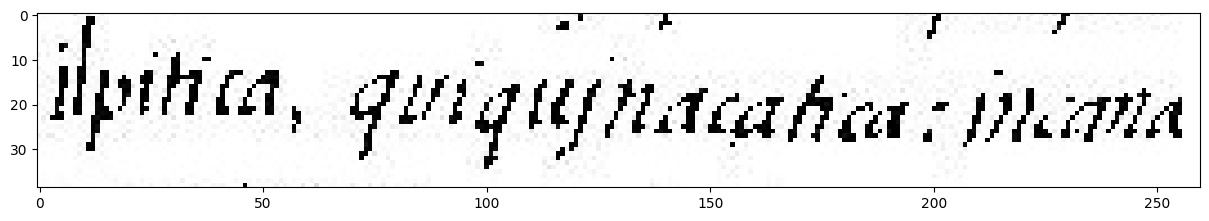


Line no: 25
Image name::  1_1_25.jpg
Predicted Line ->


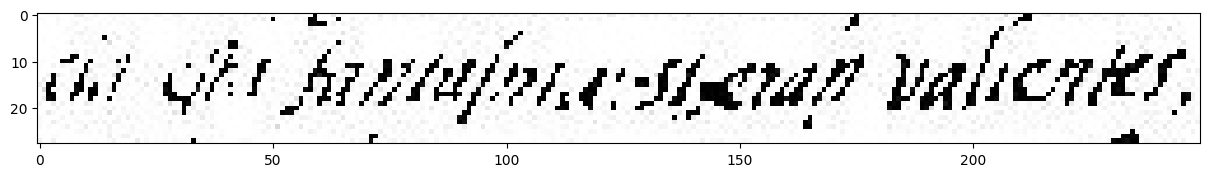


Line no: 26
Image name::  1_1_26.jpg
Predicted Line ->


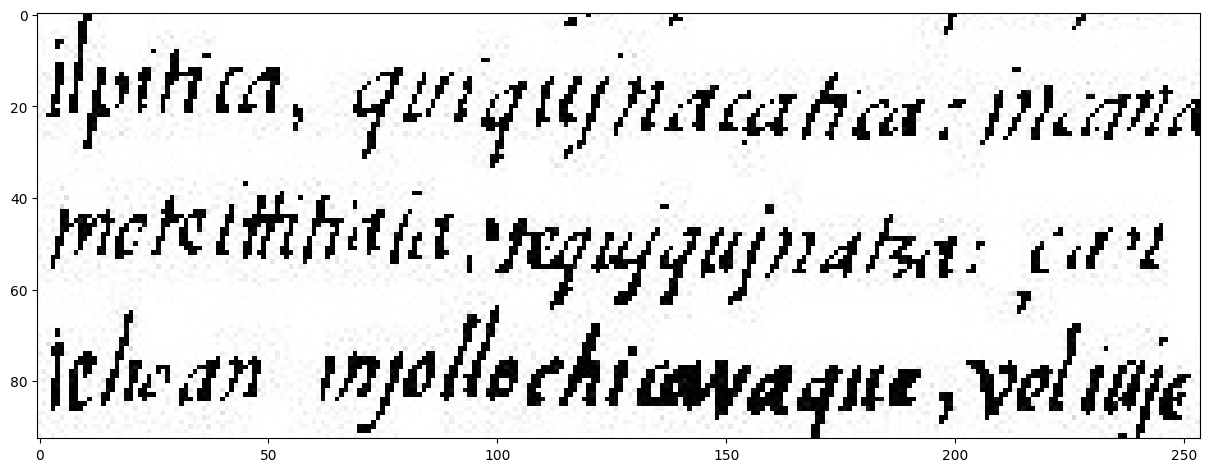


Line no: 27
Image name::  1_1_27.jpg
Predicted Line ->


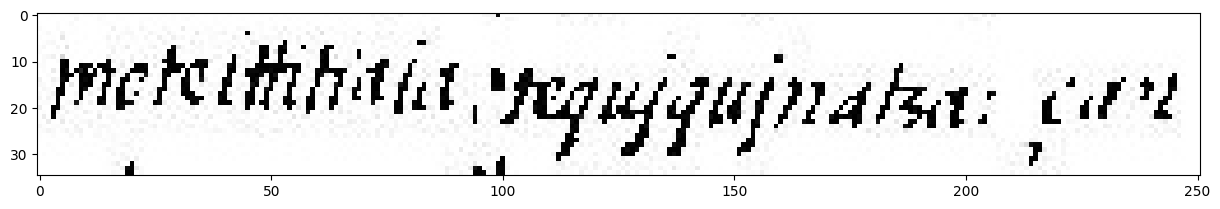


Line no: 28
Image name::  1_1_28.jpg
Predicted Line ->


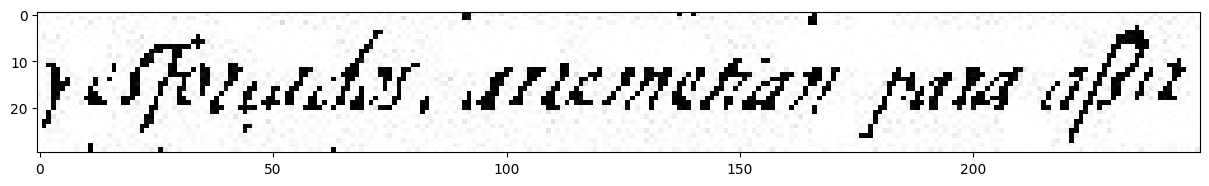


Line no: 29
Image name::  1_1_29.jpg
Predicted Line ->


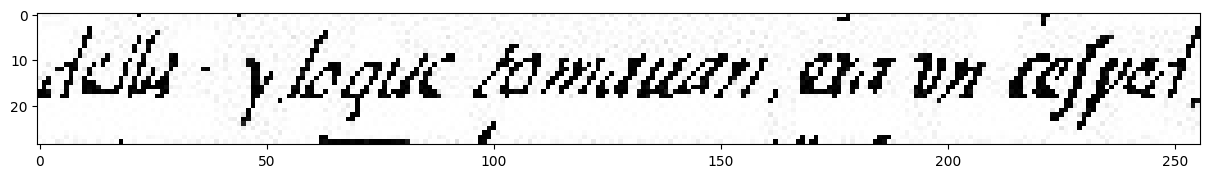


Line no: 30
Image name::  1_1_30.jpg
Predicted Line ->


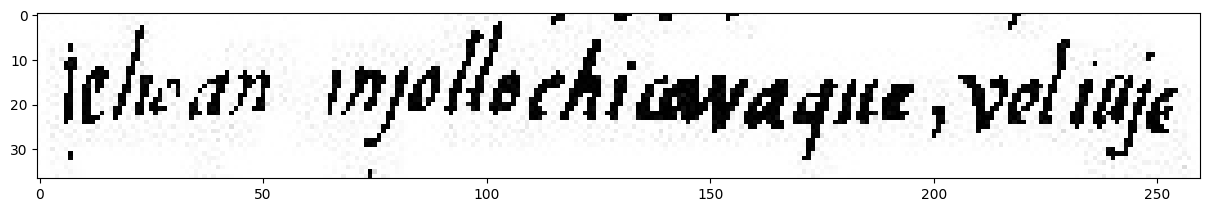


Line no: 31
Image name::  1_1_31.jpg
Predicted Line ->


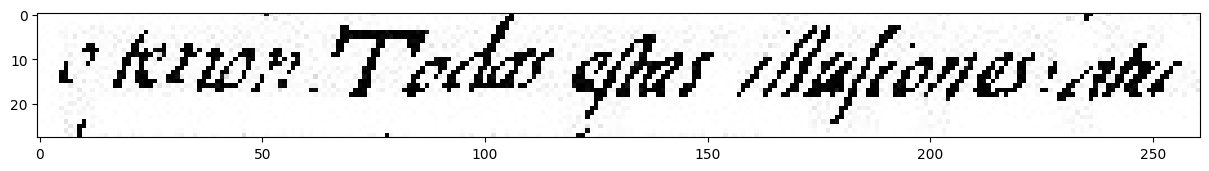


Line no: 32
Image name::  1_1_32.jpg
Predicted Line ->


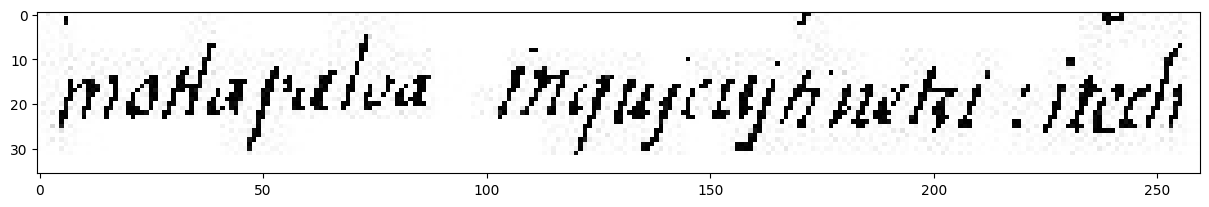


Line no: 33
Image name::  1_1_33.jpg
Predicted Line ->


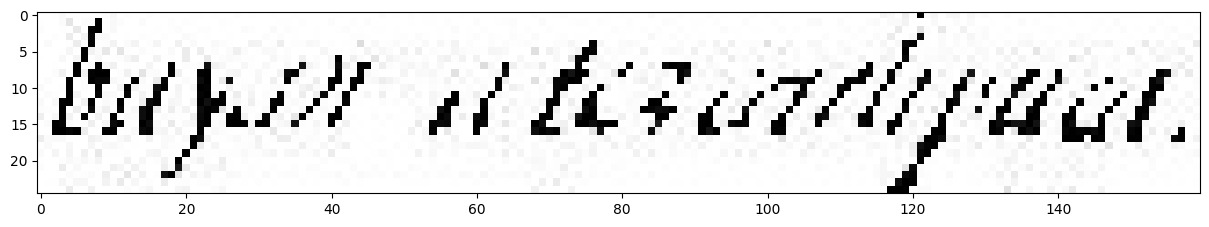


Line no: 34
Image name::  1_1_34.jpg
Predicted Line ->


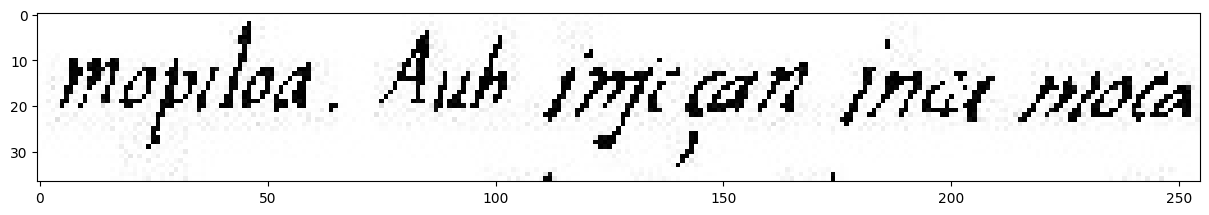


Line no: 35
Image name::  1_1_35.jpg
Predicted Line ->


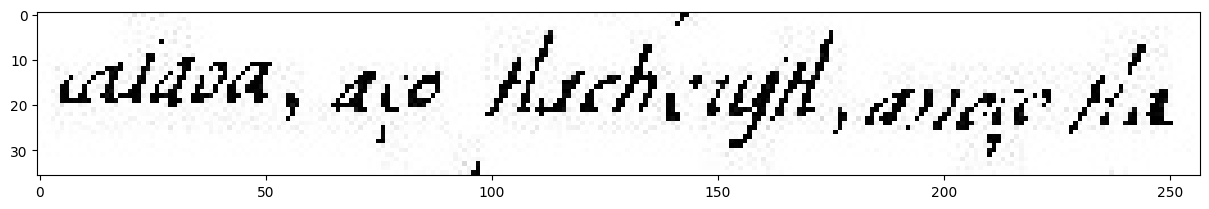


Line no: 36
Image name::  1_1_36.jpg
Predicted Line ->


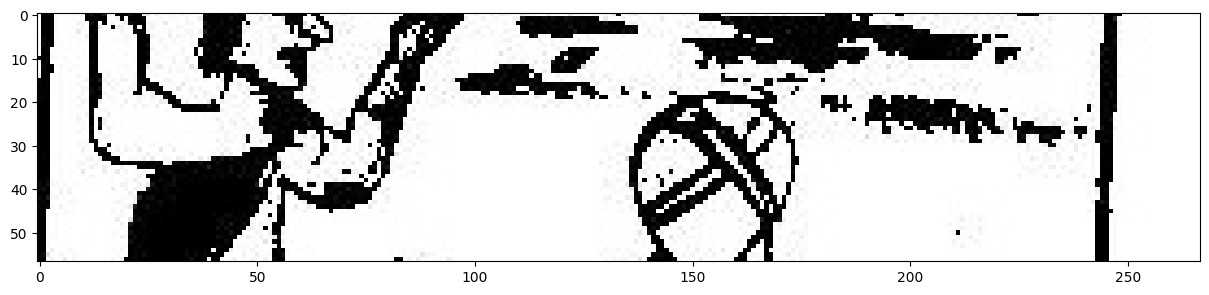


Line no: 37
Image name::  1_1_37.jpg
Predicted Line ->


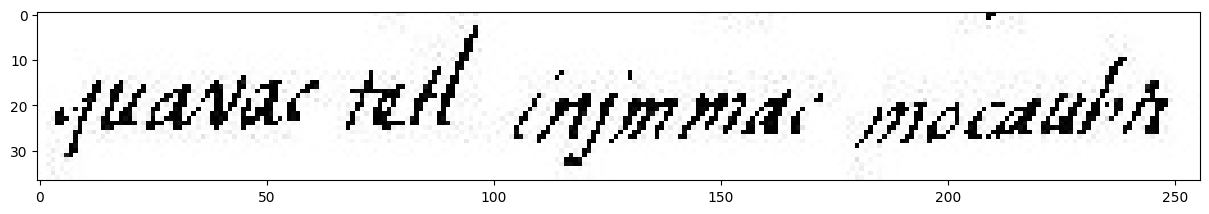


Line no: 38
Image name::  1_1_38.jpg
Predicted Line ->


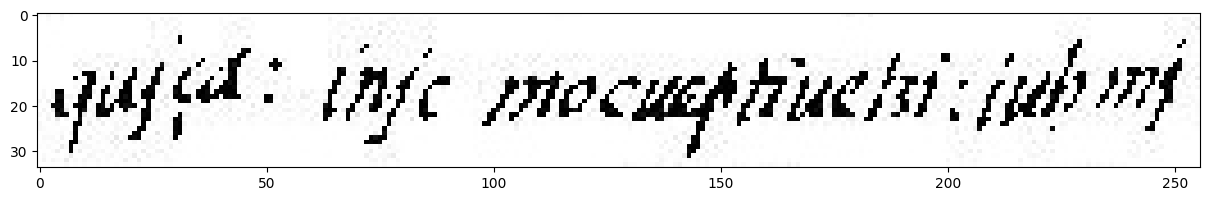


Line no: 39
Image name::  1_1_39.jpg
Predicted Line ->


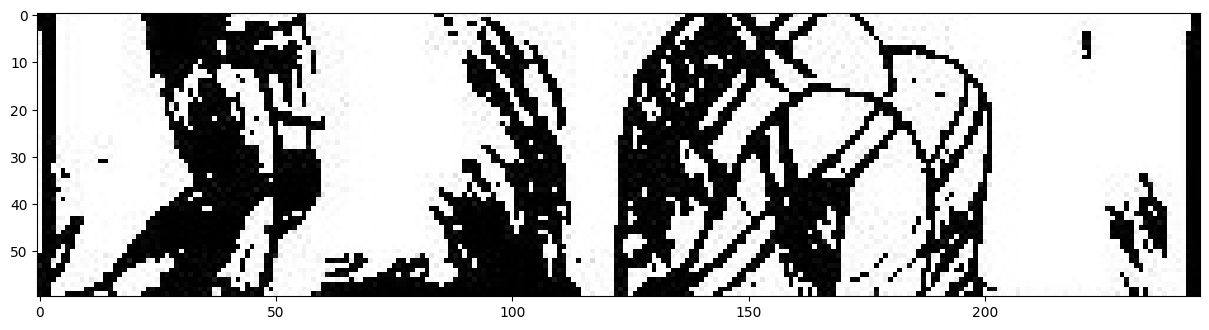


Line no: 40
Image name::  1_1_40.jpg
Predicted Line ->


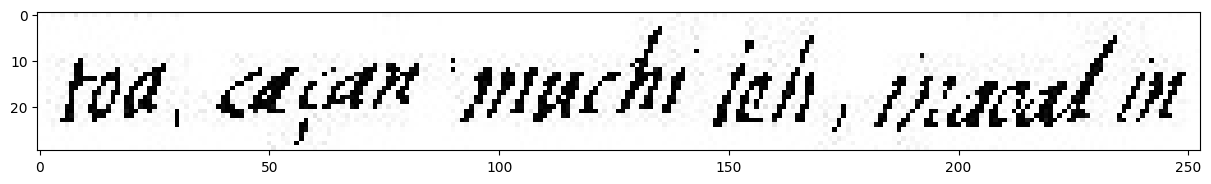


Line no: 41
Image name::  1_1_41.jpg
Predicted Line ->


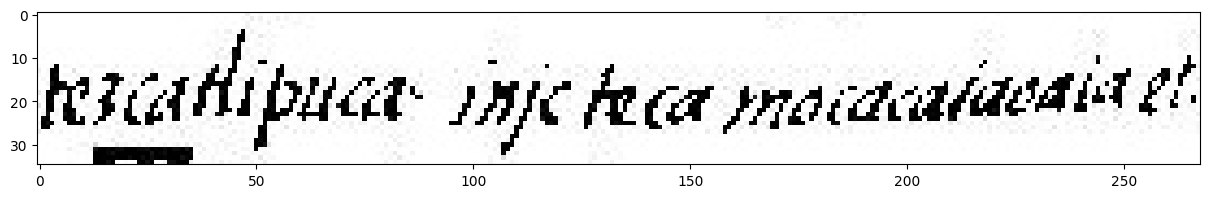


Line no: 42
Image name::  1_1_42.jpg
Predicted Line ->


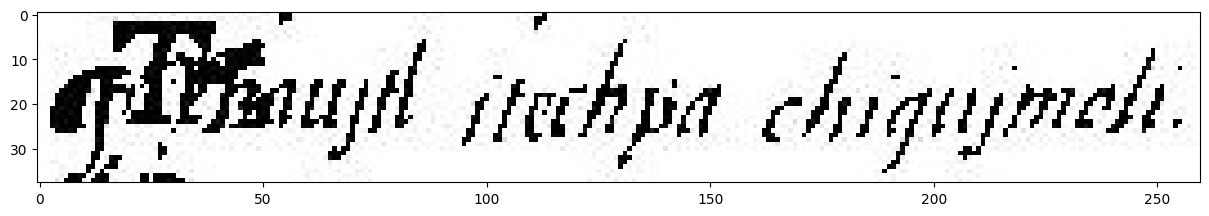


Line no: 43
Image name::  1_1_43.jpg
Predicted Line ->


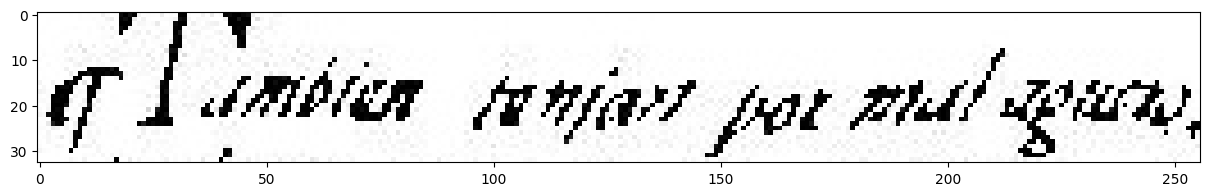


Line no: 44
Image name::  1_1_44.jpg
Predicted Line ->


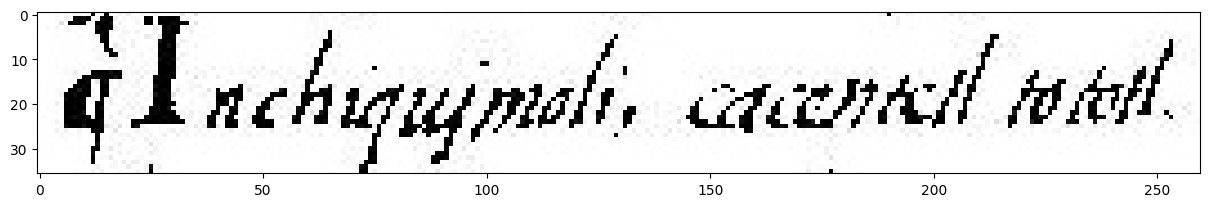


Line no: 45
Image name::  1_1_45.jpg
Predicted Line ->


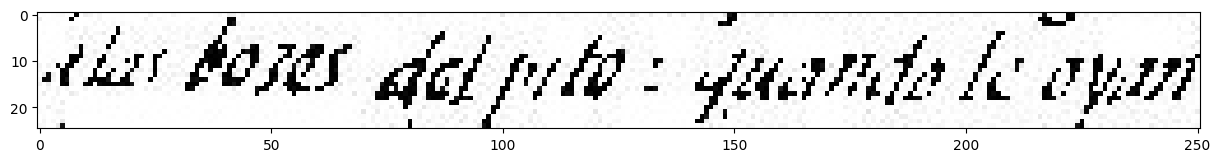


Line no: 46
Image name::  1_1_46.jpg
Predicted Line ->


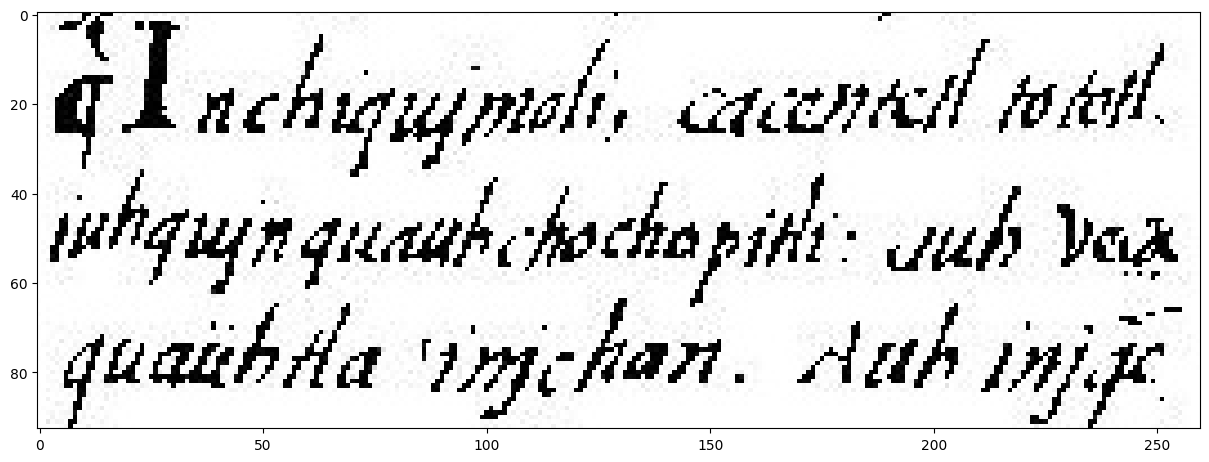


Line no: 47
Image name::  1_1_47.jpg
Predicted Line ->


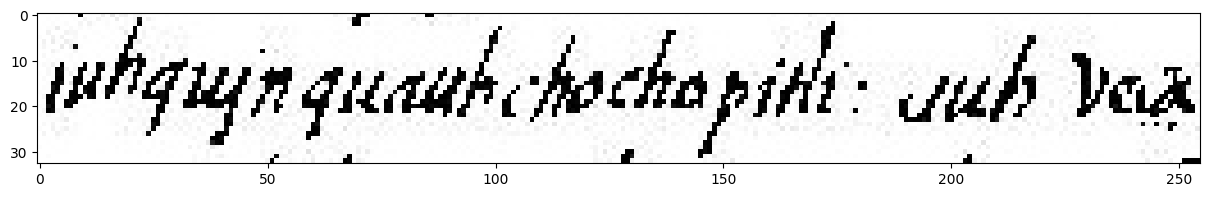


Line no: 48
Image name::  1_1_48.jpg
Predicted Line ->


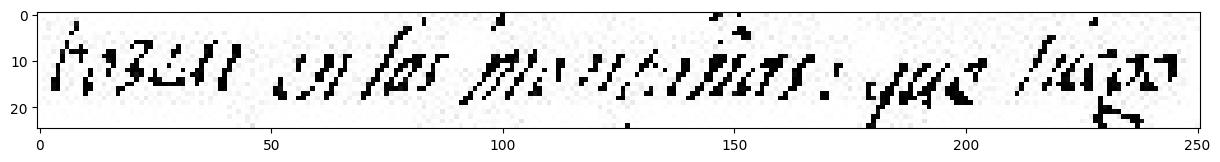


Line no: 49
Image name::  1_1_49.jpg
Predicted Line ->


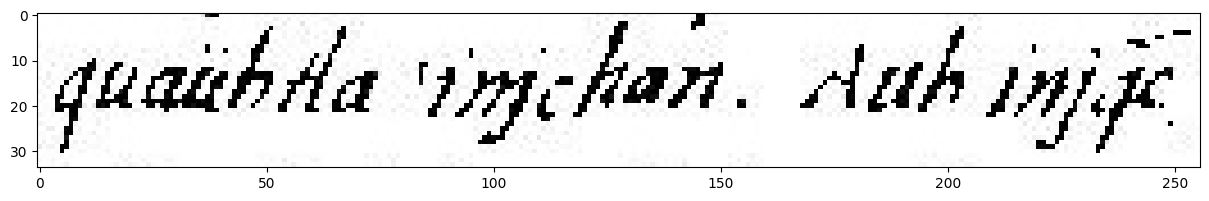


Line no: 50
Image name::  1_1_50.jpg
Predicted Line ->


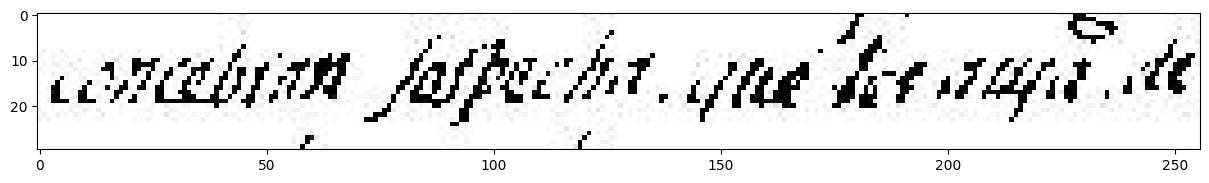


Line no: 51
Image name::  1_1_51.jpg
Predicted Line ->


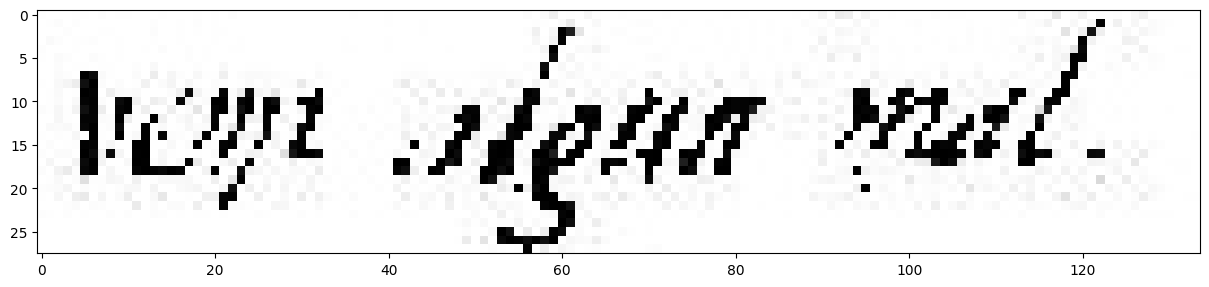


Line no: 52
Image name::  1_1_52.jpg
Predicted Line ->


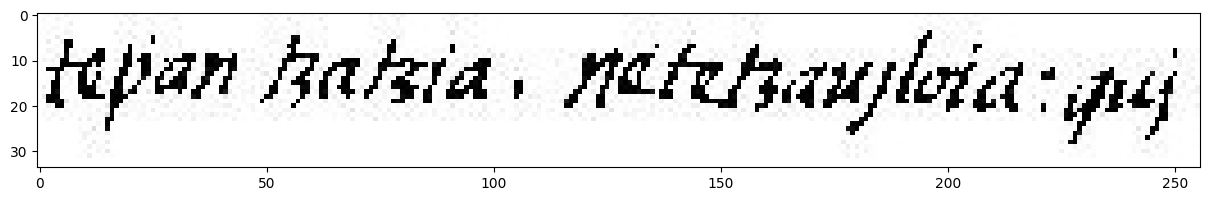

'/content/1_1/Initial line segmentation/Sorted label (based on y axis)'

In [ ]:
# Line Segmentation after 1st Detection...
img_path = '/content/'+img1
sorted_label = "/content/sorted_line_after_1st_detection/"
filename = "/content/initial_line_segmantation/"
line_segmantation_1(img_path, img1, sorted_label, filename)

print("Segmented Lines from 1st Yolo detection :::")
content1 = "Annotated Line or GroundTruth ->"
content2 = "Predicted Line ->"
# show_transitions_by_comparing(filename, gt_line_img_dir, content1, content2)
show_transitions_by_comparing(filename, content2)

# Copying line Segmentation after 1st Detection...
to_dir = final_dir+"/Initial line segmentation"
shutil.copytree(filename, to_dir)

# Copying sorted label...
to_dir = final_dir+"/Initial line segmentation/Sorted label (based on y axis)"
shutil.copytree(sorted_label, to_dir)

##Rotation Process...

Displaying the transition of line image's rotation process by Hough Line and Affine Transform.

['1_1_1.jpg', '1_1_2.jpg', '1_1_3.jpg', '1_1_4.jpg', '1_1_5.jpg', '1_1_6.jpg', '1_1_7.jpg', '1_1_8.jpg', '1_1_9.jpg', '1_1_10.jpg', '1_1_11.jpg', '1_1_12.jpg', '1_1_13.jpg', '1_1_14.jpg', '1_1_15.jpg', '1_1_16.jpg', '1_1_17.jpg', '1_1_18.jpg', '1_1_19.jpg', '1_1_20.jpg', '1_1_21.jpg', '1_1_22.jpg', '1_1_23.jpg', '1_1_24.jpg', '1_1_25.jpg', '1_1_26.jpg', '1_1_27.jpg', '1_1_28.jpg', '1_1_29.jpg', '1_1_30.jpg', '1_1_31.jpg', '1_1_32.jpg', '1_1_33.jpg', '1_1_34.jpg', '1_1_35.jpg', '1_1_36.jpg', '1_1_37.jpg', '1_1_38.jpg', '1_1_39.jpg', '1_1_40.jpg', '1_1_41.jpg', '1_1_42.jpg', '1_1_43.jpg', '1_1_44.jpg', '1_1_45.jpg', '1_1_46.jpg', '1_1_47.jpg', '1_1_48.jpg', '1_1_49.jpg', '1_1_50.jpg', '1_1_51.jpg', '1_1_52.jpg']

Image ::  1_1_1.jpg
Gray Image: 


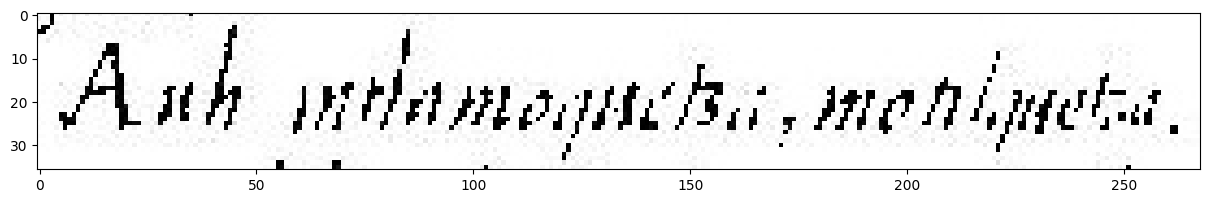

Canny Image: 


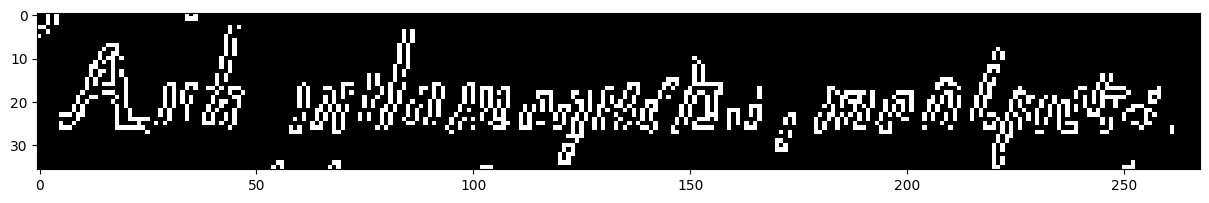

Resized Image by Padding and Scaling:


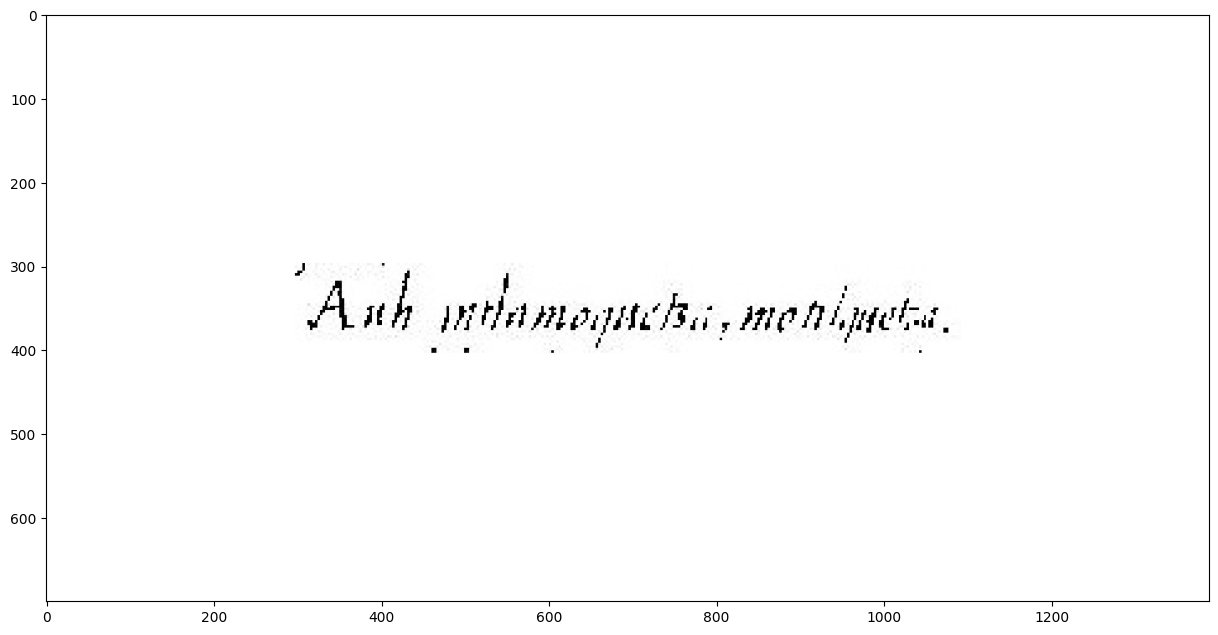

Gray Image:


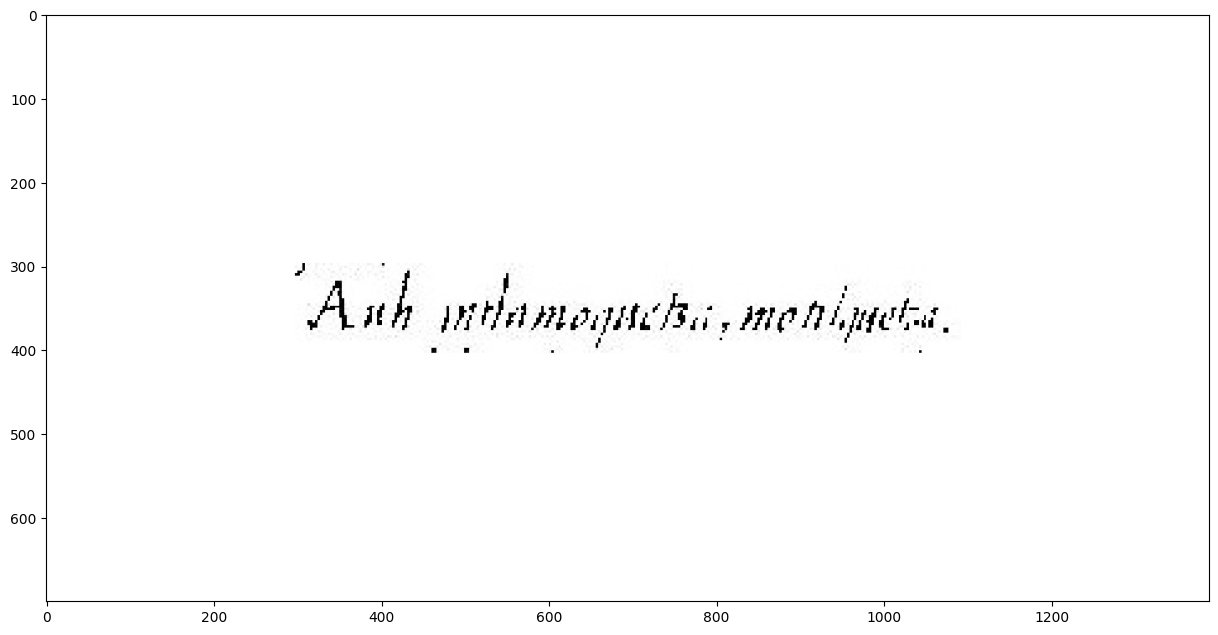

Inverse Binary:


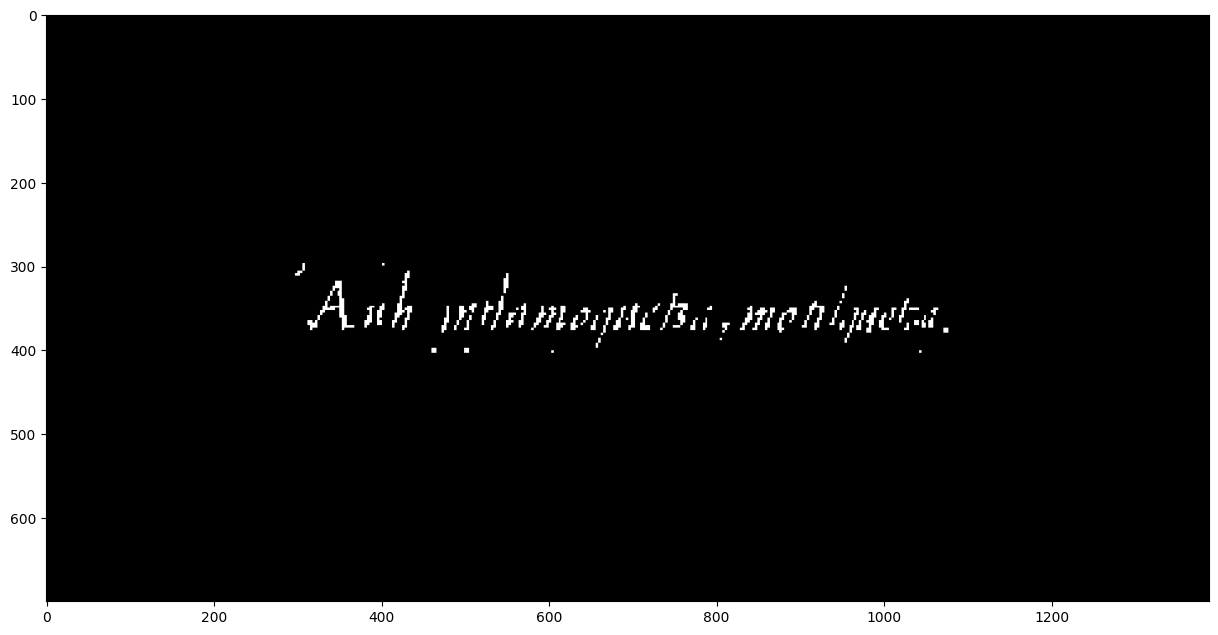

Dilated Binary:


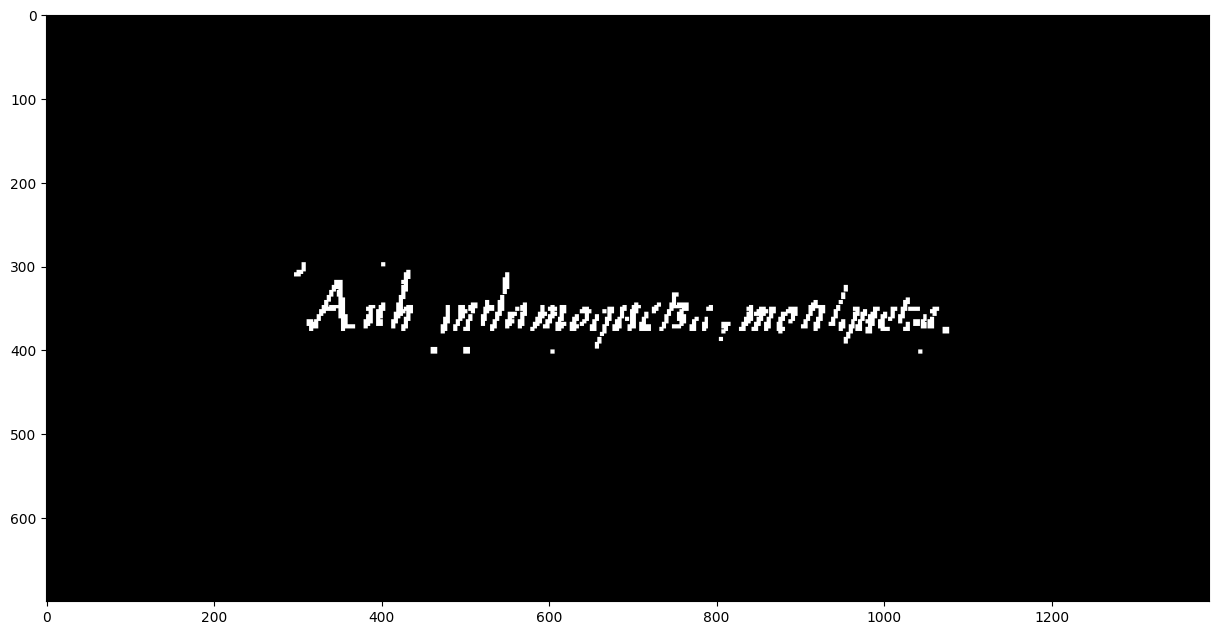

Canny edged detection:


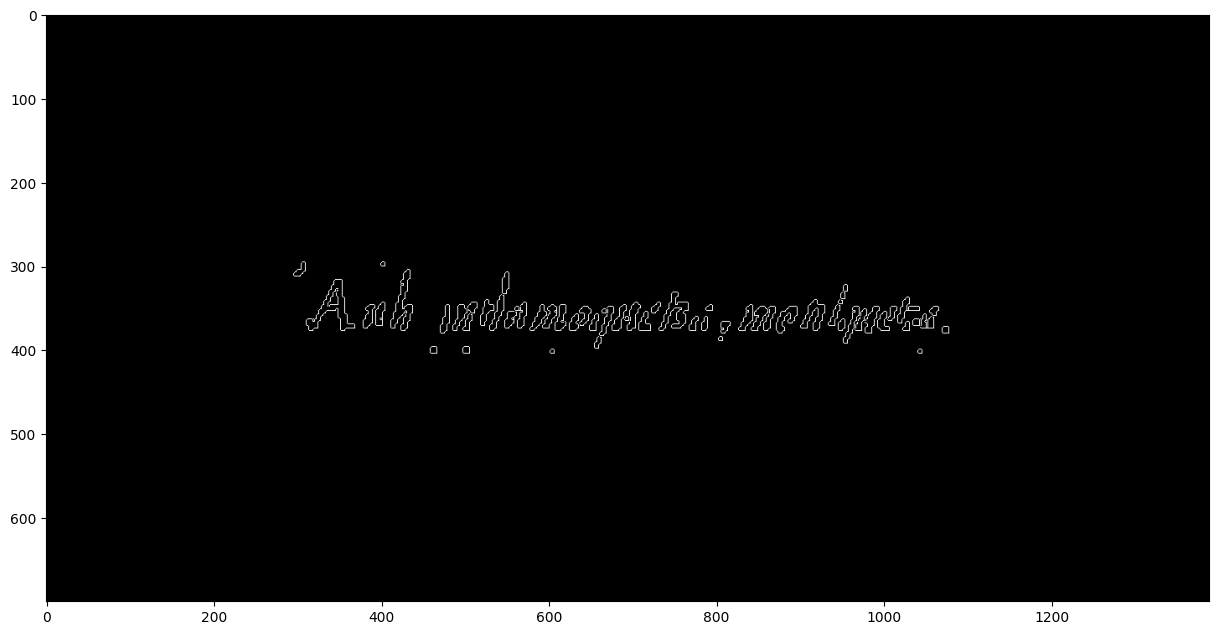

Probabilistic Hough Lines:


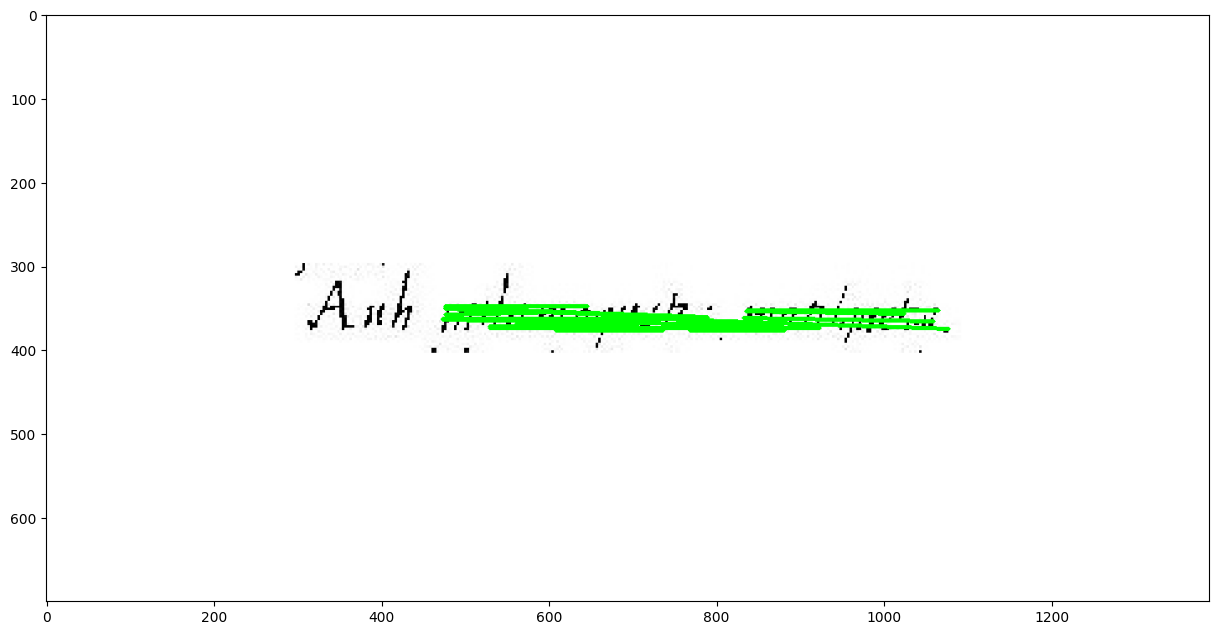

DSkew angle:  0


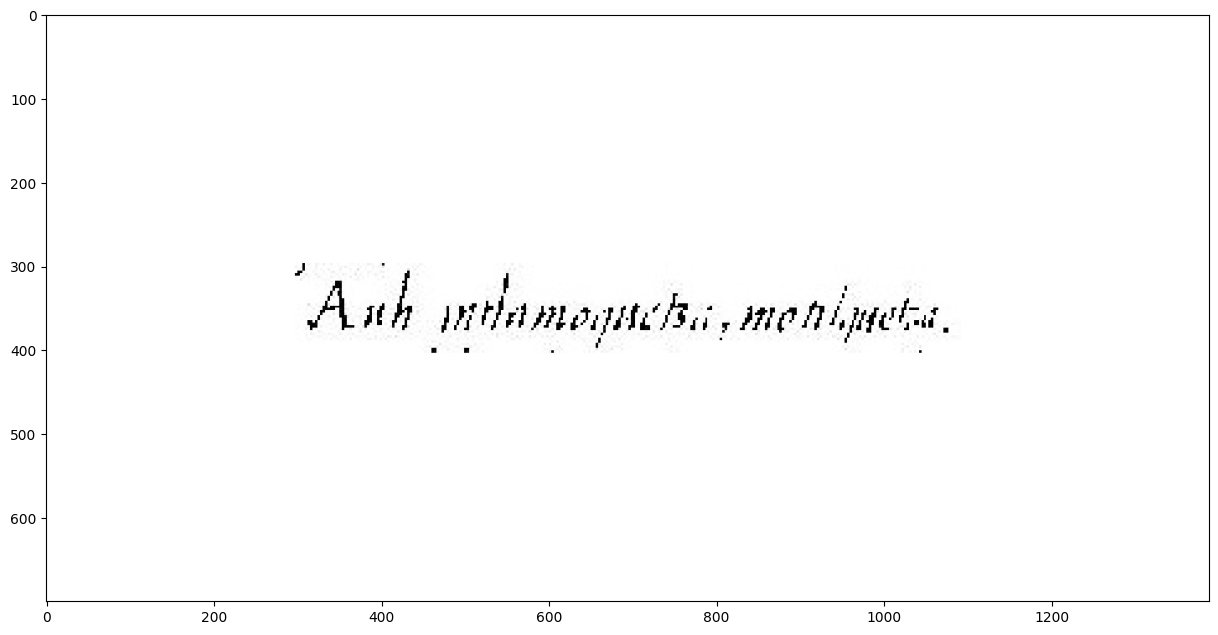

Rotated Image by DSkew: 


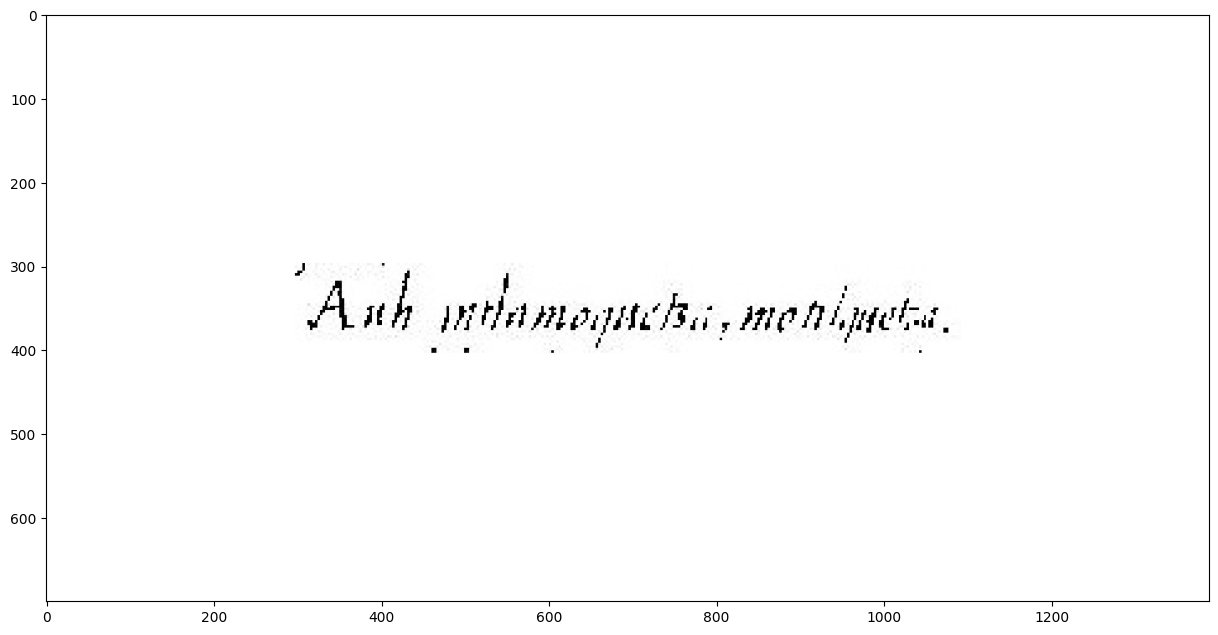



Image ::  1_1_2.jpg
Gray Image: 


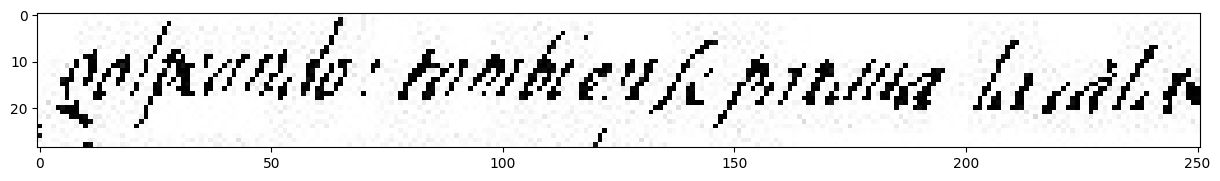

Canny Image: 


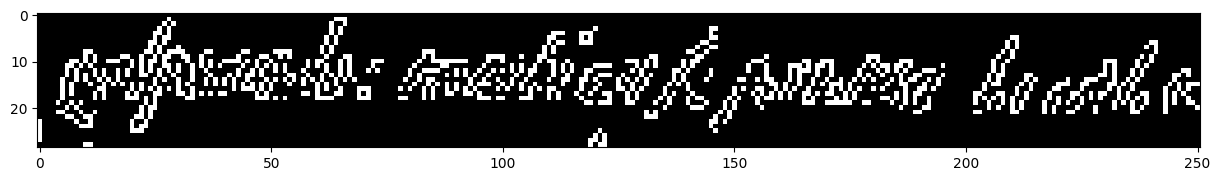

Resized Image by Padding and Scaling:


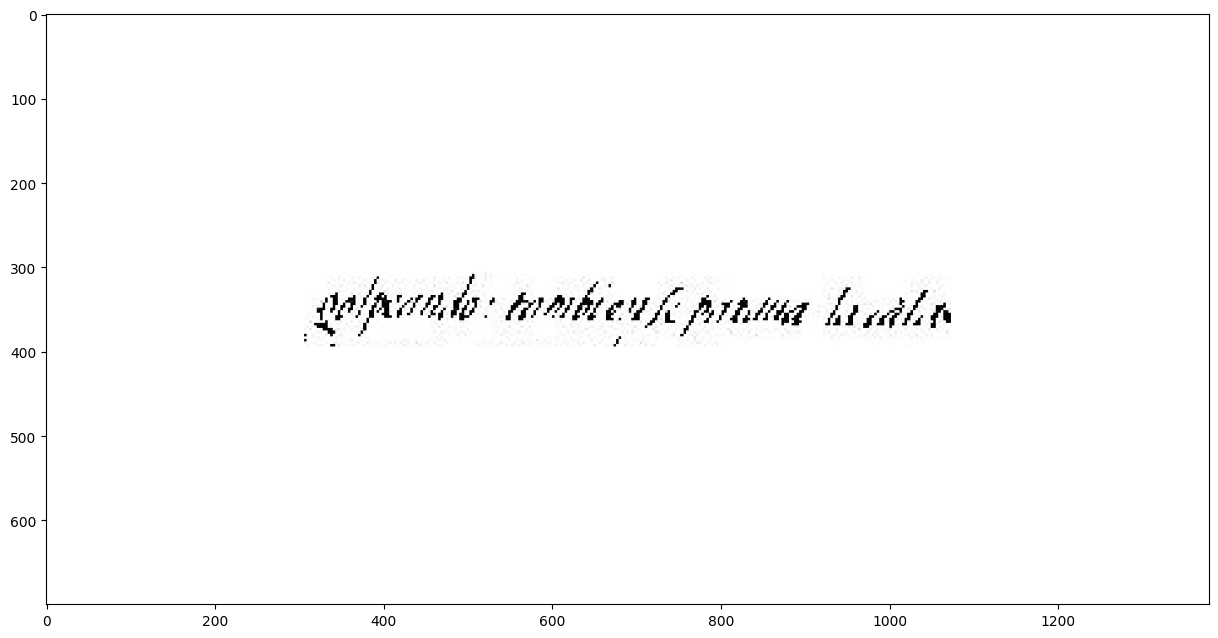

Gray Image:


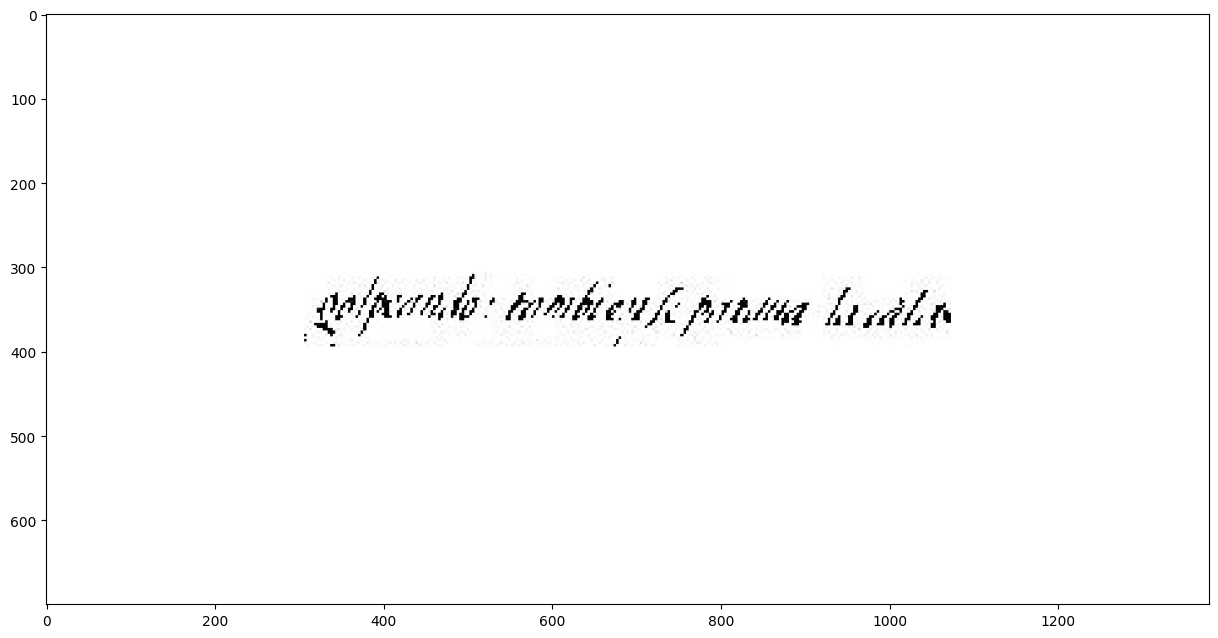

Inverse Binary:


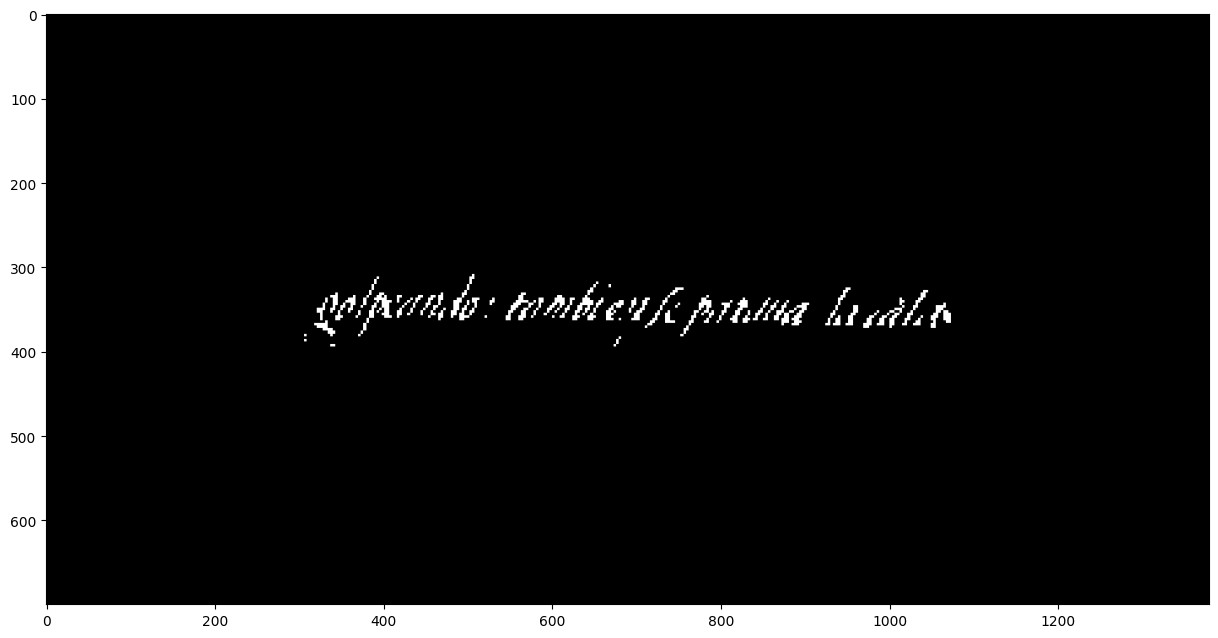

Dilated Binary:


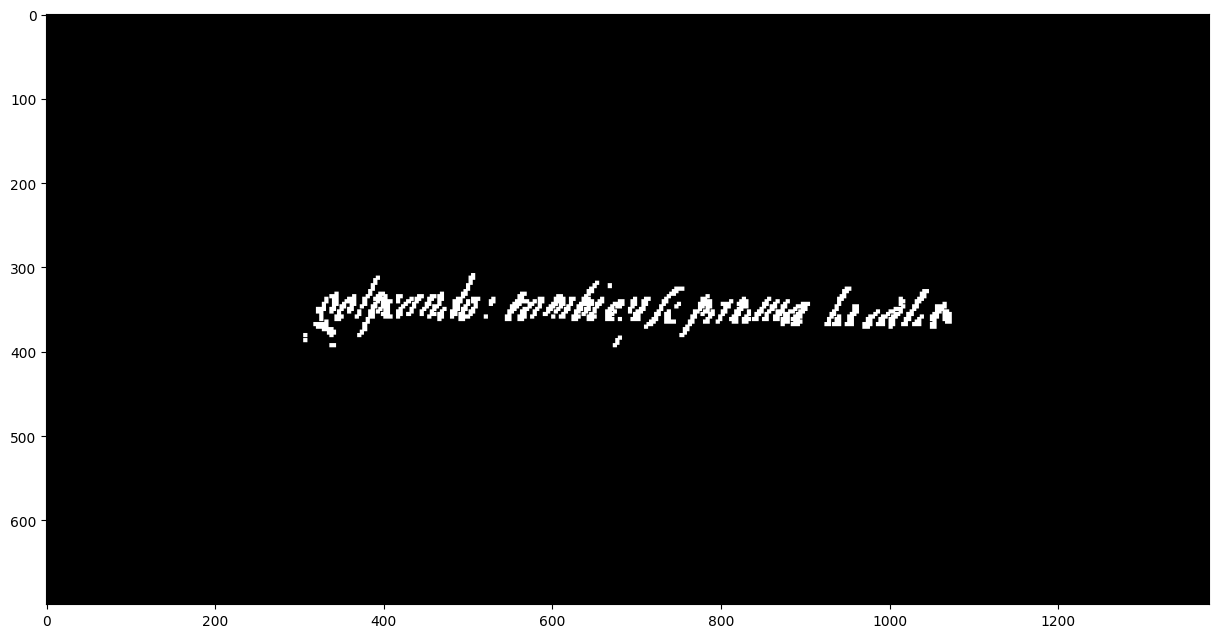

Canny edged detection:


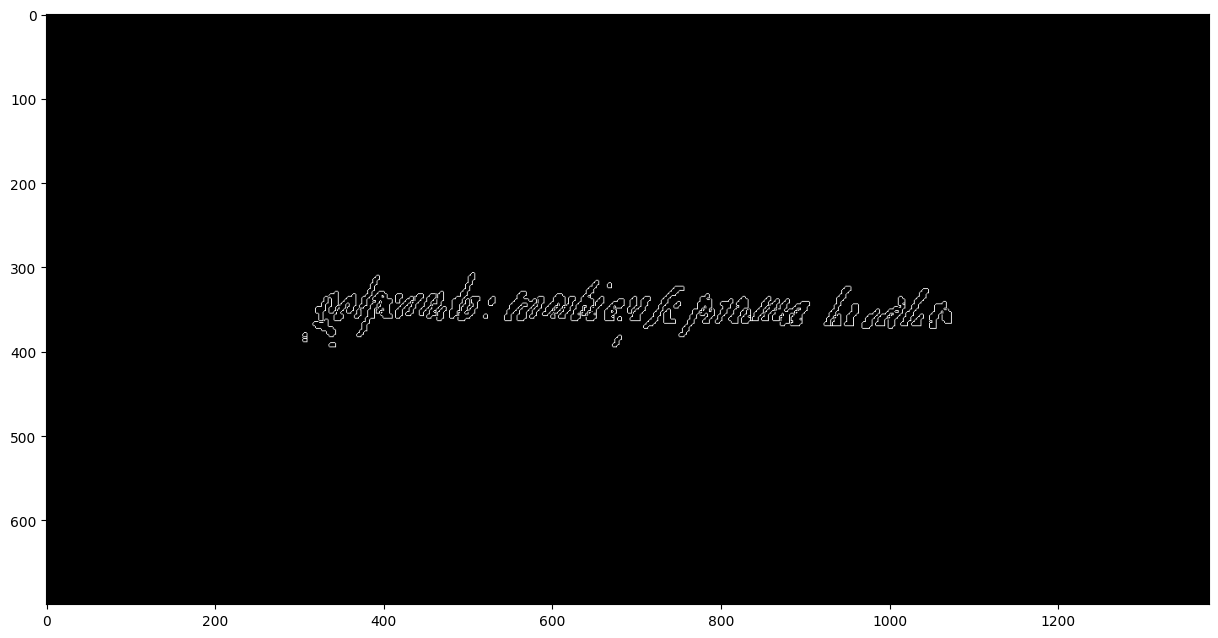

Probabilistic Hough Lines:


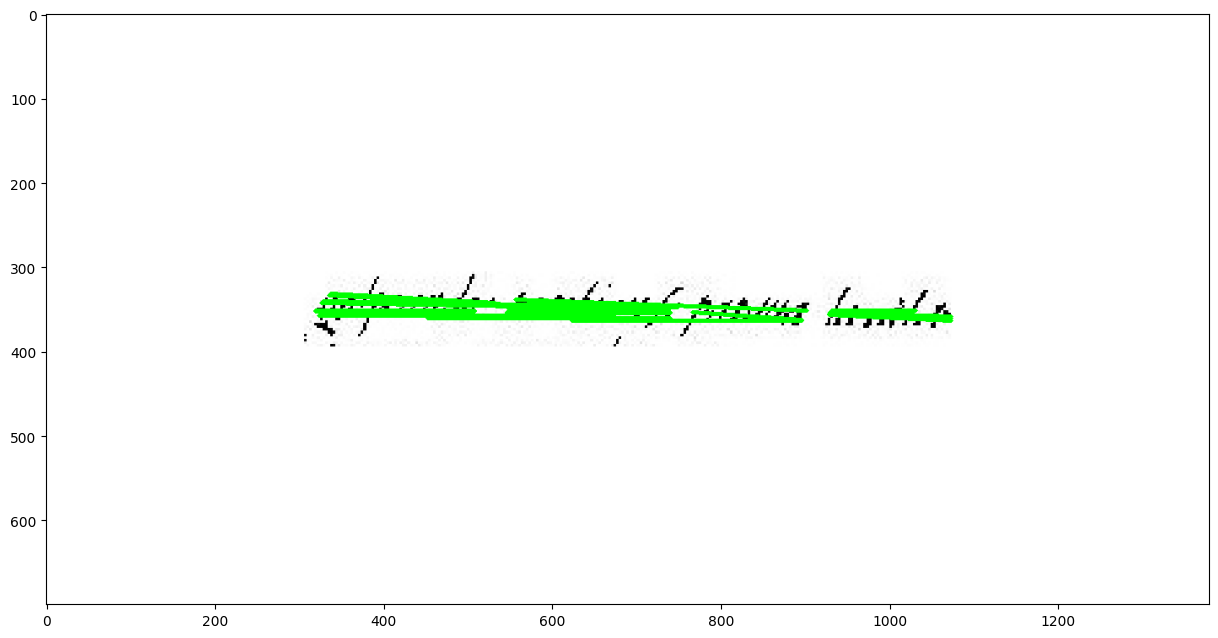

DSkew angle:  0


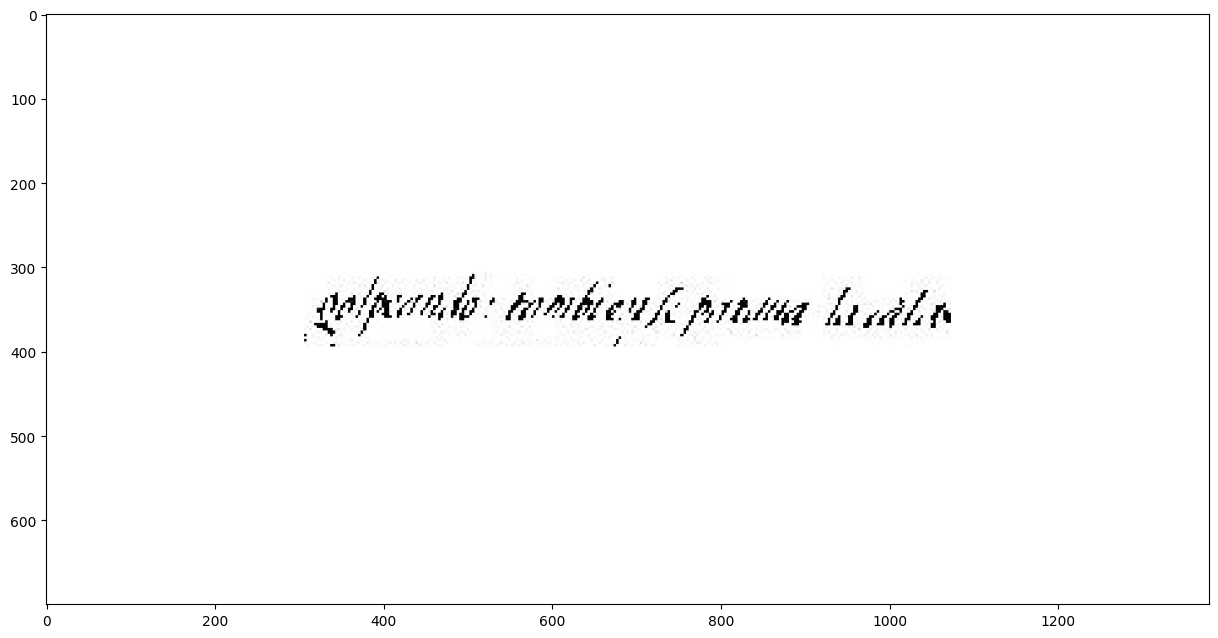

Rotated Image by DSkew: 


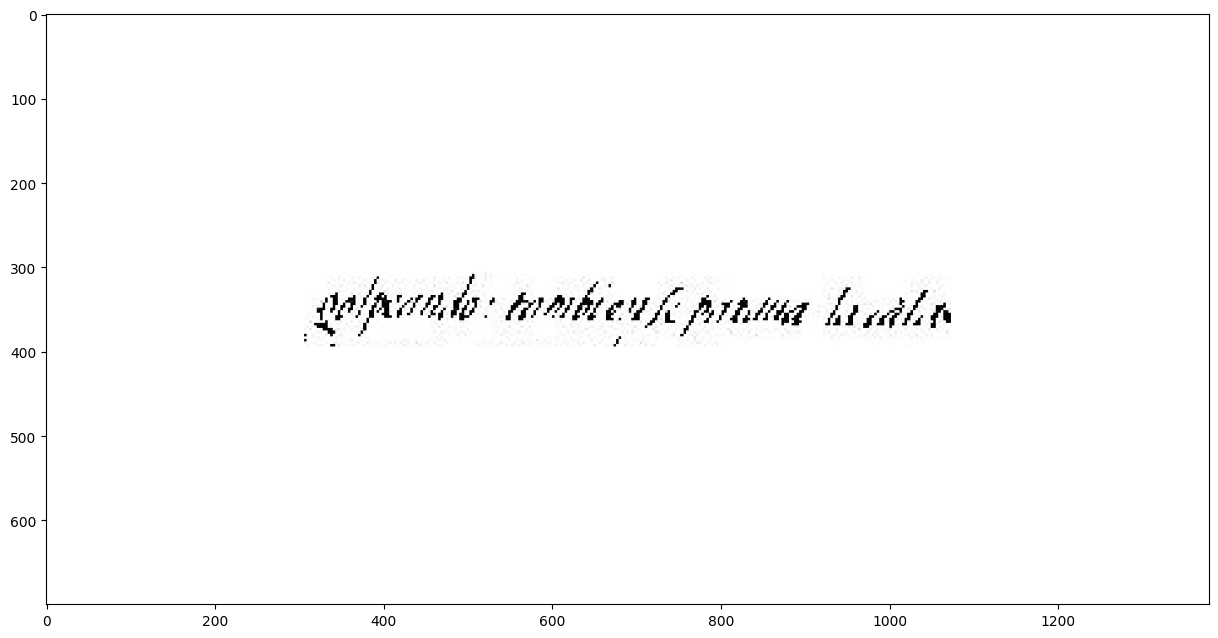



Image ::  1_1_3.jpg
Gray Image: 


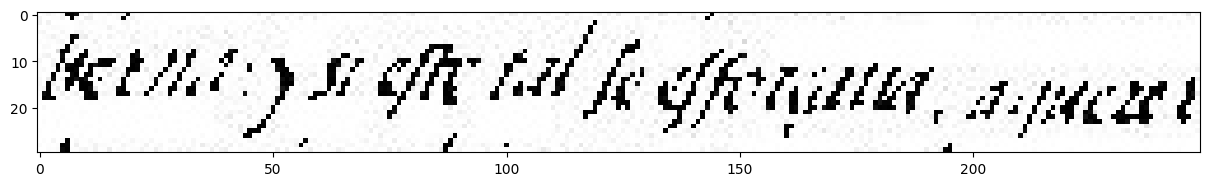

Canny Image: 


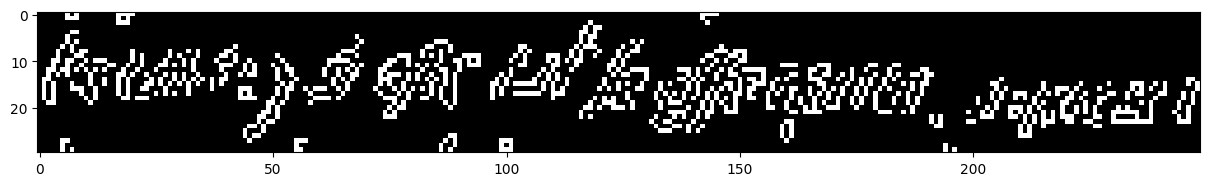

Resized Image by Padding and Scaling:


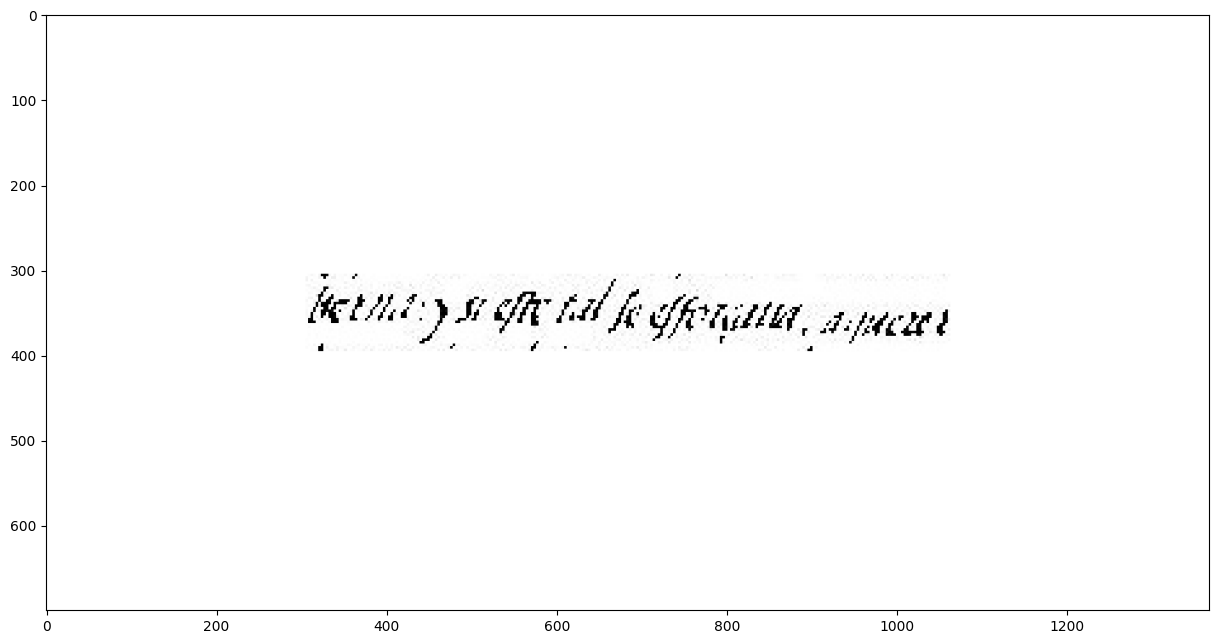

Gray Image:


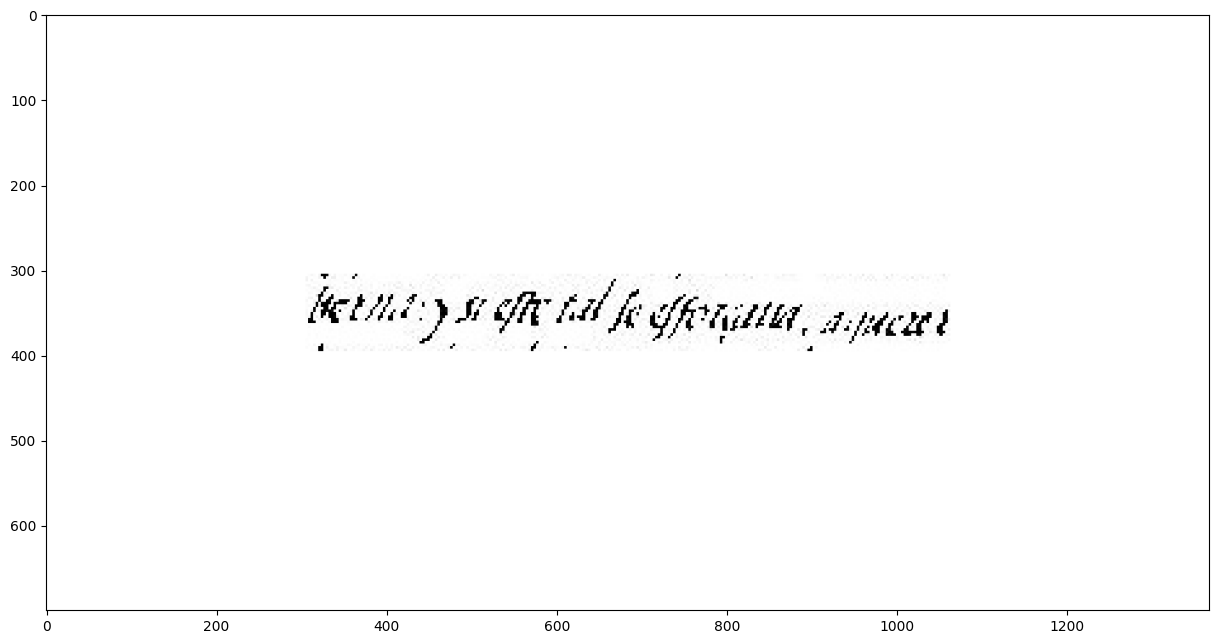

Inverse Binary:


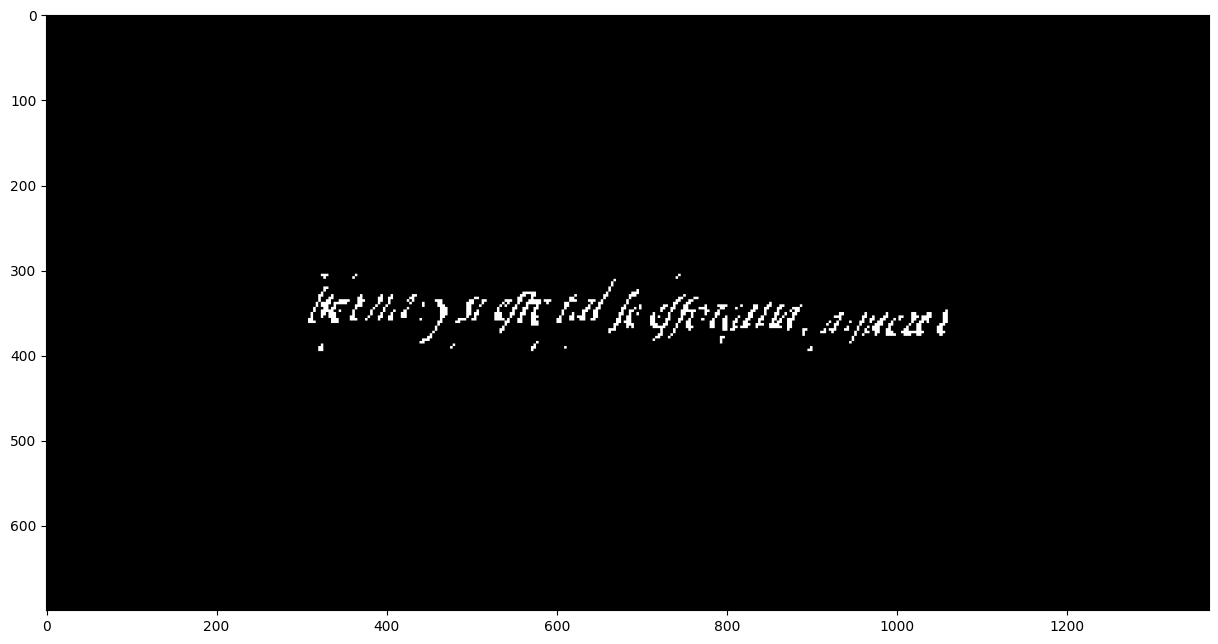

Dilated Binary:


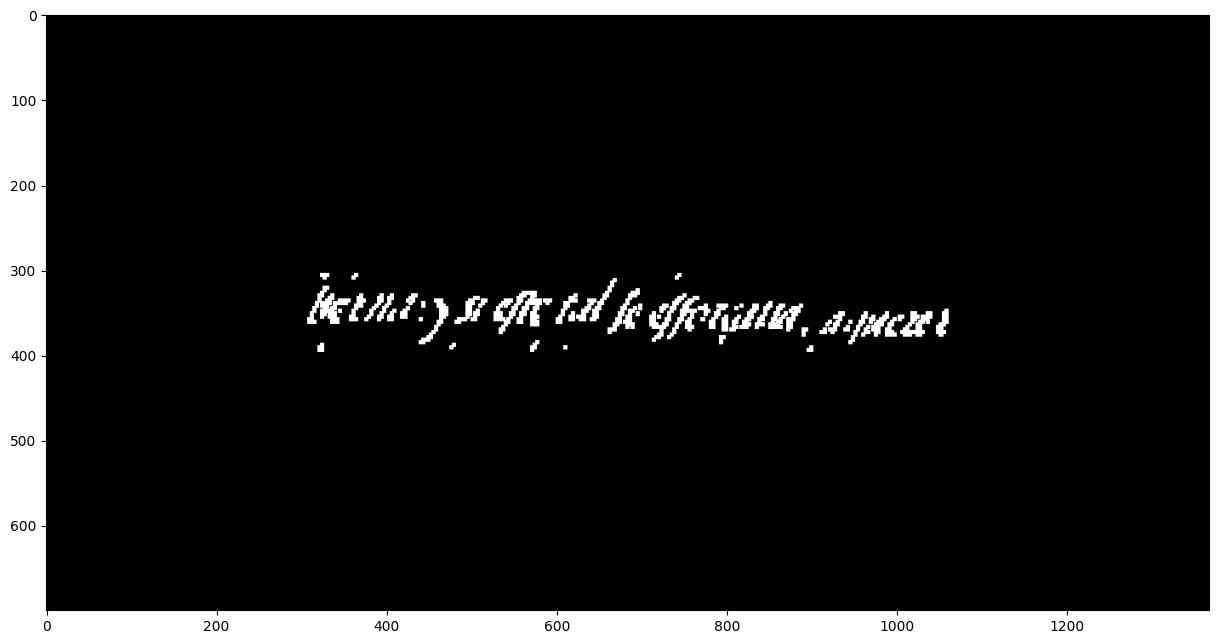

Canny edged detection:


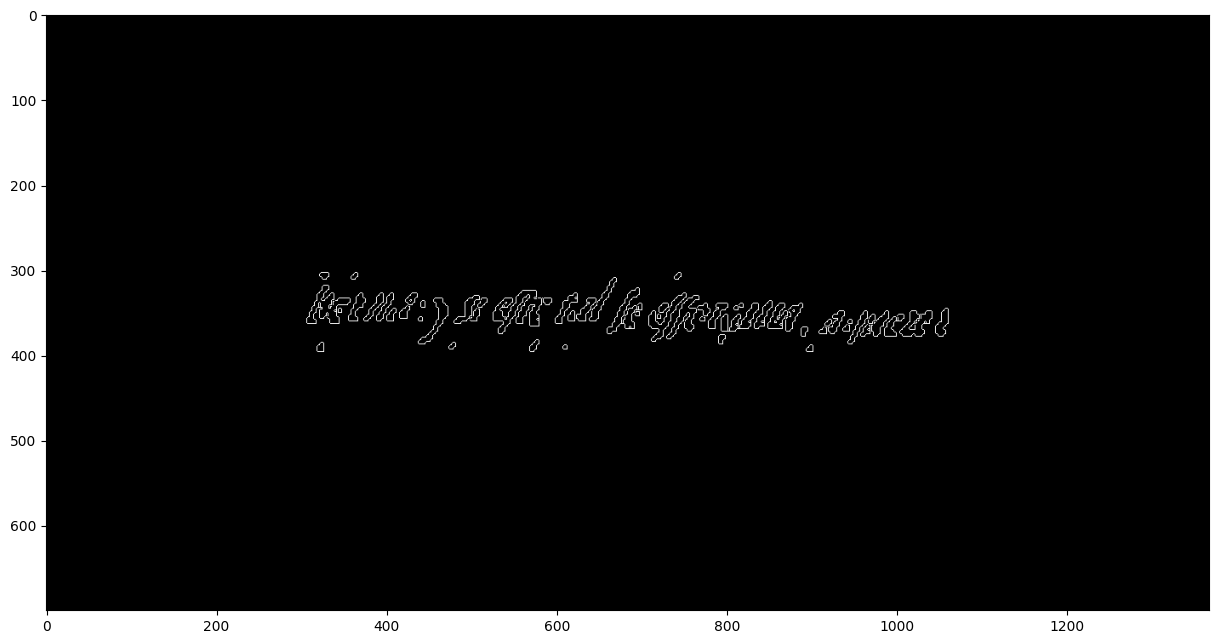

Probabilistic Hough Lines:


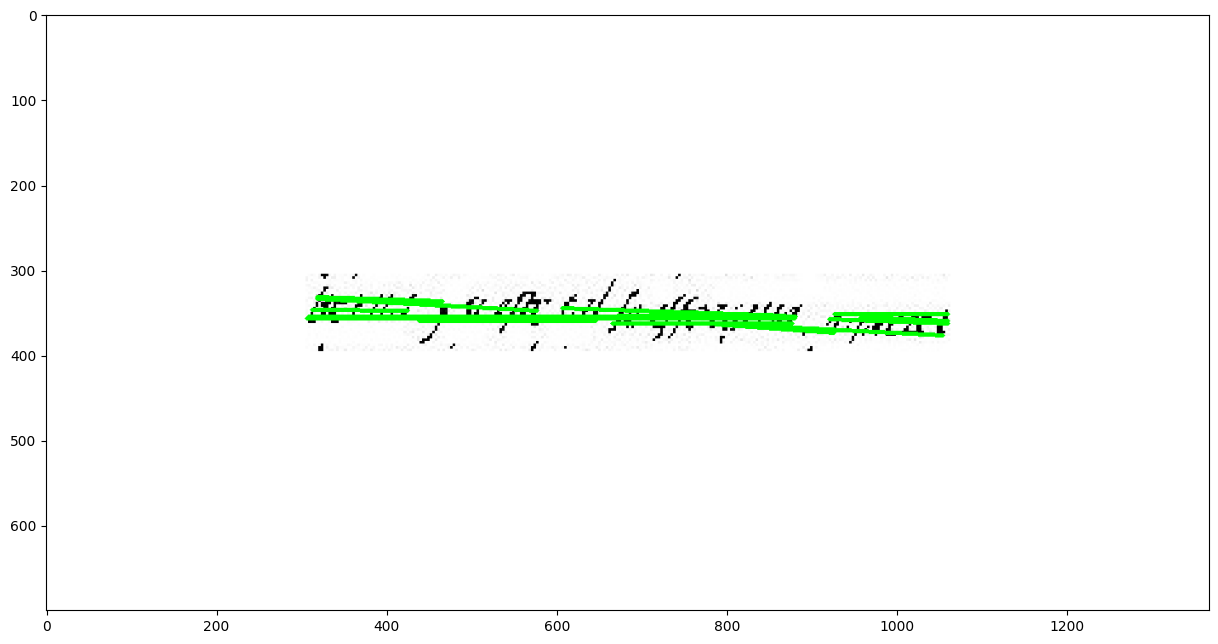

DSkew angle:  2.349049773958715


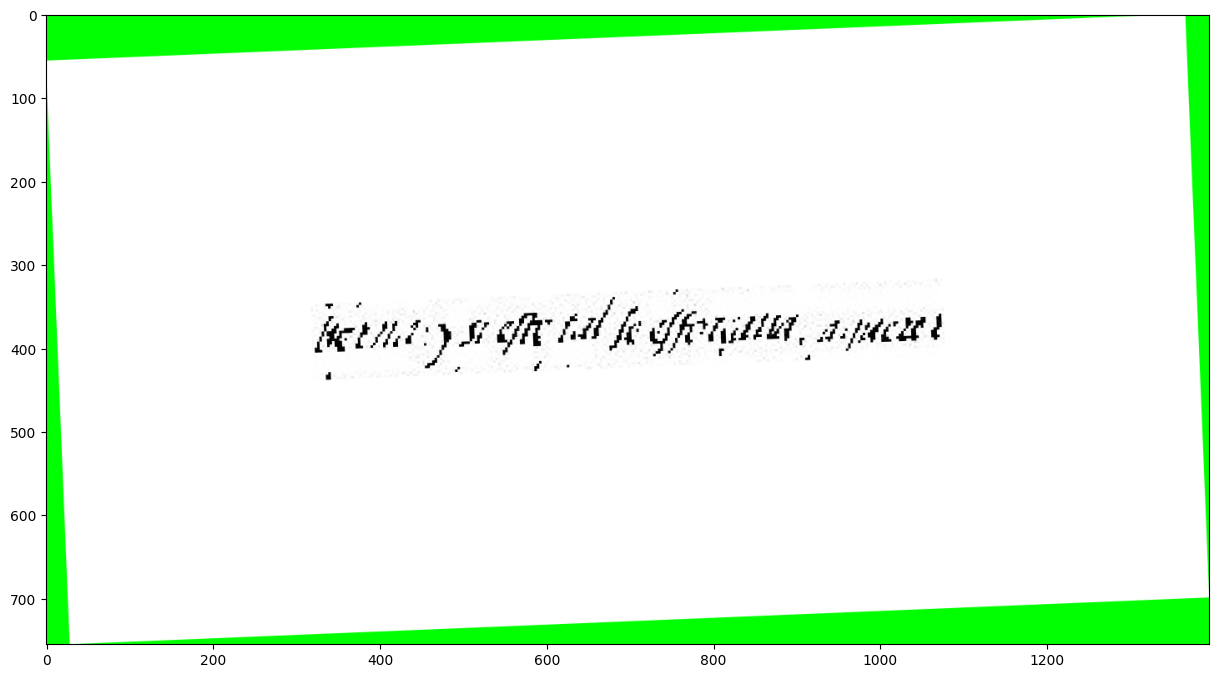

Rotated Image by DSkew: 


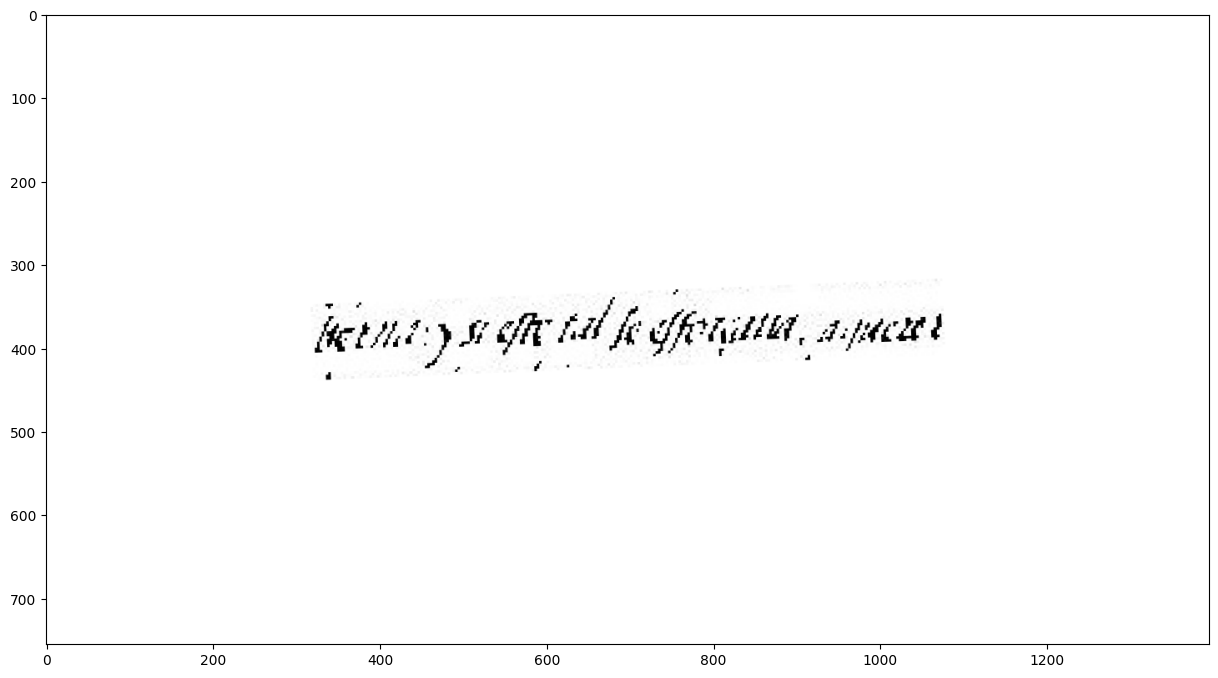



Image ::  1_1_4.jpg
Gray Image: 


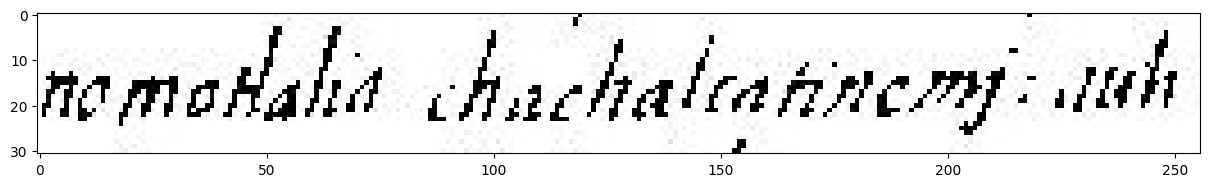

Canny Image: 


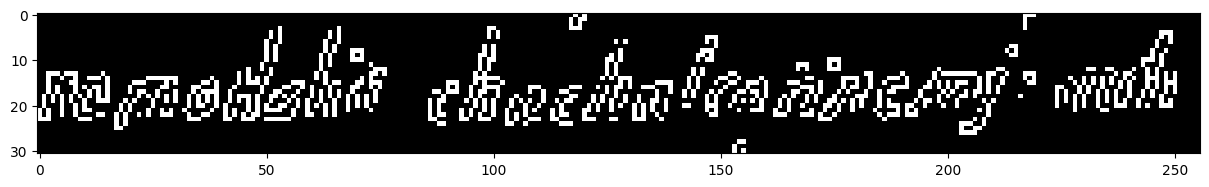

Resized Image by Padding and Scaling:


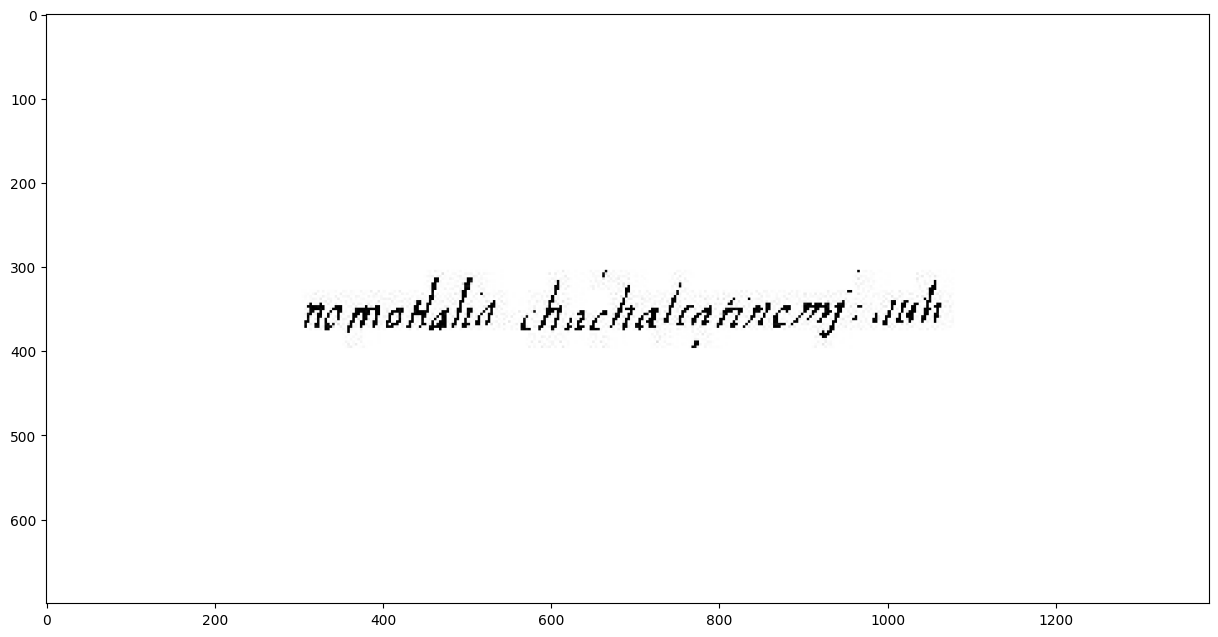

Gray Image:


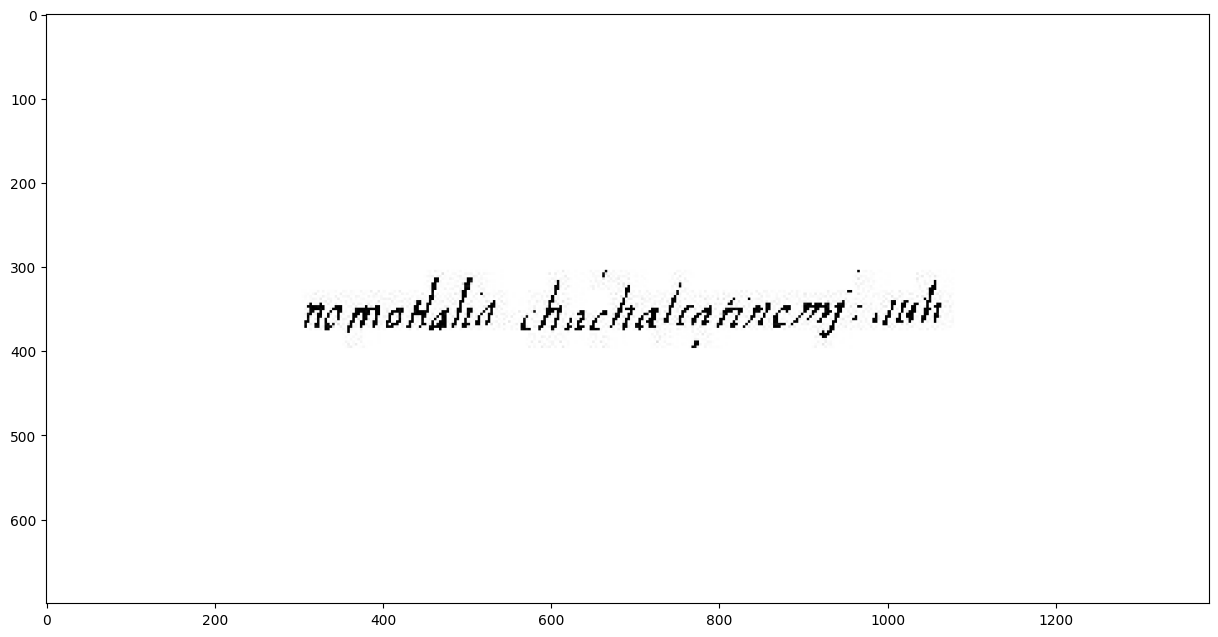

Inverse Binary:


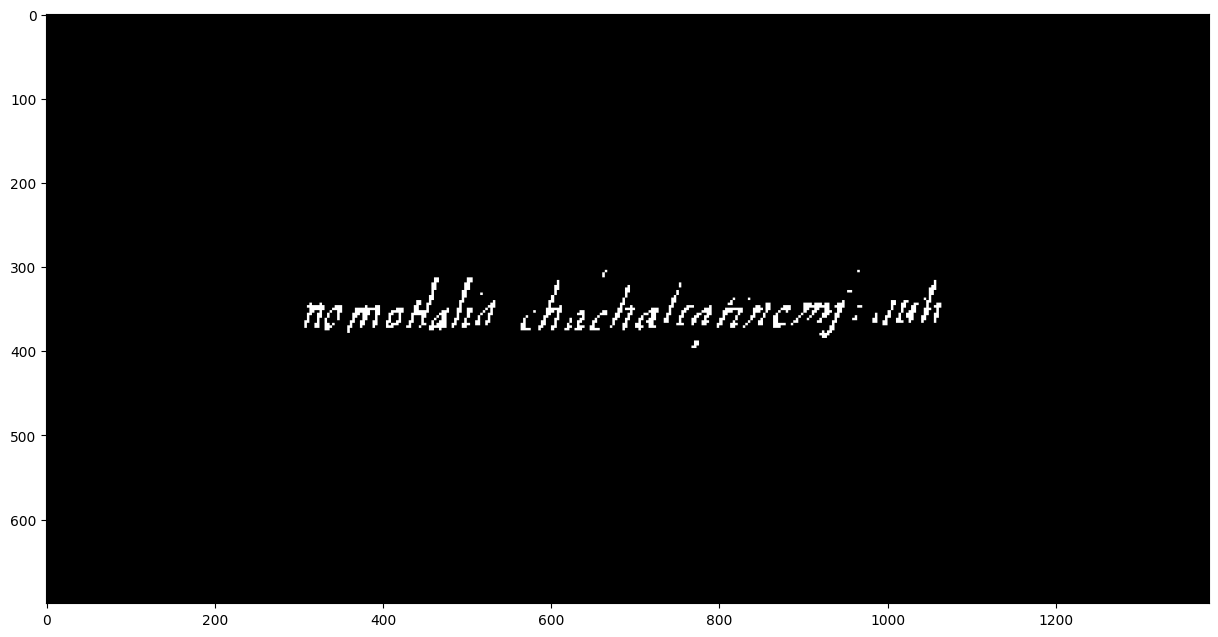

Dilated Binary:


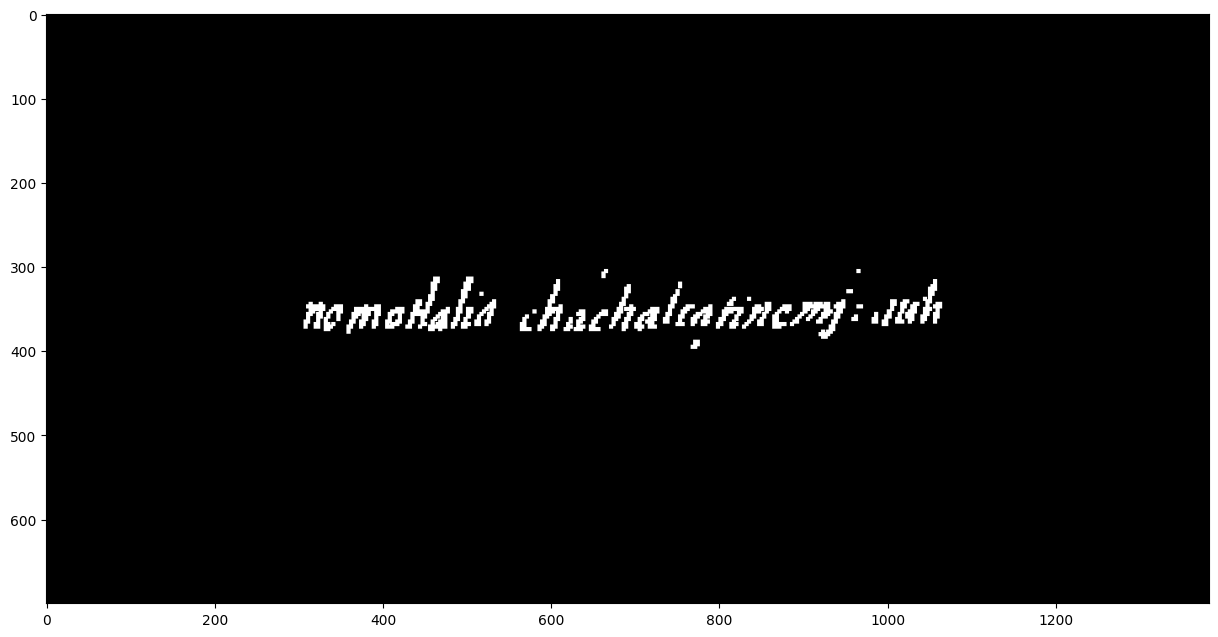

Canny edged detection:


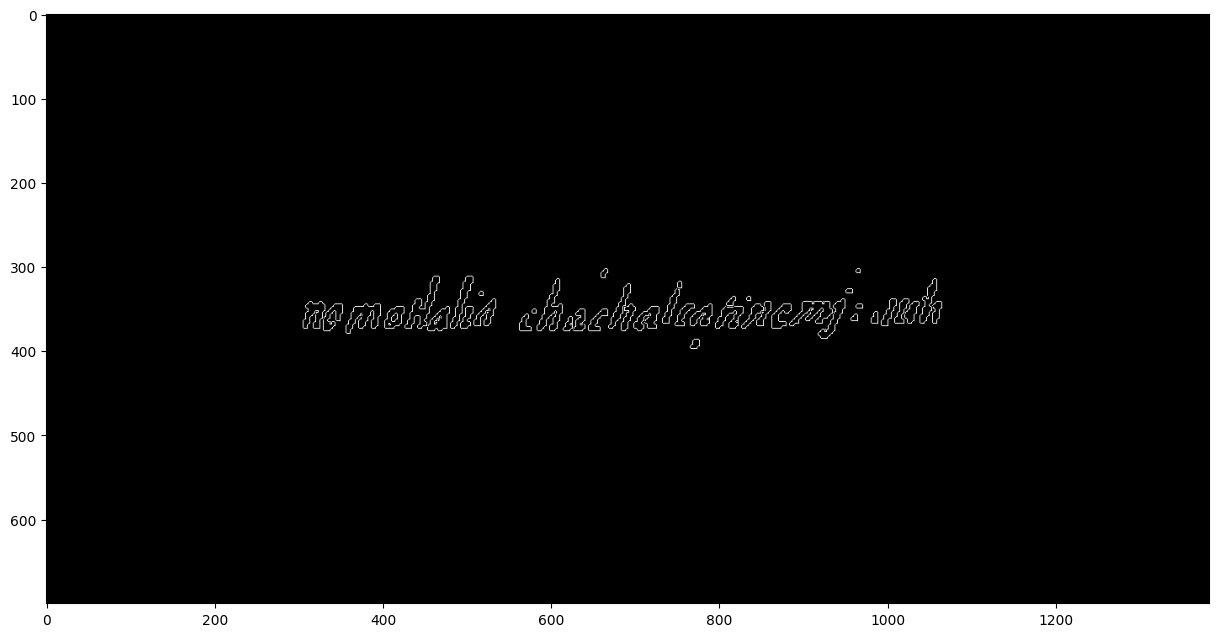

Probabilistic Hough Lines:


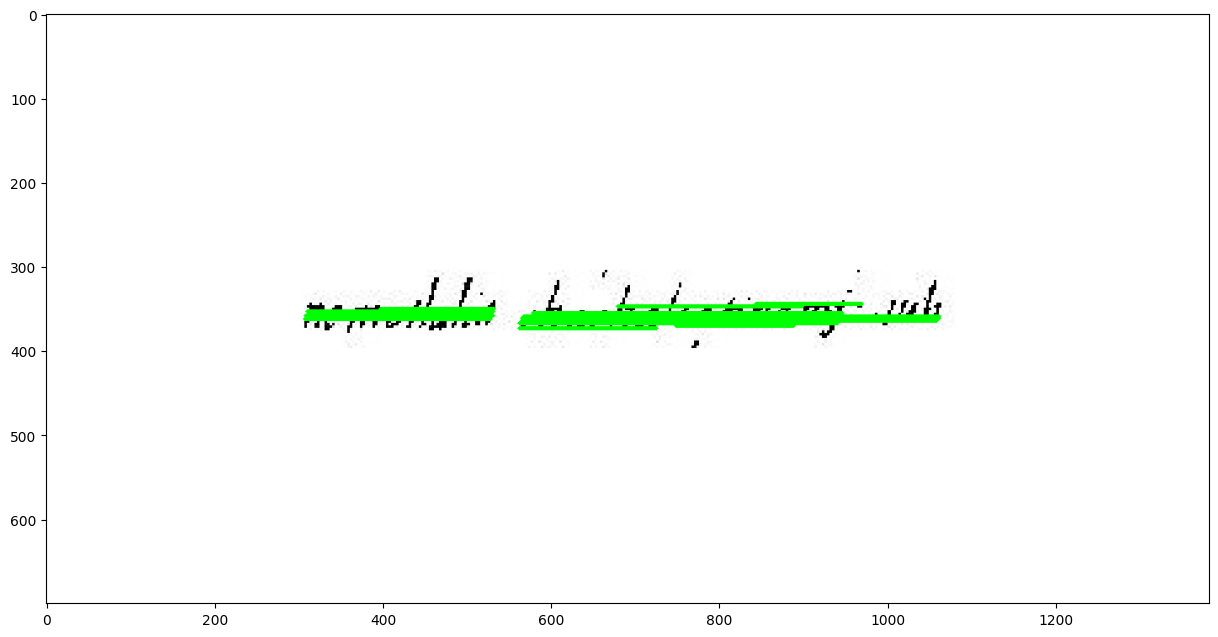

DSkew angle:  0


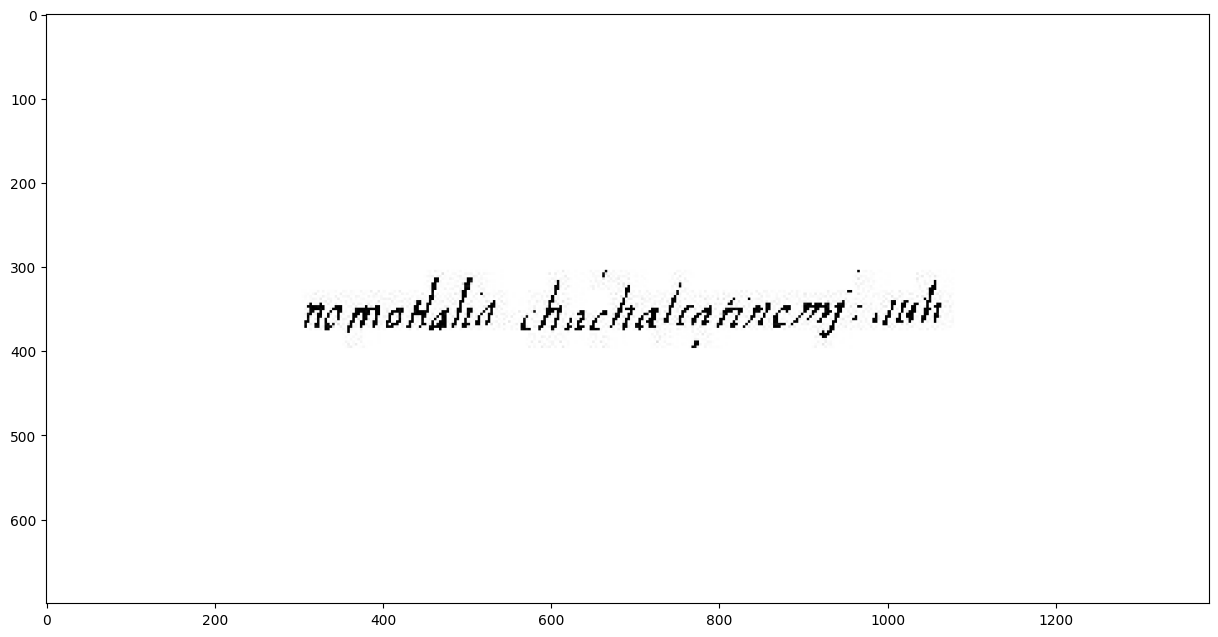

Rotated Image by DSkew: 


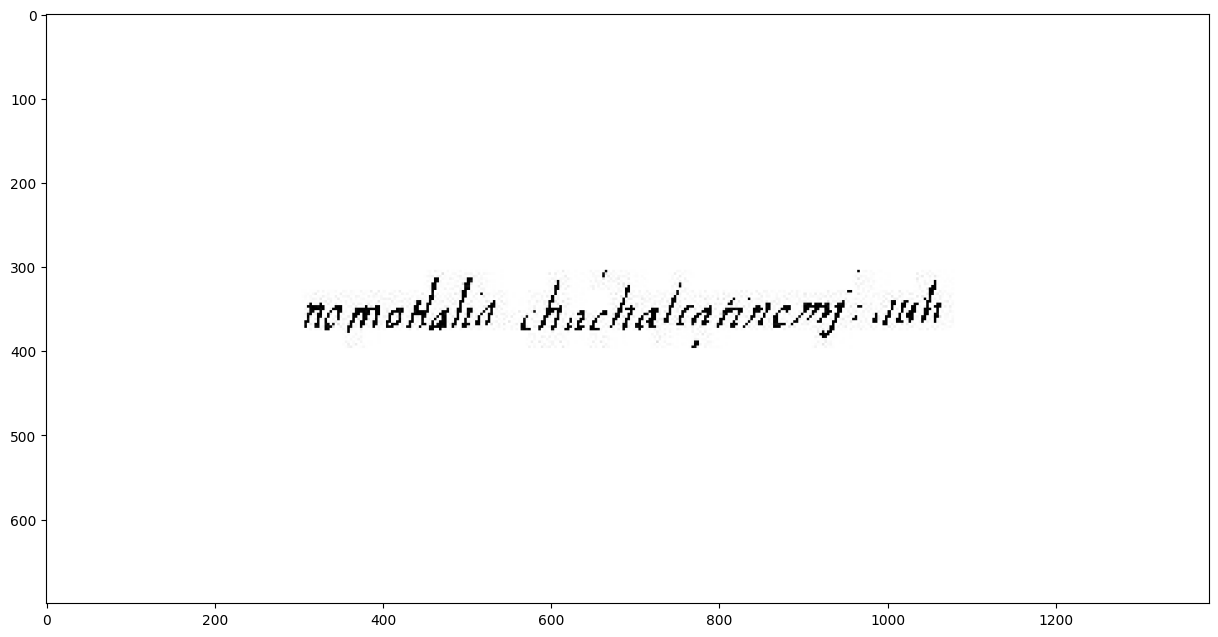



Image ::  1_1_5.jpg
Gray Image: 


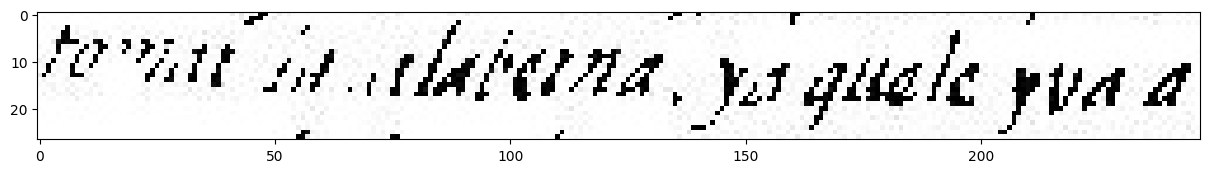

Canny Image: 


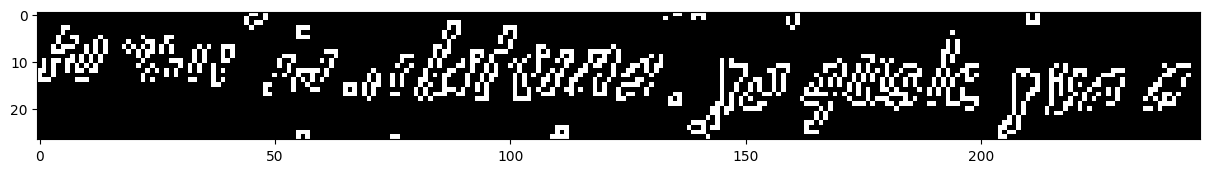

Resized Image by Padding and Scaling:


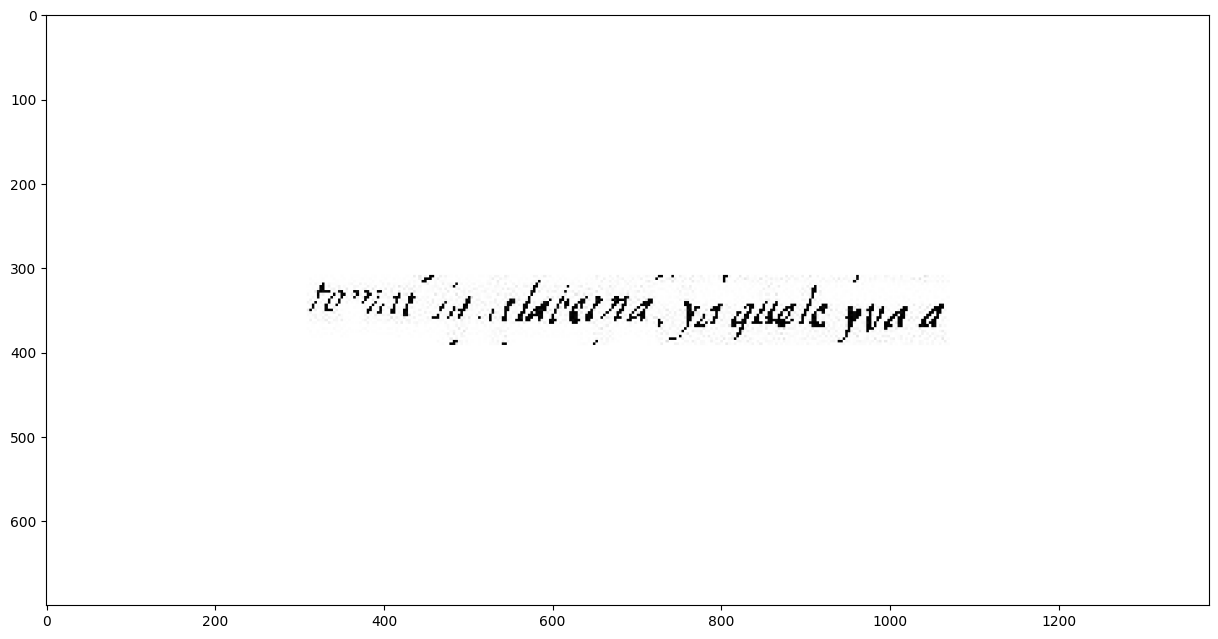

Gray Image:


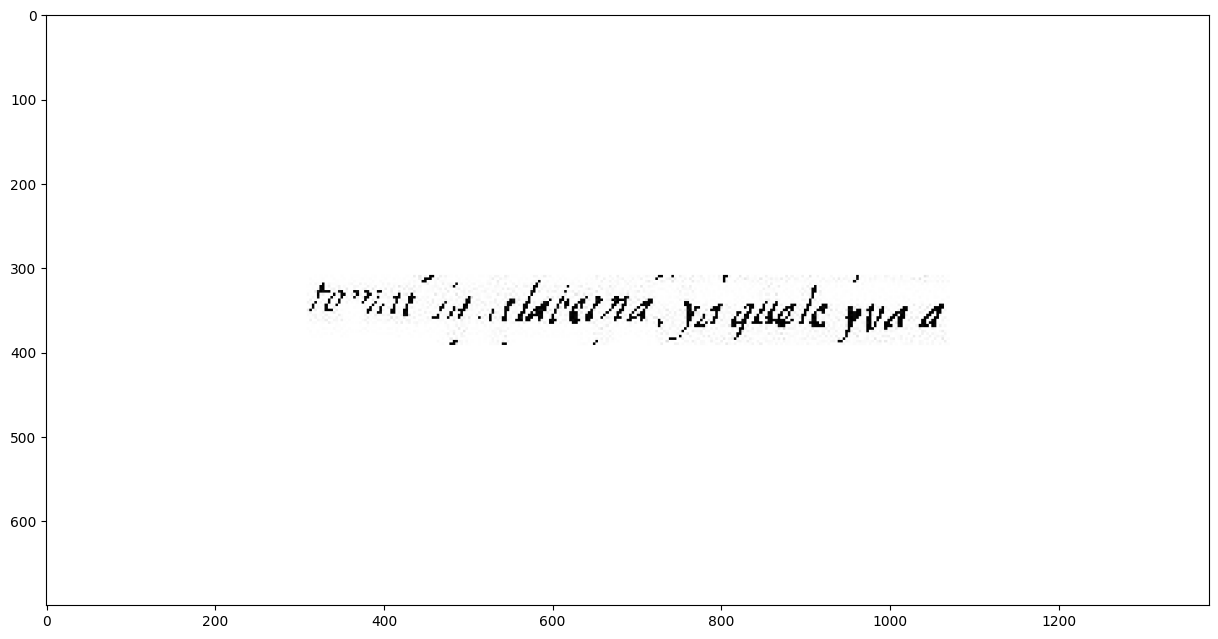

Inverse Binary:


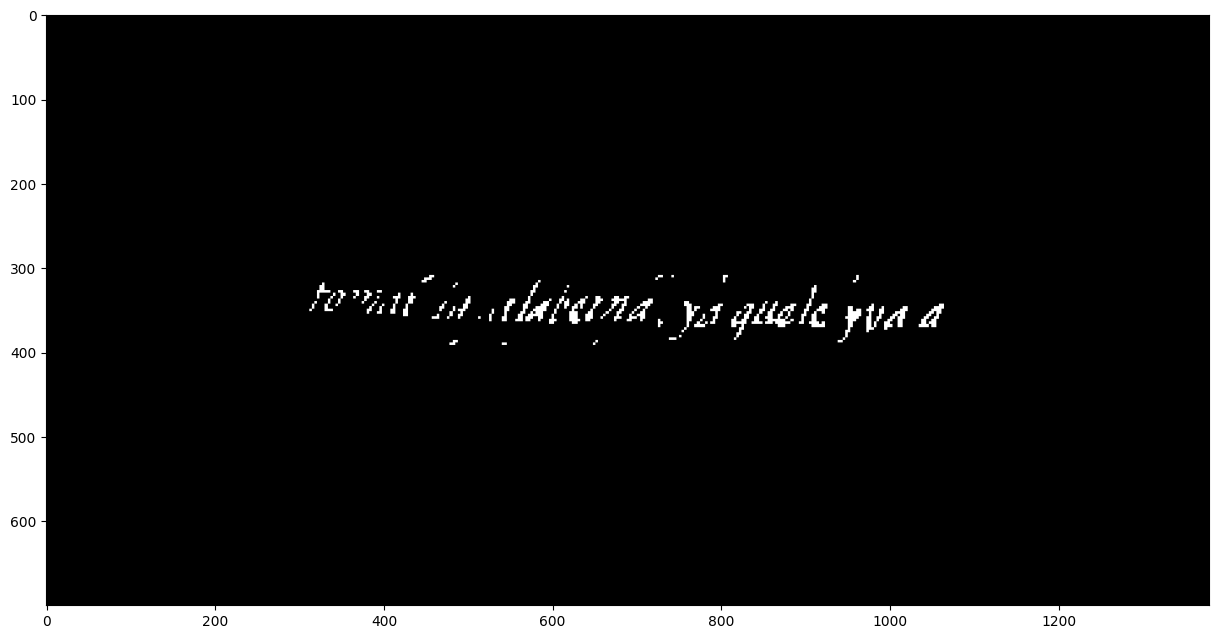

Dilated Binary:


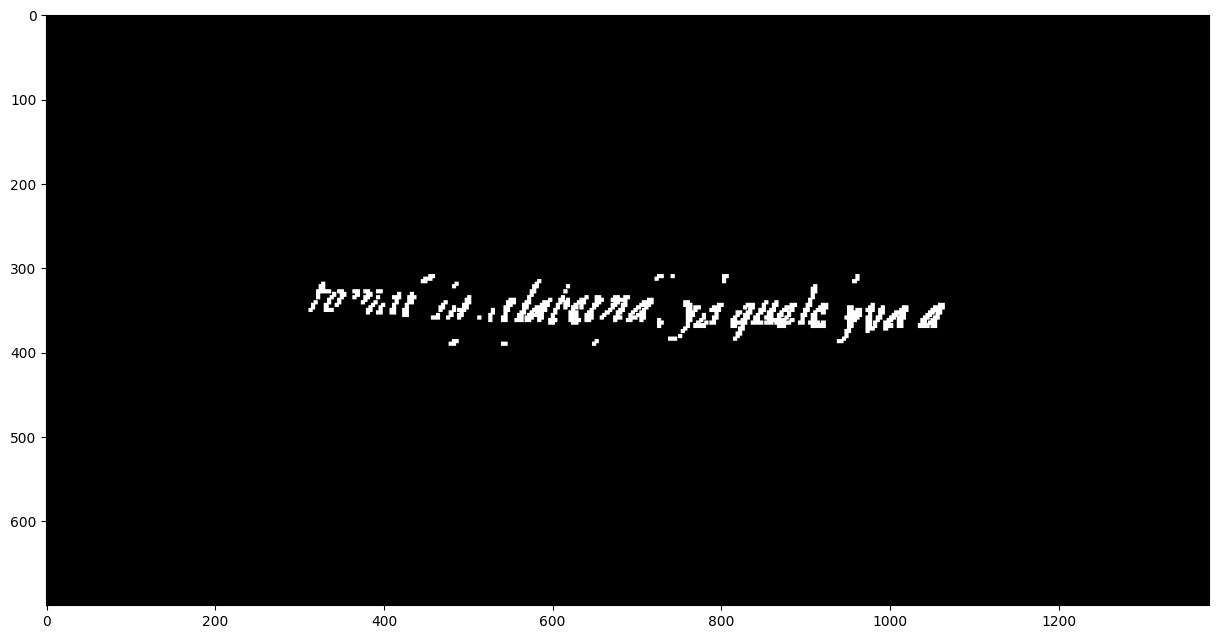

Canny edged detection:


KeyboardInterrupt: 

In [ ]:
# Roation..Roatating image after 1st line Segmentation...
rotate_line = "/content/Rotated_line_by_HaughLine_Affine/"
os.mkdir(rotate_line)

rotate_line_Dskew = "/content/DSkew/"
os.mkdir(rotate_line_Dskew)

rotate_line_Haughline = "/content/HaughLine_Affine/"
os.mkdir(rotate_line_Haughline)

rotate_lines(filename)

In [ ]:
x = final_dir+"/Rotation"
os.mkdir(x)

# Copying DSkew...
to_dir = final_dir+"/Rotation/DSkew"
shutil.copytree(rotate_line_Dskew, to_dir)

# Copying Houghline...
to_dir = final_dir+"/Rotation/Houghline"
shutil.copytree(rotate_line_Haughline, to_dir)

# Copying Dskew & Houghline Affine; thus final rotated lines...
to_dir = final_dir+"/Rotation/Final rotated lines (Houghline & DSkew)"
shutil.copytree(rotate_line, to_dir)

##Final Rotation results...

In [ ]:
print("Final Rotation results are shown below :::")
content1 = "Before Rotation (Initial Segmented Lines) ->"
content2 = "After Rotation ->"
filename_1 = final_dir + "/Rotation/Final rotated lines (Houghline & DSkew)/"
show_transitions_by_comparing_1(filename_1, filename, content1, content2)


##Detecting of rotated image with Yolo...

Detecting main handwritten line of rotated line images in 2nd line detection by YOLO.

In [ ]:
# Image Path from unziped file...
# Yolo 2nd Detection...
rotated_img_path = "/content/Rotated_line_by_HaughLine_Affine/"
img_size = 640
conf = 0.50
yolo_detection(rotated_img_path, img_size, conf)

##2nd Line detection output...

Displaying the line images with 2nd line detection by YOLO.

In [ ]:
# Showing 2nd Detection result...
second_det = "/content/yolov5/runs/detect/exp2/"
x = os.listdir(second_det)
x.remove('labels')
x = line_sort(x)
print("Showing 2nd Detection result after Rotation :::")
for i in x:
  temp = second_det + i
  temp1 = cv2.imread(temp)
  print()
  print("Image: ",i)
  plot_fig(temp1)

label_path1 = second_det + "labels"
if os.path.exists(label_path1) == True:  # Copying and removeg 2nd detection label if exists...
  to_dir = "/content/2nd line detection for rotated images (labels)/"
  shutil.copytree(label_path1, to_dir)

to_dir = final_dir+"/2nd line detection for rotated images"
shutil.copytree(second_det, to_dir)

Segmenting line image using YOLO's 2nd detection and the segmented lines are our final lines of the given document.

In [ ]:
# Croping Rotated image with 2nd detection label...
# Target Images
target_image_path1 = "/content/Rotated_line_by_HaughLine_Affine/"
target_image_path = "/content/2nd line detection for rotated images/"
if os.path.exists(target_image_path1) == True:  # Copying and removeg 2nd detection label if exists...
  to_dir = target_image_path
  shutil.copytree(target_image_path1, to_dir)

# Target Images labels
target_label_path = "/content/2nd line detection for rotated images (labels)/"

target_image = os.listdir(target_image_path)
target_label = os.listdir(target_label_path)

new_dir = "/content/final_line_segmentation/"
os.mkdir(new_dir)

for i in target_image:
  for j in target_label:
    fn_i = i.split(".")
    fn_j = j.split(".")
    if fn_i[0] ==  fn_j[0]:
      # Line Segmentation after 1st Detection...
      # Final Line Segmentation...
      img_path = target_image_path + i
      img = i
      sorted_label = j
      sorted_label_path = target_label_path + j
      line_segmantation_2(img, img_path, sorted_label, sorted_label_path, new_dir)

##Undetected image labels in 2nd detection...

Displaying undetected line images in 2nd YOLO detection.

In [ ]:
print("List of undetected images in 2nd detection ->")
find_undetected_images(target_image_path, target_label_path)
print()
print("Undetected images are shown below -> \n")
for i in list(set(undetected_images_path)):
  print("Line image path: ",i)
  undit_img = cv2.imread(i)
  plot_fig(undit_img)
  print()

##Trimming the DSkewed line images & replacing them in the final segmented image...

Displaying (before & after trimming) and trimming those DSkewed images that didn't go through the 2nd line detection; because the additional size creates the problem by detecting false bounding box in Word detection.

In [ ]:
def trim_original_image(rotate, org_w, org_h):
  org_width = org_w
  org_height = org_h

  img1 = rotate
  width = img1.shape[1]
  height = img1.shape[0]
  print("Original height -> ",org_height)
  print("Original width -> ",org_width)

  start_row = 60
  end_row = height - 60

  start_col = 60
  end_col = width - 60
  img_new = img1[start_row:end_row, start_col:end_col]

  width1 = img_new.shape[1]
  height1 = img_new.shape[0]
  print("New height -> ",height1)
  print("New width -> ",width1)

  return img_new


final_line_segment = "/content/final_line_segmentation/"
rotate_line_Dskew = "/content/DSkew/"
dskew_img_list = os.listdir(rotate_line_Dskew)
print(dskew_img_list)
for i in dskew_img_list:
  print("Target image -> ",i)
  temp = final_line_segment + i
  print("Path -> ",temp)
  img1 = cv2.imread(temp)
  height, width, channels = img1.shape
  temp2 = rotate_line_Dskew + i
  img2 = cv2.imread(temp2)
  height2, width2, channels = img2.shape
  if height >= height2:
    # os.remove(temp)
    temp3 = trim_original_image(img1, width, height)
    cv2.imwrite(temp, temp3)
    print("Original ->")
    plot_fig(img1)
    print("New ->")
    plot_fig(temp3)
    print()
  else:
    print("Original ->")
    plot_fig(img1)
    print("No need for change as its gone through the 2nd line detection!\n")


##Final Line segmentation after 2nd detection...

Displaying the final segmented line images of the document with their ground truth images.

In [ ]:
# Final Line Segmentation after 2nd Detection...
filename_1 = "/content/final_line_segmentation"

print("Final Line Segmentation of Yolo detection :::")
print()

content1 = "Annotated Line or GroundTruth ->"
content2 = "Predicted Line ->"
# show_transitions_by_comparing(filename_1, gt_line_img_dir, content1, content2)
show_transitions_by_comparing(filename_1, content2)


In [ ]:
# Copying Final line segmentation...
to_dir = final_dir+"/Final line segmentation"
shutil.copytree(new_dir, to_dir)


##**Detecting Word from final segmented lines**

Detecting words of the final segmented lines using our trained YOLO model.

In [ ]:
!python /content/yolov5/detect.py --weights /content/model/word_model_best.pt --img 640 --conf 0.40 --source /content/final_line_segmentation --save-conf --save-txt

##Final Word detection results...

Displaying YOLO's prediction for Word.

In [ ]:
# Showing Word Detection result...
word_det = "/content/yolov5/runs/detect/exp3/"
x = os.listdir(word_det)
x.remove('labels')
x = line_sort(x)
print("Showing Word Detection result after 2nd Segmentation :::")
for i in x:
  temp = word_det + i
  temp1 = cv2.imread(temp)
  print()
  print("Image: ",i)
  # flag = 0
  # img_path = gt_line_img_dir + i
  # label_path = gt_word_dir + i.split('.')[0] + ".txt"
  # img_g = draw_BB(img_path, label_path, flag)
  # print("Annotated Words ->")
  # plot_fig(img_g)
  print("Predicted Words by YOLO ->")
  plot_fig(temp1)

# Copying Word Detection result...
to_dir = final_dir+"/Word detection for final segmented lines"
shutil.copytree(word_det, to_dir)

Sorting Labels of Word detection on the basis of x axis.





In [ ]:
# Sorting Labels of Word detection on the basis of x...
txt_loc = "/content/yolov5/runs/detect/exp3/labels/"
new_sort_label = '/content/sorted_Word_detection/'
flag = 1
sort_detection_label(txt_loc, new_sort_label, flag)

Segmenting the words by using YOLO's word predictions.

In [ ]:
# Word Segmentation...
word_labels = "/content/sorted_Word_detection/"
line_images = "/content/final_line_segmentation/"
final_word_dir = "/content/final_word_segmentation/"
os.mkdir(final_word_dir)
word_segmentation(line_images, word_labels)

Displaying final word detection results with their ground truth.

In [ ]:
# Showing Word Detection result...
word_det = "/content/yolov5/runs/detect/exp3/"
x = os.listdir(word_det)
x.remove('labels')
x = line_sort(x)
print("Showing Word Detection result after 2nd Segmentation :::")
for i in x:
  print()
  print("Image: ",i)
  # flag = 0
  # img_path = gt_line_img_dir + i
  # label_path = gt_word_dir + i.split('.')[0] + ".txt"
  # img_g = draw_BB(img_path, label_path, flag)
  # print("Annotated Words ->")
  # plot_fig(img_g)

  # flag = 1
  # img_path1 = "/content/final_line_segmentation/" + i
  # label_path1 = "/content/sorted_Word_detection/" + i.split('.')[0] + ".txt"
  # img_p = draw_BB(img_path1, label_path1, flag)
  # print("Final predicted Words by YOLO ->")
  # plot_fig(img_p)

  flag = 1
  img_path1 = "/content/final_line_segmentation/" + i
  label_path1 = "/content/sorted_Word_detection/" + i.split('.')[0] + ".txt"
  if os.path.exists(img_path1) == True and os.path.exists(label_path1) == True:
    img_p = draw_BB(img_path1, label_path1, flag)
    print("Final predicted Words by YOLO ->")
    plot_fig(img_p)
  else:
    continue


In [ ]:
# Copying Final word segmentation...
to_dir = final_dir+"/Final word segmentation"
shutil.copytree(final_word_dir, to_dir)

# Copying sorted label of final word detection...
to_dir = final_dir+"/Final word segmentation/Sorted label (based on x axis)"
shutil.copytree(word_labels, to_dir)



##Final Word segmentation results...

Displaying the final word segmentation results.

In [ ]:
print("Word segmentation completed!")
word_list = os.listdir(final_word_dir)
word_lists = line_sort(word_list)
for i in word_lists:
  print()
  print("Folder name: ",i)
  temp =  final_word_dir+i
  temp_list = os.listdir(temp)
  temp_lists = line_sort(temp_list)
  # print(temp_lists)
  for j in temp_lists:
    print(j)
    temp1 = temp+'/'+j
    crop_word = cv2.imread(temp1)
    plot_fig(crop_word, 5)


#**Saving and Download Results**

Zipping results...

In [ ]:
from google.colab import files
!zip -r /content/final_results.zip /content/1_1/

To download the generated results for the uploaded image, please remove comments from the below cell and run the cell. The resulted zip file will automatically download and this may take less than a minute.

In [ ]:
# files.download("/content/final_results.zip")